# 1.Importing Libraries

In [1]:
# Import library
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

# Preprocessing Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modeling
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset using pandas
df = pd.read_csv("Customer_Data.csv")

#first five rows of dataset
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
#last five rows of dataset
df.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [4]:
#volume of dataset
df.shape

(8950, 18)

In [5]:
#information of dataset with its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# 2.Dealing with Null values

In [7]:
df.isnull()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       False    False              False      False             False   
1       False    False              False      False             False   
2       False    False              False      False             False   
3       False    False              False      False             False   
4       False    False              False      False             False   
...       ...      ...                ...        ...               ...   
8945    False    False              False      False             False   
8946    False    False              False      False             False   
8947    False    False              False      False             False   
8948    False    False              False      False             False   
8949    False    False              False      False             False   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      False         False                False   
1                      False         False                False   
2                      False         False                False   
3                      False         False                False   
4                      False         False                False   
...                      ...           ...                  ...   
8945                   False         False                False   
8946                   False         False                False   
8947                   False         False                False   
8948                   False         False                False   
8949                   False         False                False   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                          False                             False   
1                          False                             False   
2                          False                             False   
3                          False                             False   
4                          False                             False   
...                          ...                               ...   
8945                       False                             False   
8946                       False                             False   
8947                       False                             False   
8948                       False                             False   
8949                       False                             False   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                      False             False          False         False   
1                      False             False          False         False   
2                      False             False          False         False   
3                      False             False          False         False   
4                      False             False          False         False   
...                      ...               ...            ...           ...   
8945                   False             False          False         False   
8946                   False             False          False         False   
8947                   False             False          False         False   
8948                   False             False          False         False   
8949                   False             False          False         False   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        False             False             False   False  
1        False             False             False   False  
2        False             False             False   False  
3        False              True             False   False  
4        False             False             False   False  
...        ...               ...               ...     ...  
8945     False             False             False   False  
8946     False              True  

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

From data we can see that minimum_payments has 313 null values, we need to remove the null values.

In [9]:
#removing the null values from dataset
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].replace({'NAN':np.nan}).astype(float)
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(value=df["MINIMUM_PAYMENTS"].mean())

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

From above data we can see that there are no null values

# 3.Exploratory Data Analysis (EDA)

## Univariante Analysis

In [11]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].value_counts())
    print('\n')

CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64


BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: BALANCE, Length: 8871, dtype: int64


BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
1.000000    6211
0.90909

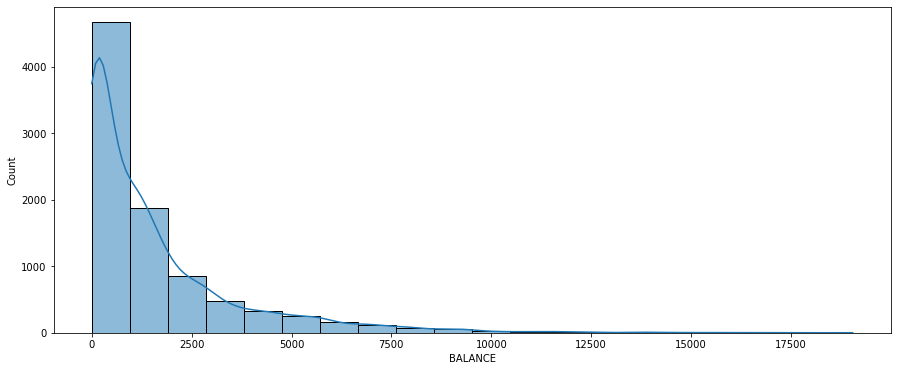

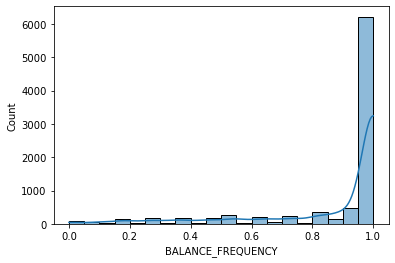

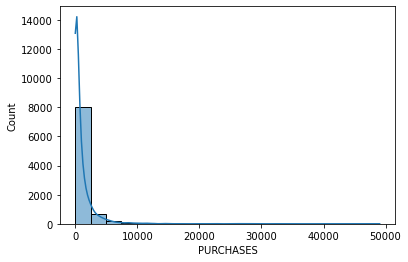

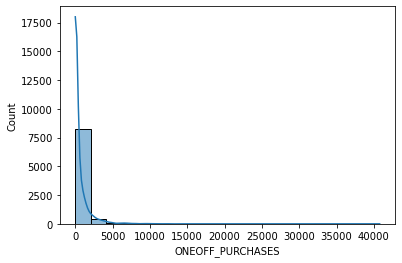

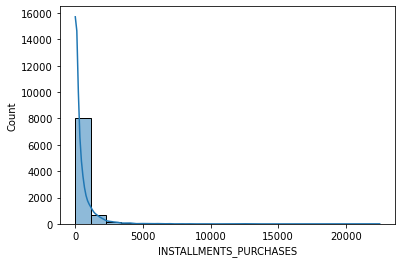

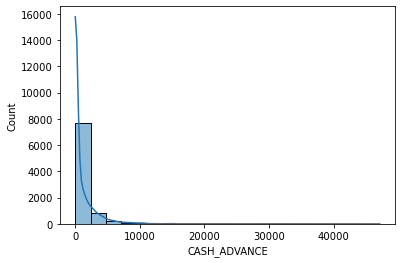

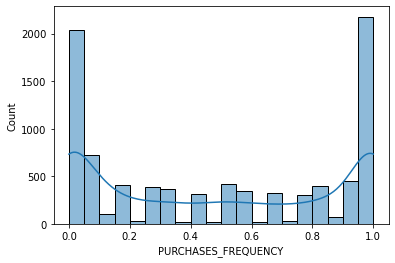

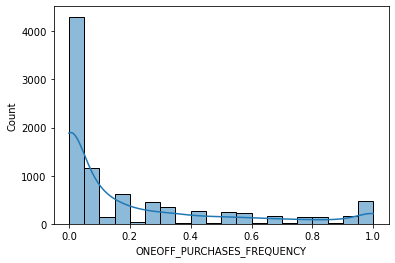

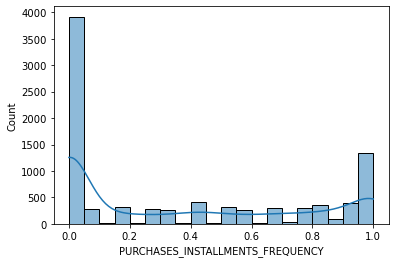

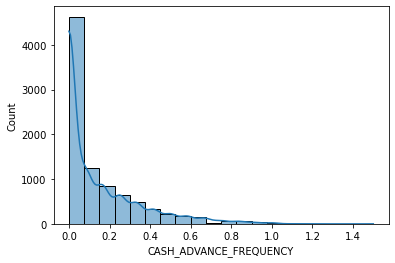

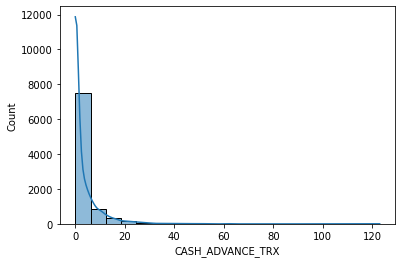

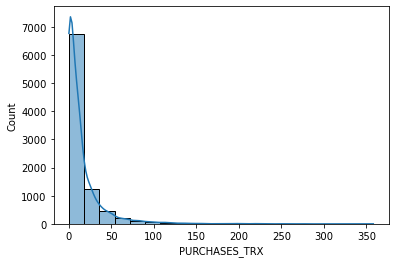

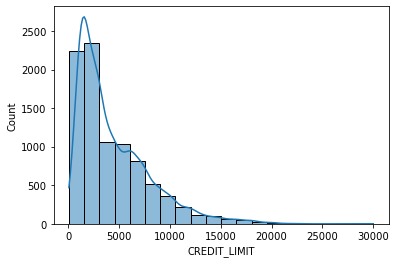

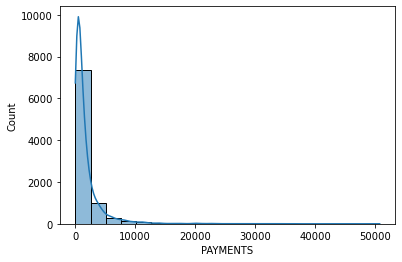

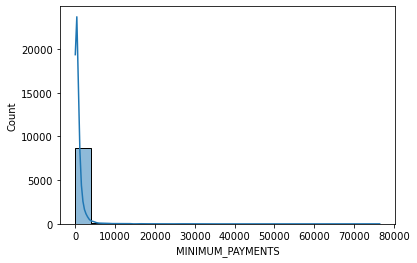

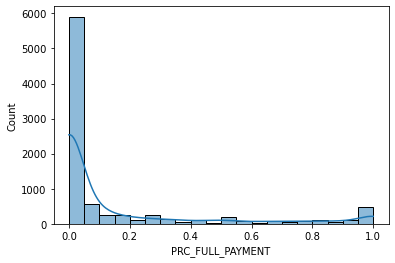

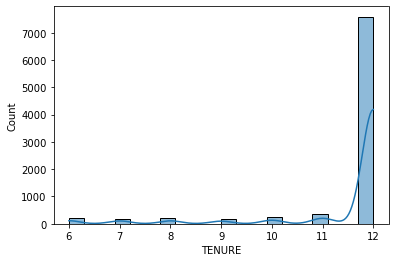

In [12]:
plt.figure(figsize=(15,6))
for i in df.columns[1:]:
    sns.histplot(df[i], bins=20,kde=True, palette='hls')
    plt.show()

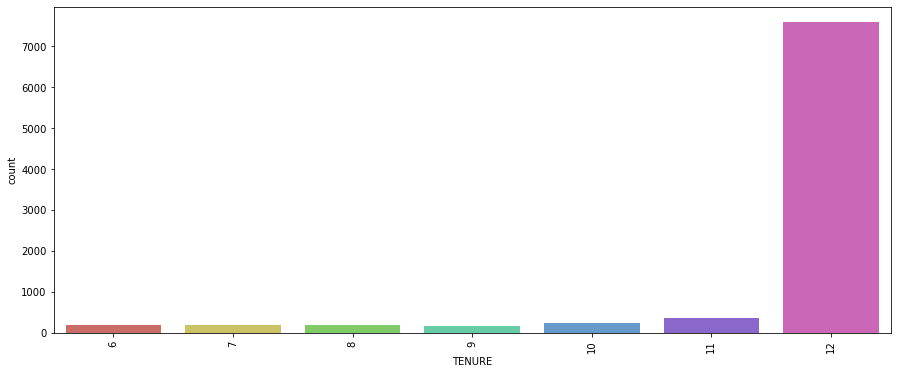

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='TENURE', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

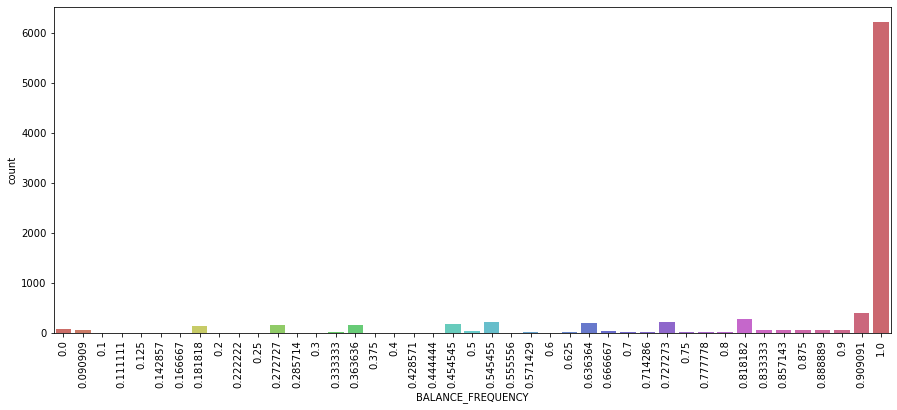

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='BALANCE_FREQUENCY', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

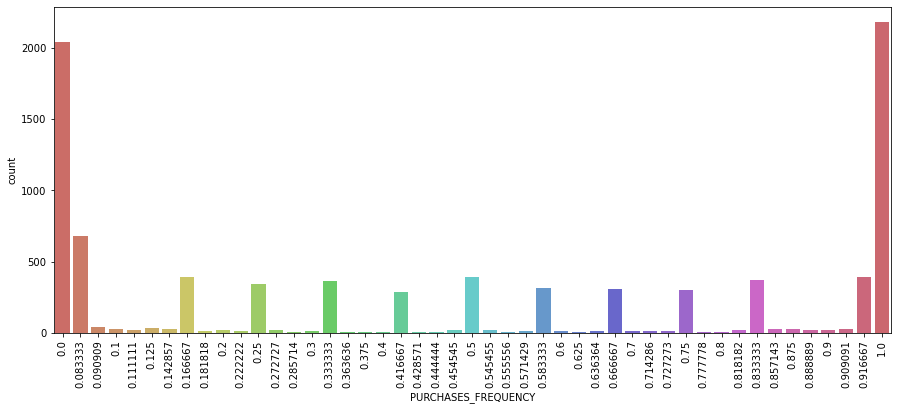

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='PURCHASES_FREQUENCY', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

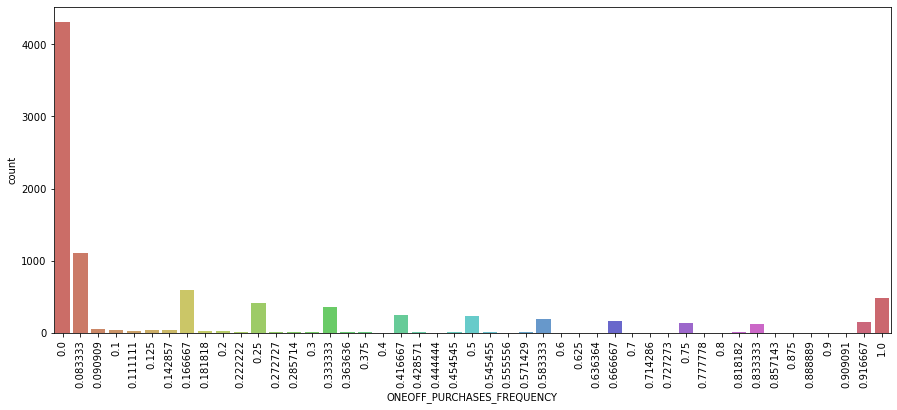

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x='ONEOFF_PURCHASES_FREQUENCY', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

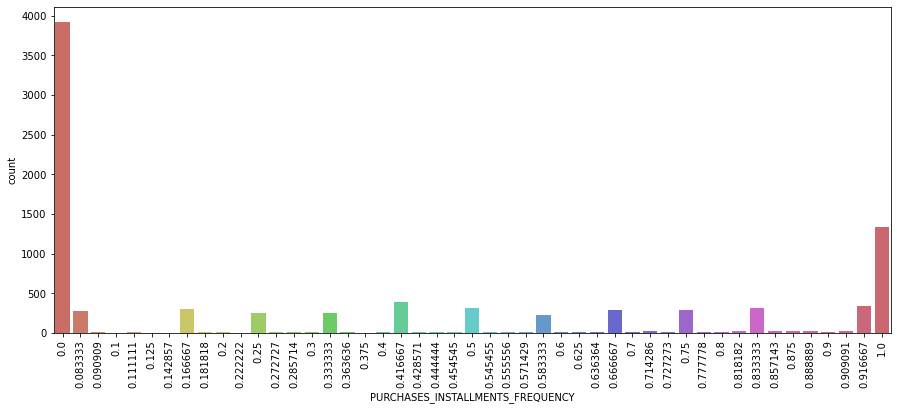

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='PURCHASES_INSTALLMENTS_FREQUENCY', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

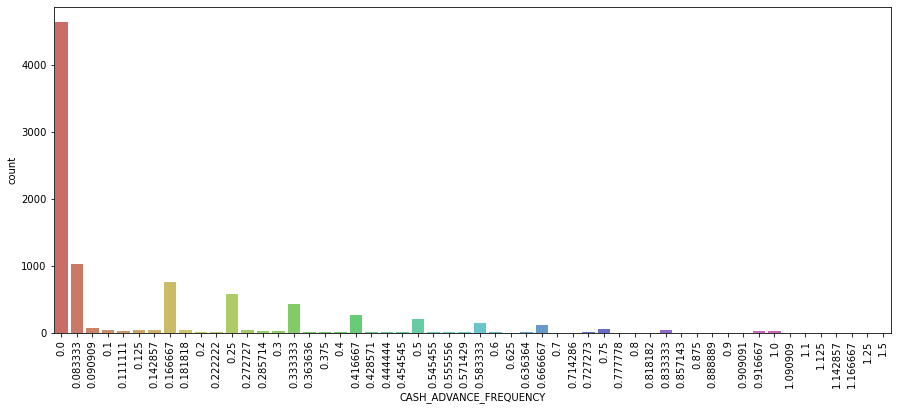

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='CASH_ADVANCE_FREQUENCY', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

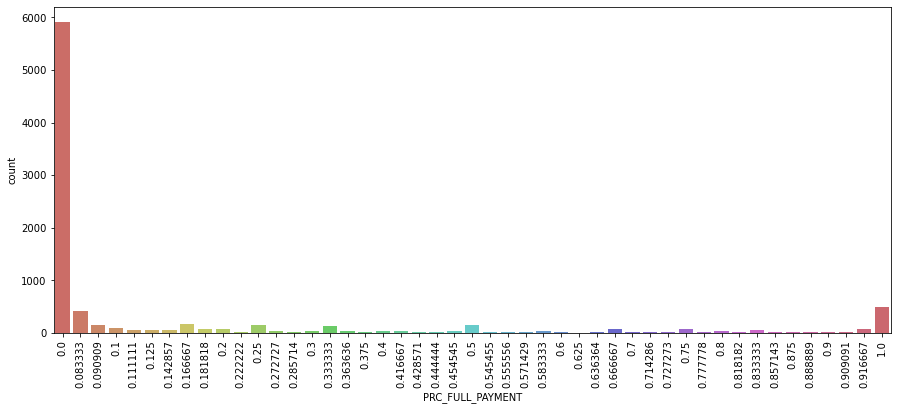

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='PRC_FULL_PAYMENT', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

## Multivariante Analysis

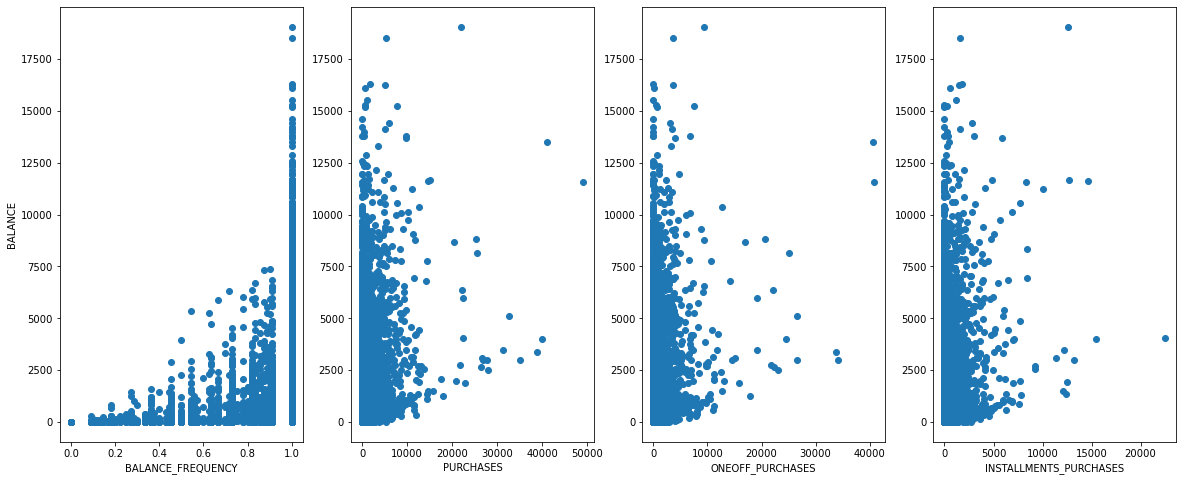

In [20]:
cols   = df.columns
fig , ax = plt.subplots(1,4, figsize = (20,8))
ax0, ax1, ax2, ax3 = ax.flatten() 

for i in range(0,4):
    
    X   = df[cols[i+2]]
    Y   = df[cols[1]]
    ax[i].plot(X, Y, marker = 'o', linestyle = "None")
    ax[i].set_xlabel(cols[i+2])
    ax[0].set_ylabel(cols[1])

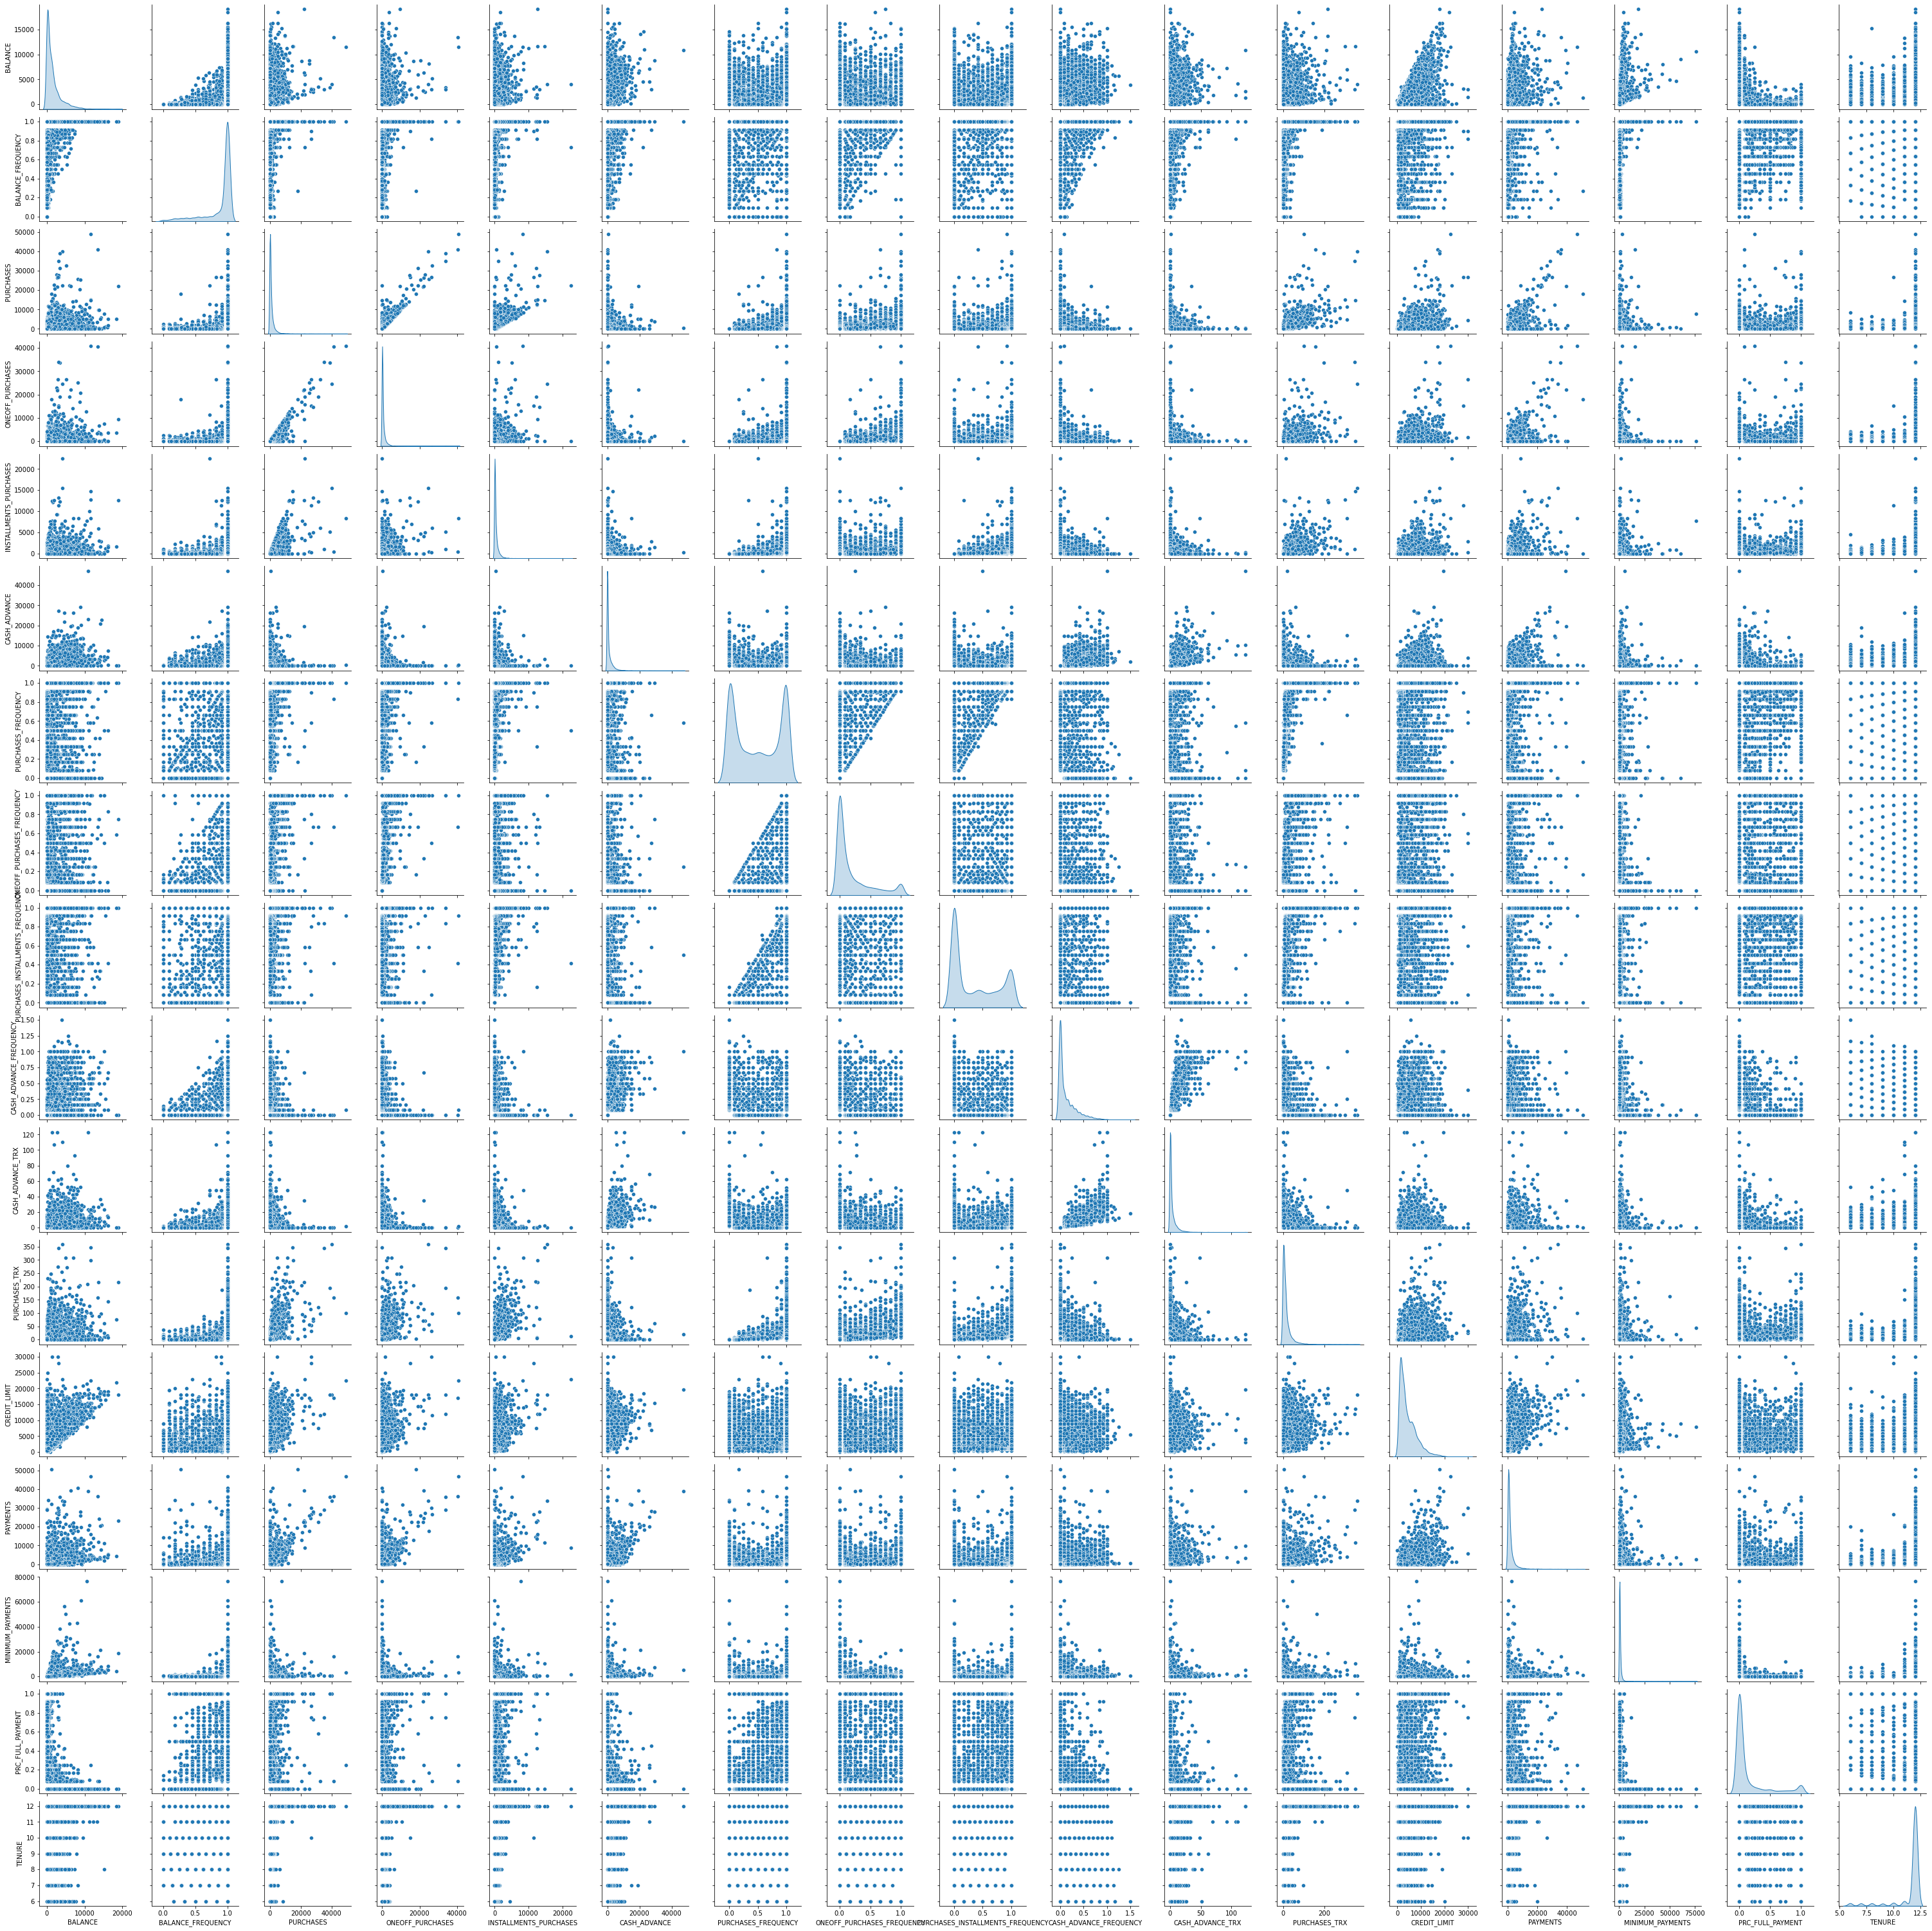

In [21]:
sns.pairplot(df,diag_kind="kde")

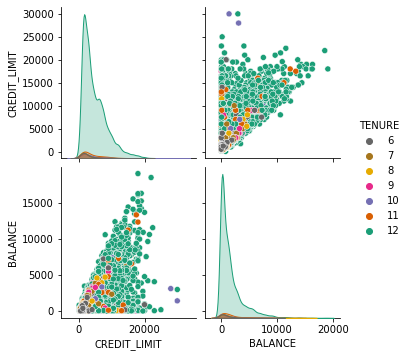

In [22]:
sns.pairplot(df,vars=['CREDIT_LIMIT','BALANCE'],hue='TENURE',palette="Dark2_r")

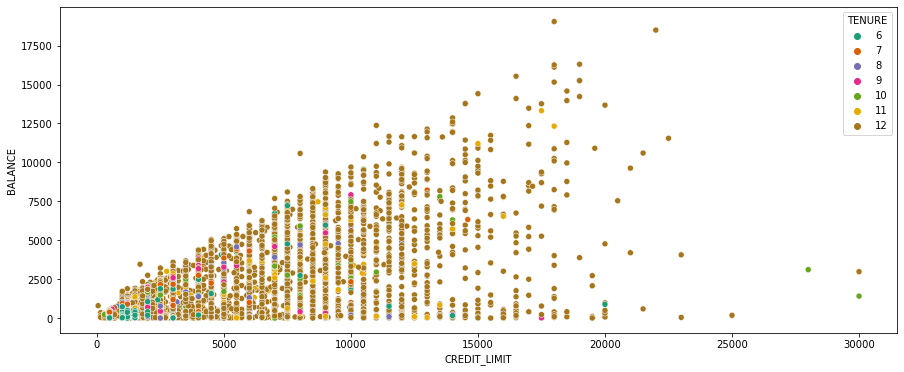

In [23]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['CREDIT_LIMIT'], y = df['BALANCE'] , hue = df['TENURE'], data = df, 
             palette = 'Dark2')
plt.show()

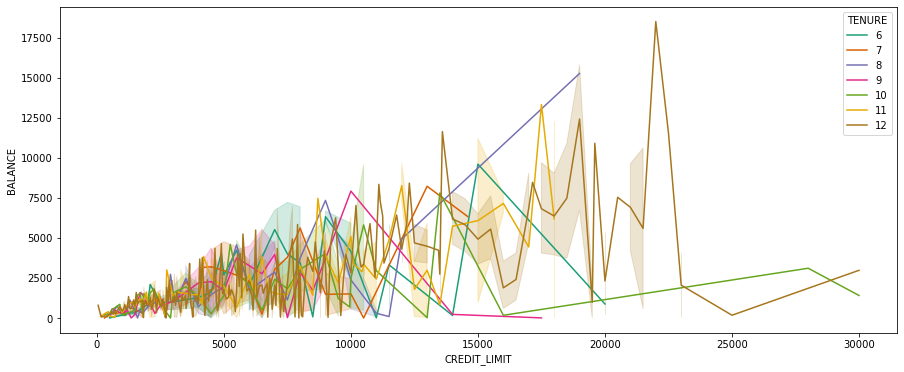

In [24]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['CREDIT_LIMIT'], y = df['BALANCE'] , hue = df['TENURE'], data = df, 
             palette = 'Dark2')
plt.show()

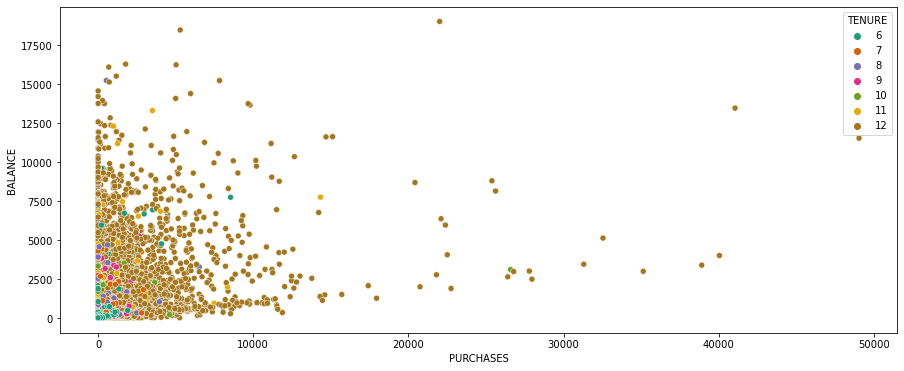

In [25]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['PURCHASES'], y = df['BALANCE'] , hue = df['TENURE'], data = df, 
             palette = 'Dark2')
plt.show()

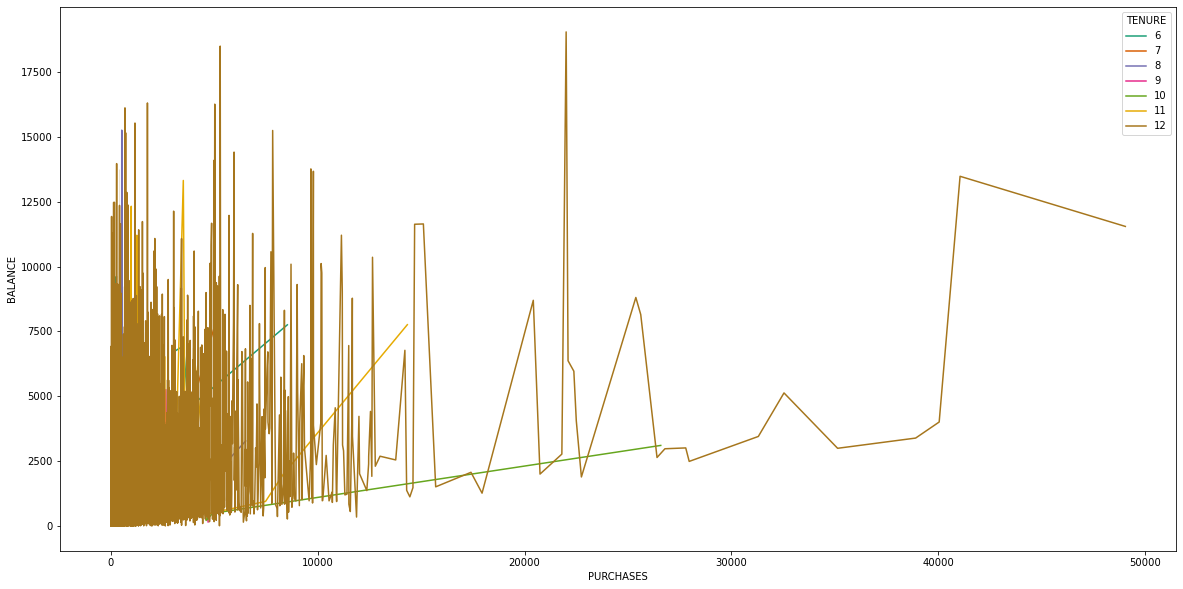

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x = df['PURCHASES'], y = df['BALANCE'] , hue = df['TENURE'], data = df, 
             palette = 'Dark2')
plt.show()

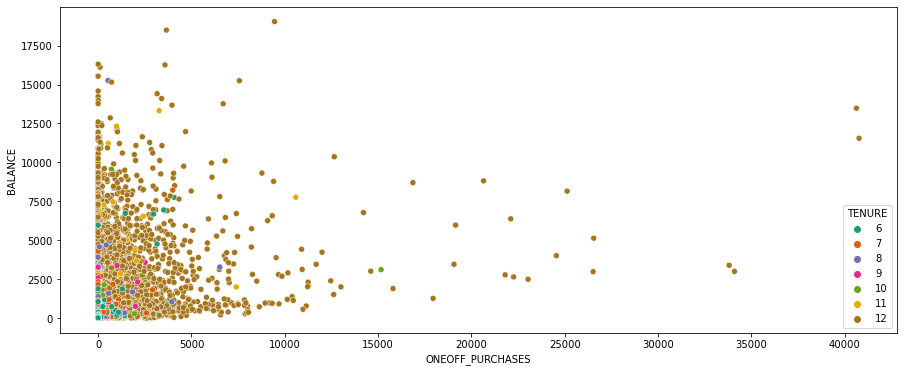

In [27]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['ONEOFF_PURCHASES'], y = df['BALANCE'] , hue = df['TENURE'], data = df, 
             palette = 'Dark2')
plt.show()

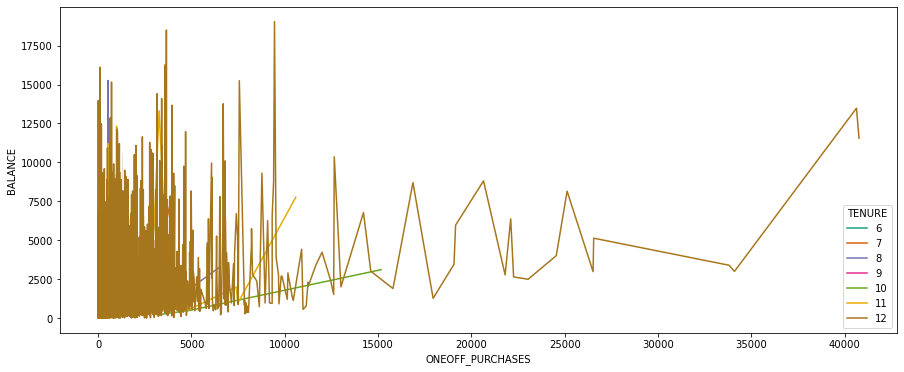

In [28]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['ONEOFF_PURCHASES'], y = df['BALANCE'] , hue = df['TENURE'], data = df, 
             palette = 'Dark2')
plt.show()

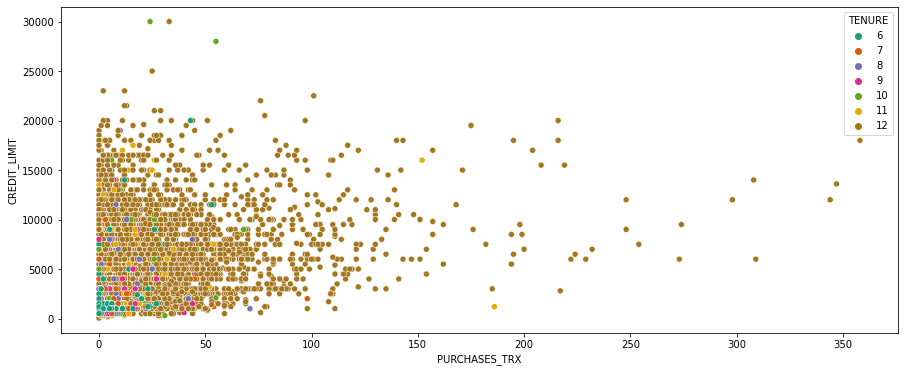

In [29]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df['PURCHASES_TRX'], y = df['CREDIT_LIMIT'] , hue = df['TENURE'], data = df, 
             palette = 'Dark2')
plt.show()

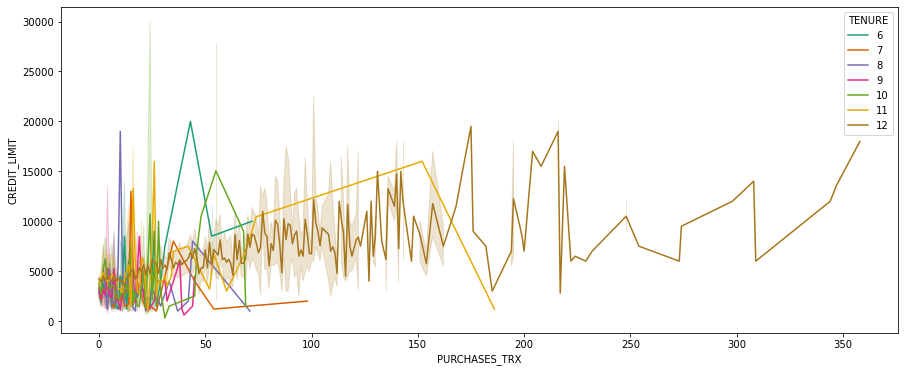

In [30]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['PURCHASES_TRX'], y = df['CREDIT_LIMIT'] , hue = df['TENURE'], data = df, 
             palette = 'Dark2')
plt.show()

In [31]:
df['Balance_decile'] = pd.qcut(df['BALANCE'], q=10)

In [32]:
df_grp   = df.groupby('Balance_decile', as_index=False).mean()

In [33]:
df_grp

Balance_decile      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
0       (-0.001, 23.576]     9.787597           0.452405   215.775073   
1       (23.576, 77.238]    46.448958           0.768000   450.422860   
2      (77.238, 207.177]   132.251652           0.841854   943.070961   
3     (207.177, 467.022]   326.800516           0.887779  1318.972603   
4     (467.022, 873.385]   667.557437           0.930546  1230.053229   
5    (873.385, 1207.816]  1044.114917           0.965270   812.550358   
6   (1207.816, 1698.589]  1440.780719           0.971716   786.925140   
7   (1698.589, 2571.434]  2085.594592           0.979268  1099.673285   
8   (2571.434, 4338.564]  3281.772957           0.983336  1447.543050   
9  (4338.564, 19043.139]  6609.638931           0.992532  1727.061777   

   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0         60.447888              155.351765     41.963481   
1        152.293754              298.985508     67.823390   
2        461.031162              482.693374    177.685714   
3        761.062592              557.910011    381.424988   
4        799.284145              431.439475    675.898728   
5        496.933609              316.027687    636.632314   
6        465.456045              321.599240    888.392630   
7        692.150000              407.665475   1321.051582   
8        940.051832              507.530011   2029.013387   
9       1095.662682              631.473899   3568.824910   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.441446                    0.051852   
1             0.615762                    0.126223   
2             0.639550                    0.247644   
3             0.581545                    0.297703   
4             0.495216                    0.255163   
5             0.416503                    0.177604   
6             0.411047                    0.186271   
7             0.428429                    0.216070   
8             0.428205                    0.219930   
9             0.445803                    0.246116   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.375659                0.013030          0.200000   
1                          0.483824                0.015884          0.267039   
2                          0.459245                0.032186          0.605587   
3                          0.418243                0.080914          1.708380   
4                          0.360774                0.124727          2.618994   
5                          0.309833                0.143683          3.024581   
6                          0.293189                0.164027          3.722905   
7                          0.304518                0.192987          4.499441   
8                          0.308294                0.248921          6.512849   
9                          0.330795                0.335084          9.328492   

   PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0       6.037989   3235.592841   462.434123        235.716763   
1      10.035754   3751.525873   716.570873        162.849518   
2      14.734078   4264.519553  1231.666036        202.716292   
3      18.008939   4028.752328  1783.648503        311.467712   
4      17.189944   3540.682806  1821.030737        386.110559   
5      12.541899   2646.927374  1360.407425        691.195716   
6      12.256983   3205.063484  1518.866562        909.532869   
7      15.806704   4442.085661  1961.343276       1083.937884   
8      17.753073   6271.289995  2645.195054       1538.553797   
9      22.732961   9556.648045  3830.275931       3119.984313   

   PRC_FULL_PAYMENT     TENURE  
0          0.265224  11.297207  
1          0.416853  11.456983  
2          0.378883  11.427933  
3          0.245386  11.511732  
4          0.116796  11.448045  
5          0.037973  11.475978  
6          0.025084  11.595531  
7          0.019971  11.565363  
8          0.021517  11.689385  
9

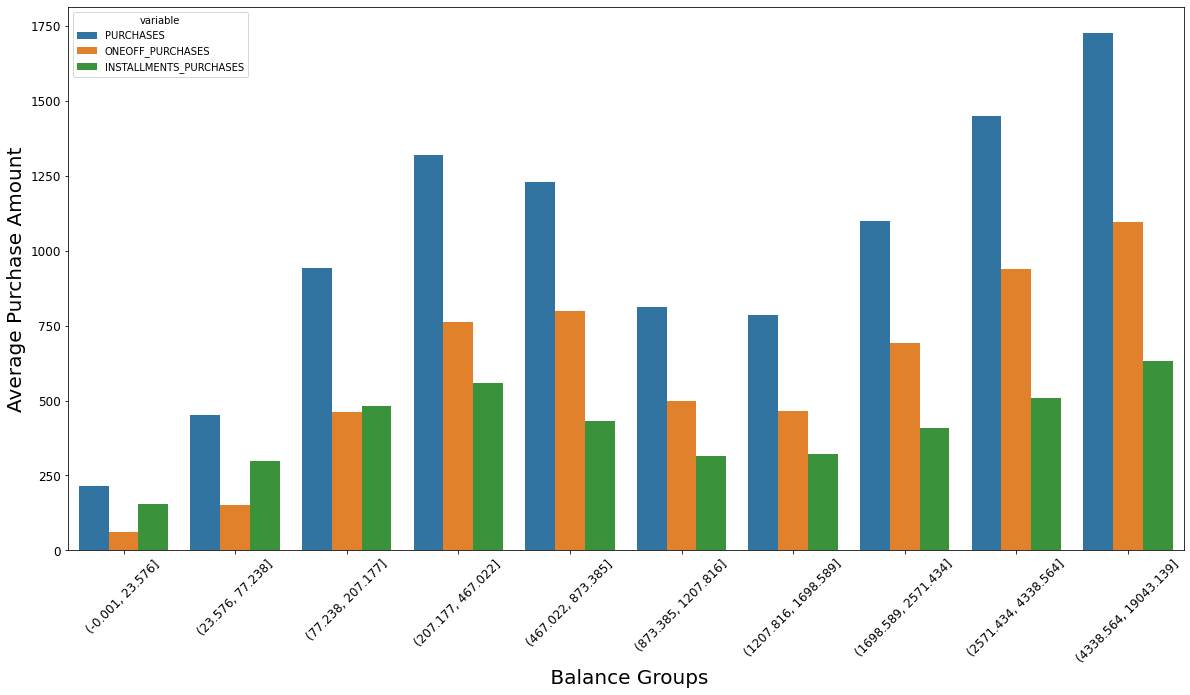

In [34]:
data_grp1   = df_grp[['Balance_decile', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]
data_grp_t1 = pd.melt(data_grp1, id_vars = 'Balance_decile')
fig = plt.figure(figsize=(20,10))
sns.barplot(x= "Balance_decile" , y = "value", hue = 'variable', data =data_grp_t1)
plt.ylabel("Average Purchase Amount", fontsize=20)
plt.xlabel(" Balance Groups", fontsize =20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

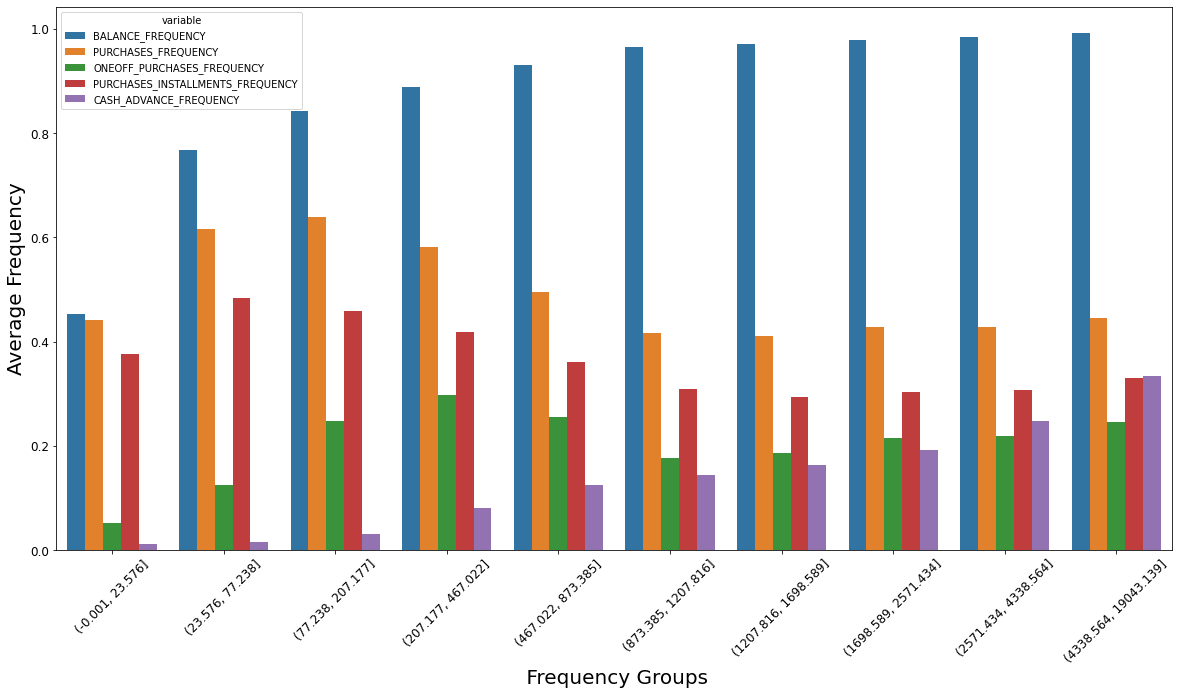

In [35]:
data_grp1   = df_grp[['Balance_decile','BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY']]
data_grp_t1 = pd.melt(data_grp1, id_vars = 'Balance_decile')
fig = plt.figure(figsize=(20,10))
sns.barplot(x= "Balance_decile" , y = "value", hue = 'variable', data =data_grp_t1)
plt.ylabel("Average Frequency", fontsize=20)
plt.xlabel(" Frequency Groups", fontsize =20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.show()

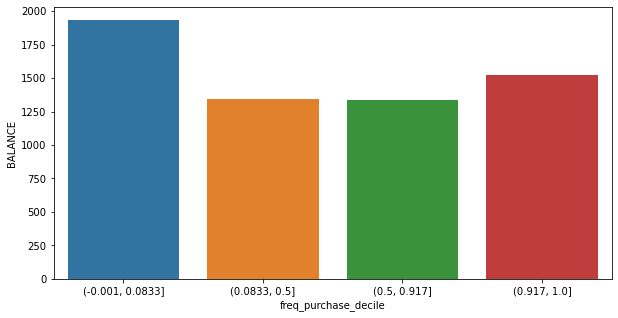

In [36]:
df['freq_purchase_decile'] = pd.qcut(df['PURCHASES_FREQUENCY'], q=4)

data_bal   = df.groupby('freq_purchase_decile', as_index=False).mean()
fig = plt.figure(figsize=(10,5))
sns.barplot(x= "freq_purchase_decile" , y = "BALANCE", data =data_bal)
plt.show()

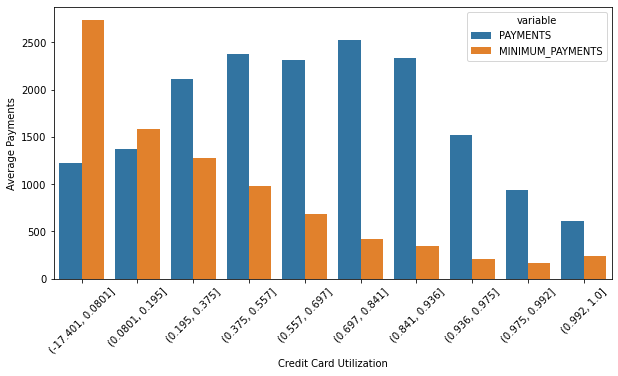

In [37]:
df['CREDIT_LIMIT'].fillna(1, inplace=True)
df['CC_utilisation']     = (df['CREDIT_LIMIT'] - df['BALANCE'])/df['CREDIT_LIMIT']

df['CC_util_decile']     = pd.qcut(df['CC_utilisation'], q=10)
data_cc_grp                 = df.groupby('CC_util_decile', as_index=False).mean()
data_cc_grp                 = data_cc_grp[['CC_util_decile', 'PAYMENTS' , 'MINIMUM_PAYMENTS']]
data_cc_grp_t               = pd.melt(data_cc_grp, id_vars = 'CC_util_decile')

fig = plt.figure(figsize=(10,5))
sns.barplot(x= "CC_util_decile" , y = "value", hue = "variable" ,data =data_cc_grp_t)
plt.xlabel("Credit Card Utilization")
plt.ylabel("Average Payments")
plt.xticks(rotation=45)
plt.show()

In [38]:
df = df.drop(['CUST_ID','Balance_decile',
       'freq_purchase_decile', 'CC_utilisation', 'CC_util_decile'], axis = 1)

Boxplot for: BALANCE


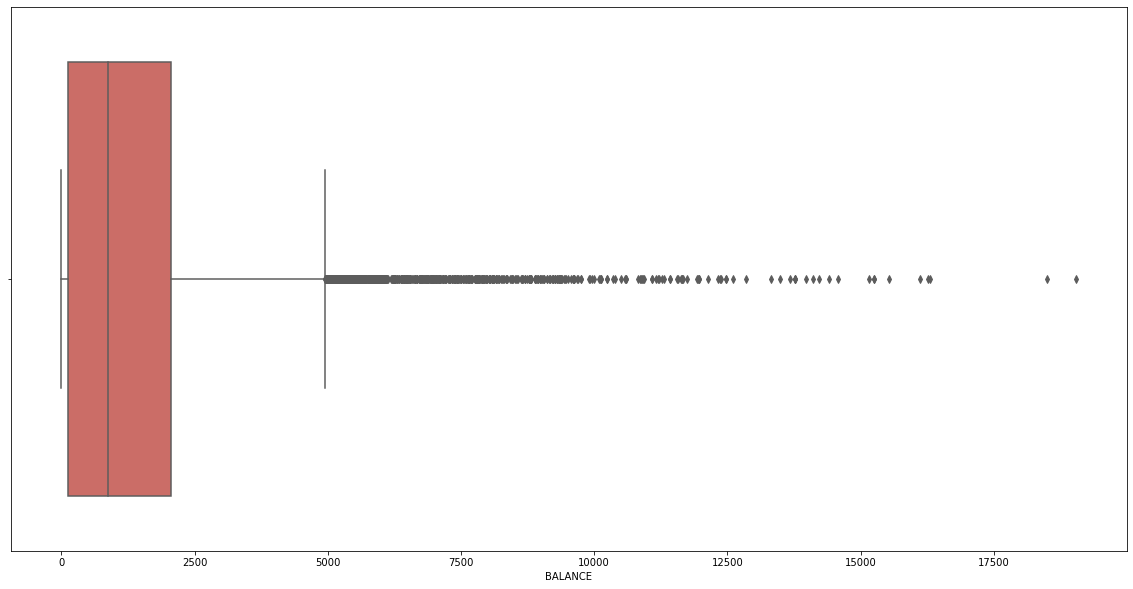

Boxplot for: BALANCE_FREQUENCY


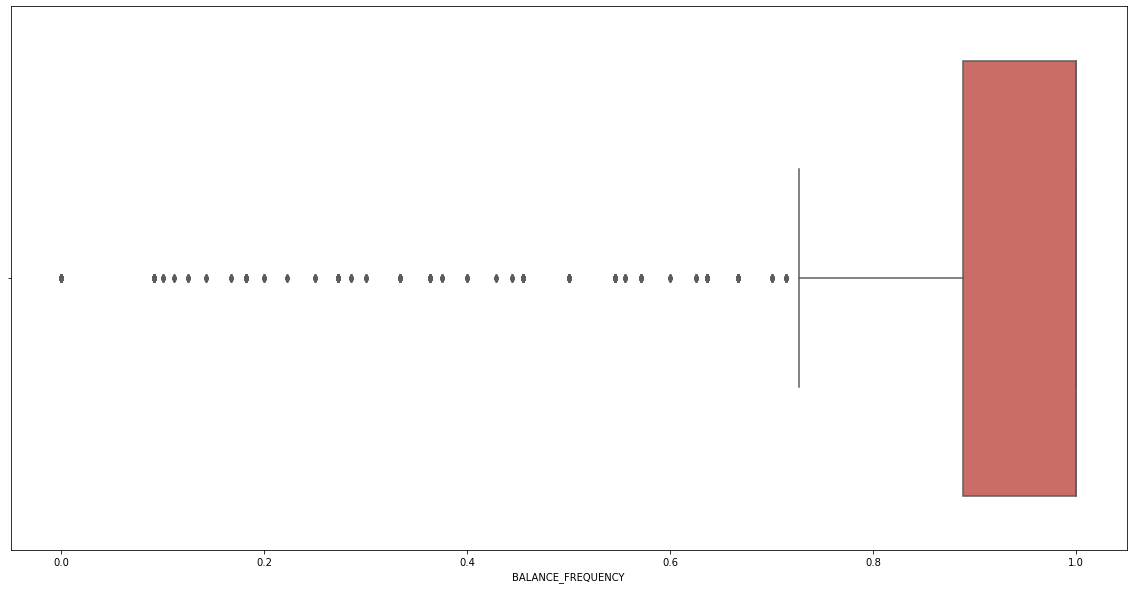

Boxplot for: PURCHASES


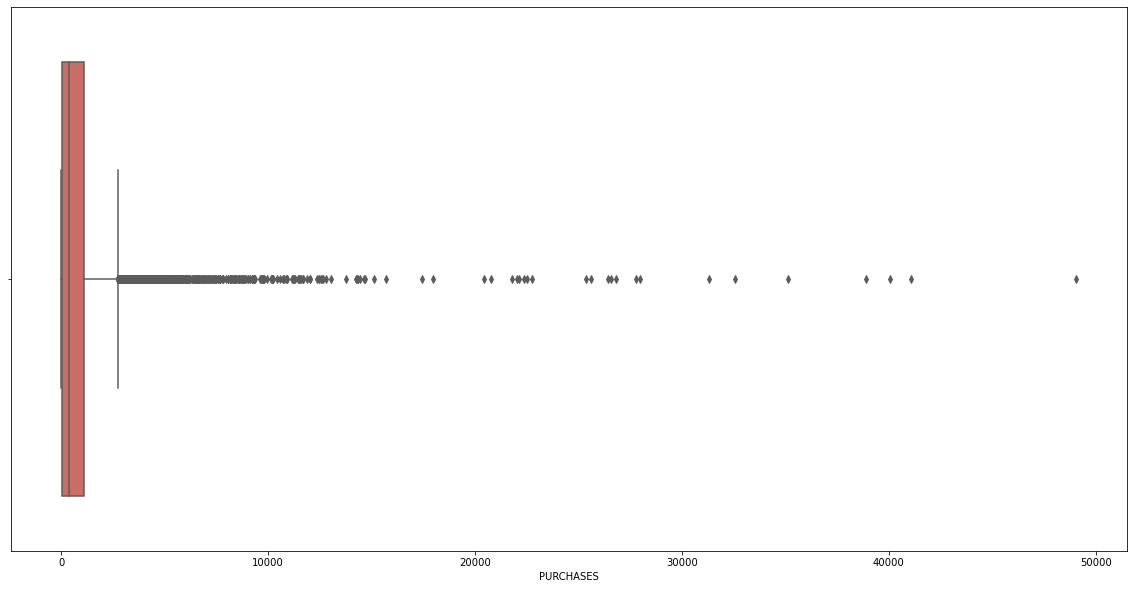

Boxplot for: ONEOFF_PURCHASES


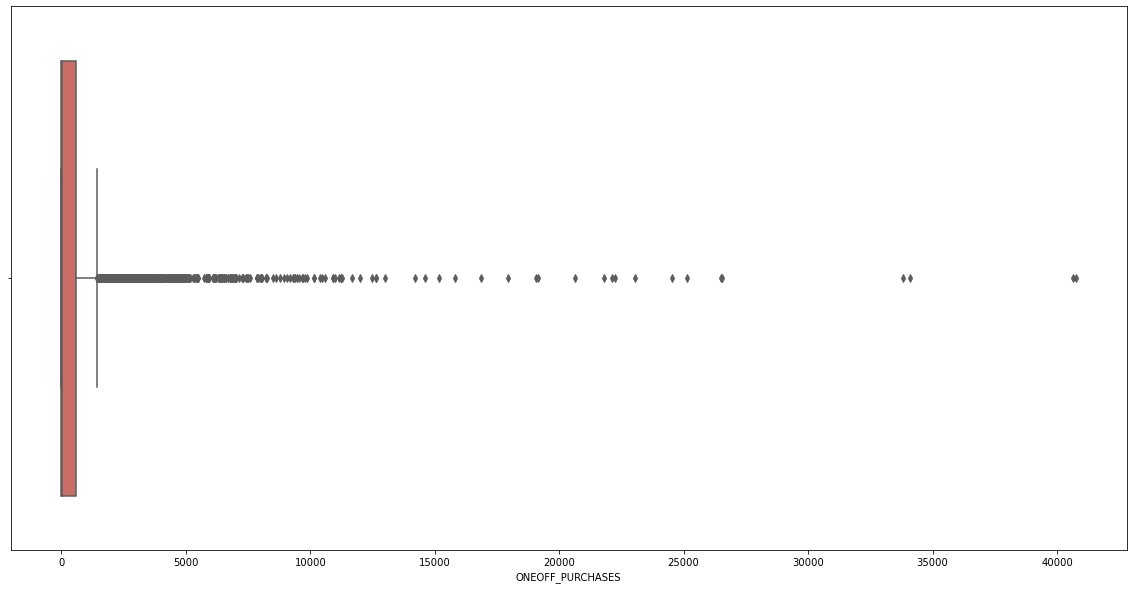

Boxplot for: INSTALLMENTS_PURCHASES


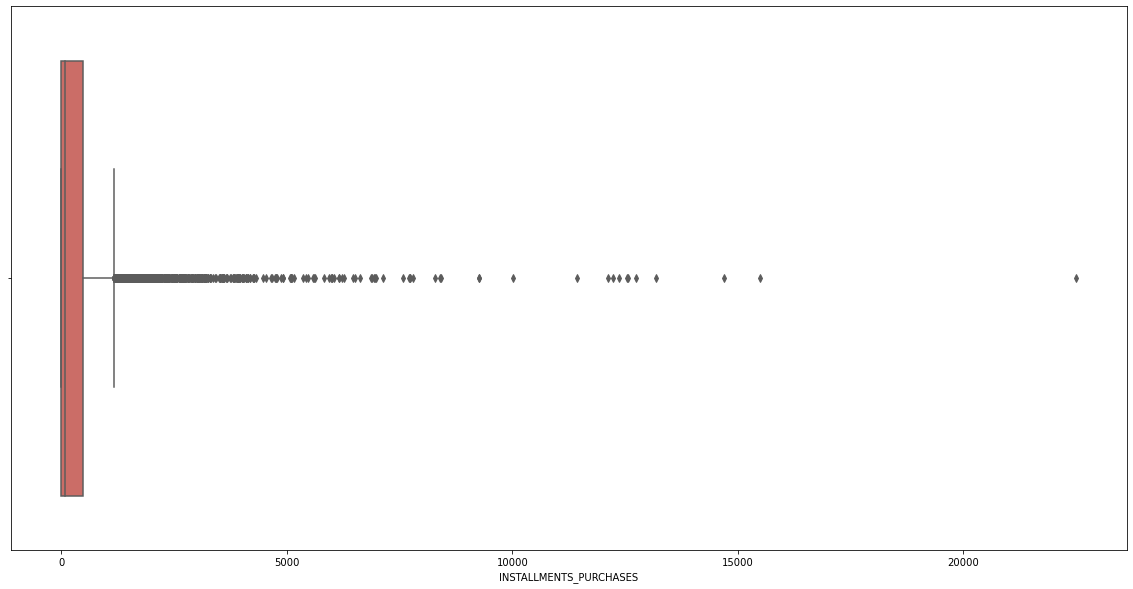

Boxplot for: CASH_ADVANCE


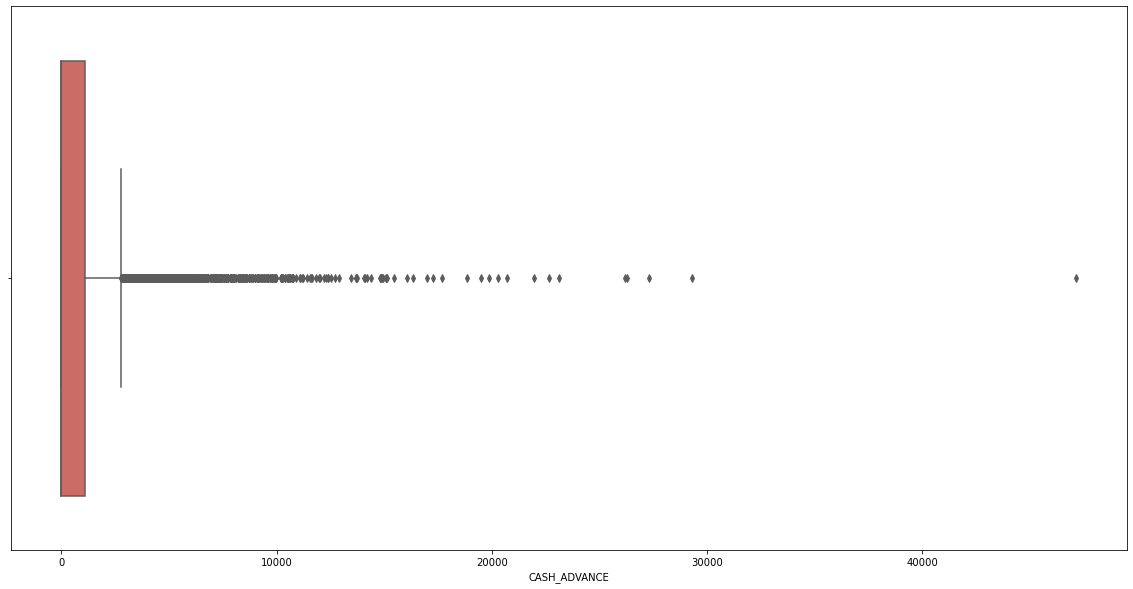

Boxplot for: PURCHASES_FREQUENCY


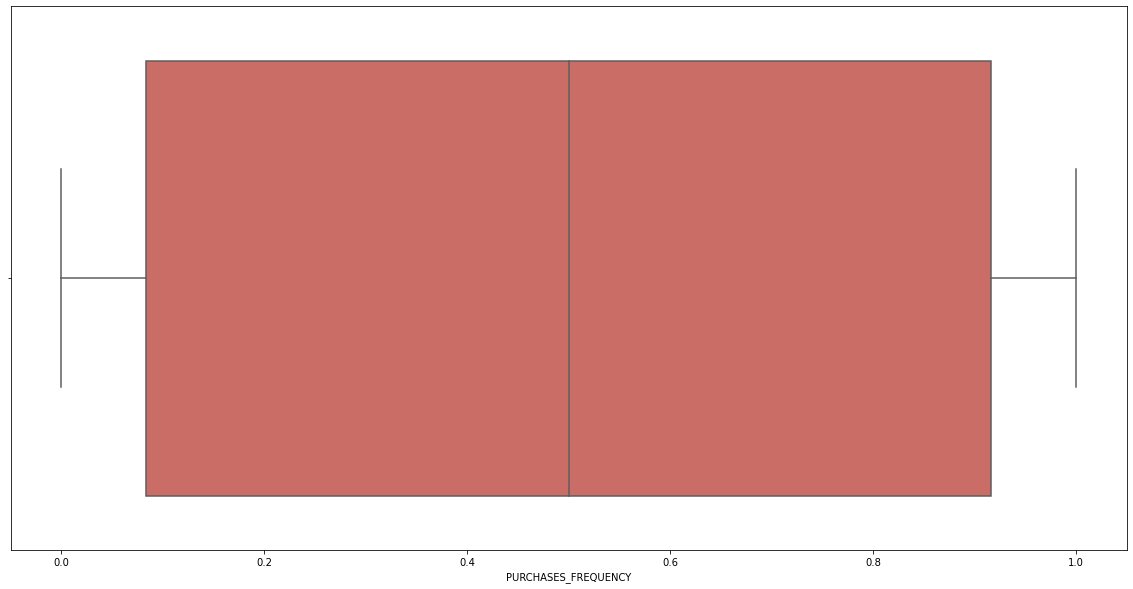

Boxplot for: ONEOFF_PURCHASES_FREQUENCY


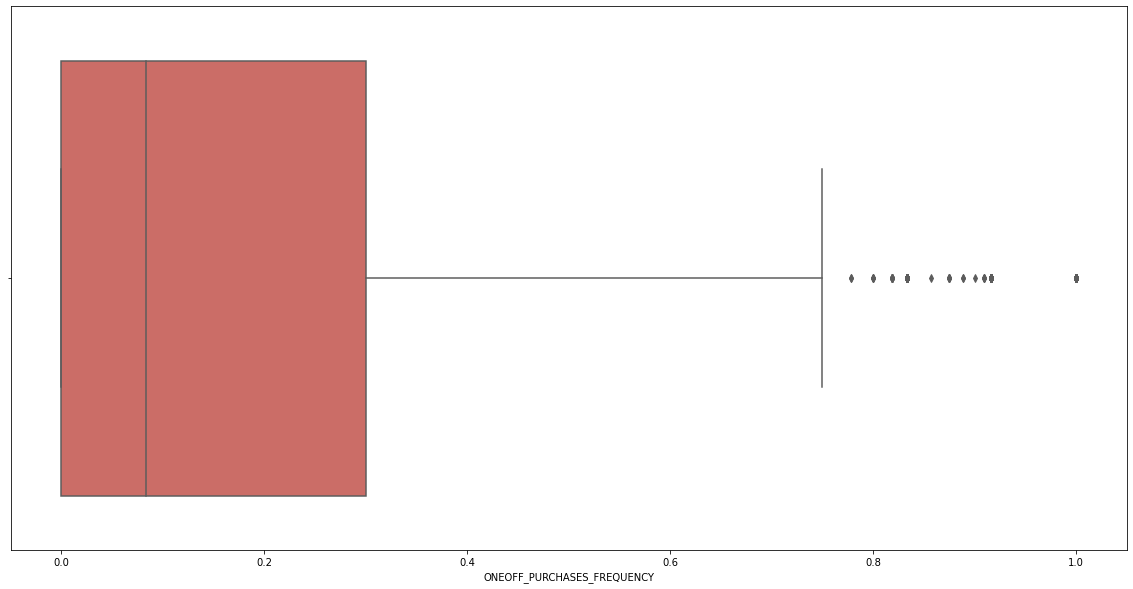

Boxplot for: PURCHASES_INSTALLMENTS_FREQUENCY


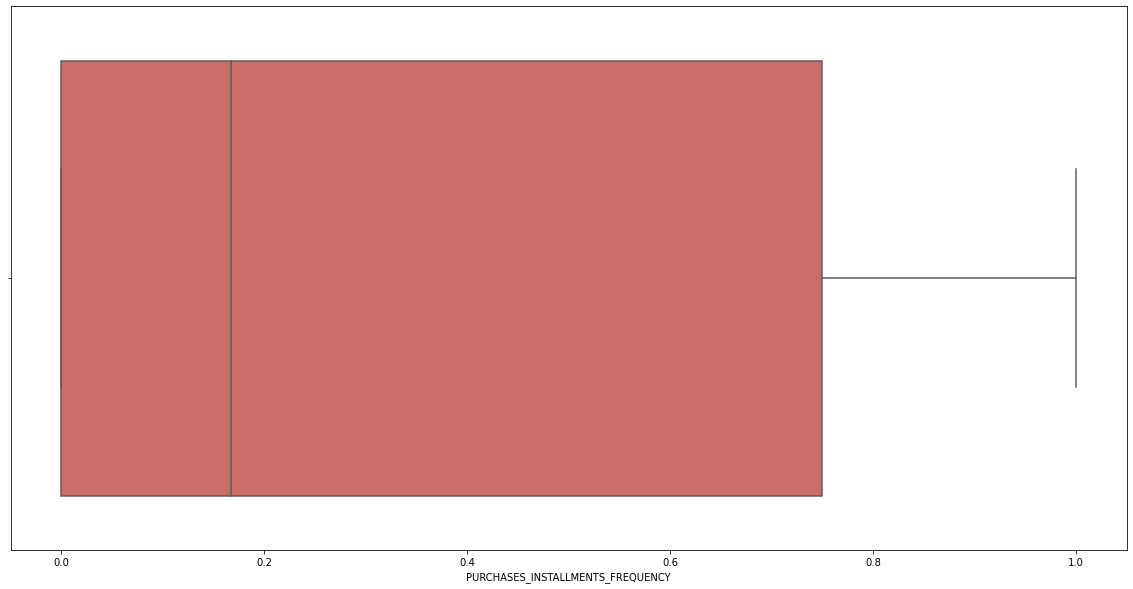

Boxplot for: CASH_ADVANCE_FREQUENCY


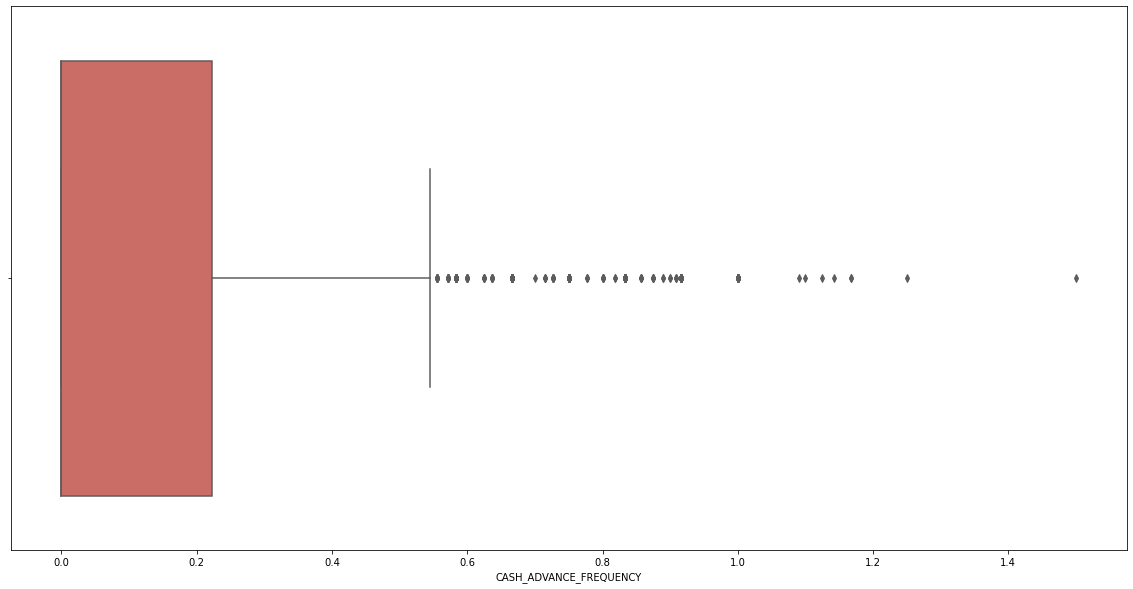

Boxplot for: CASH_ADVANCE_TRX


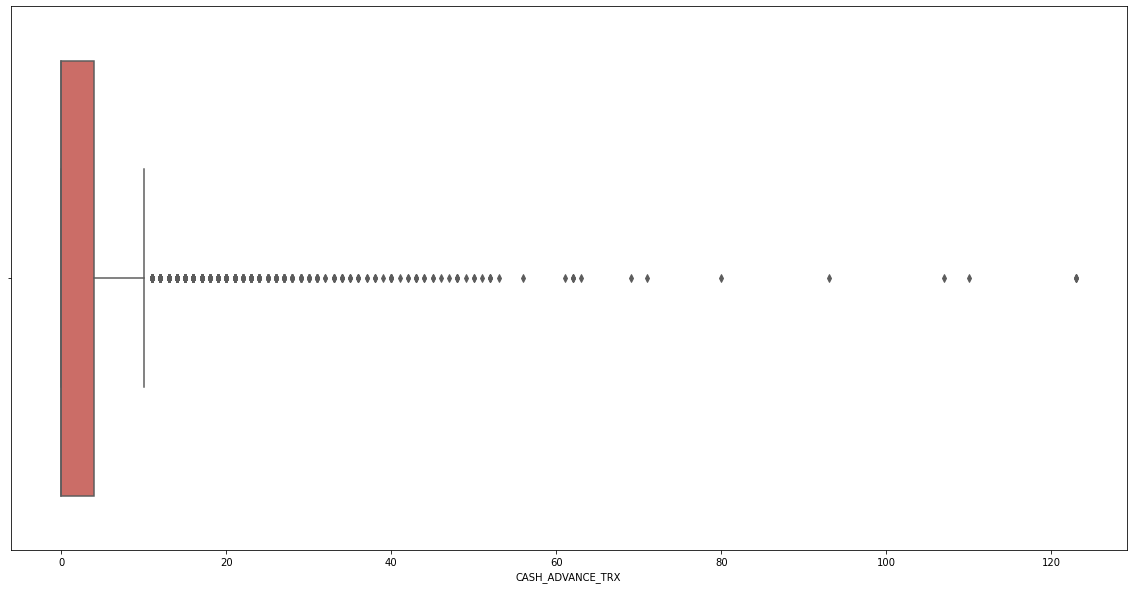

Boxplot for: PURCHASES_TRX


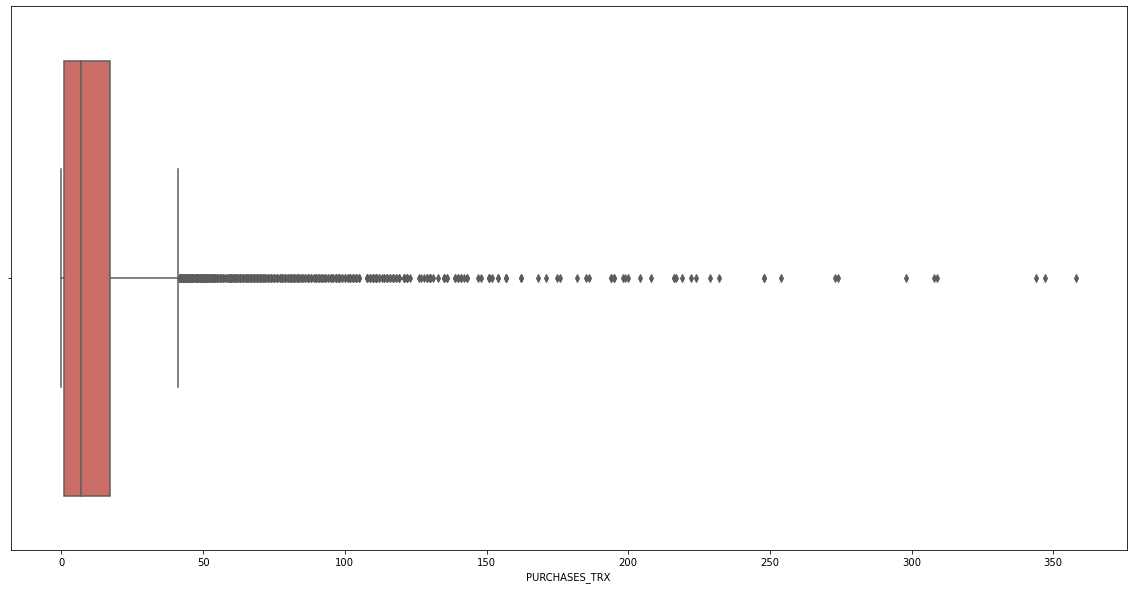

Boxplot for: CREDIT_LIMIT


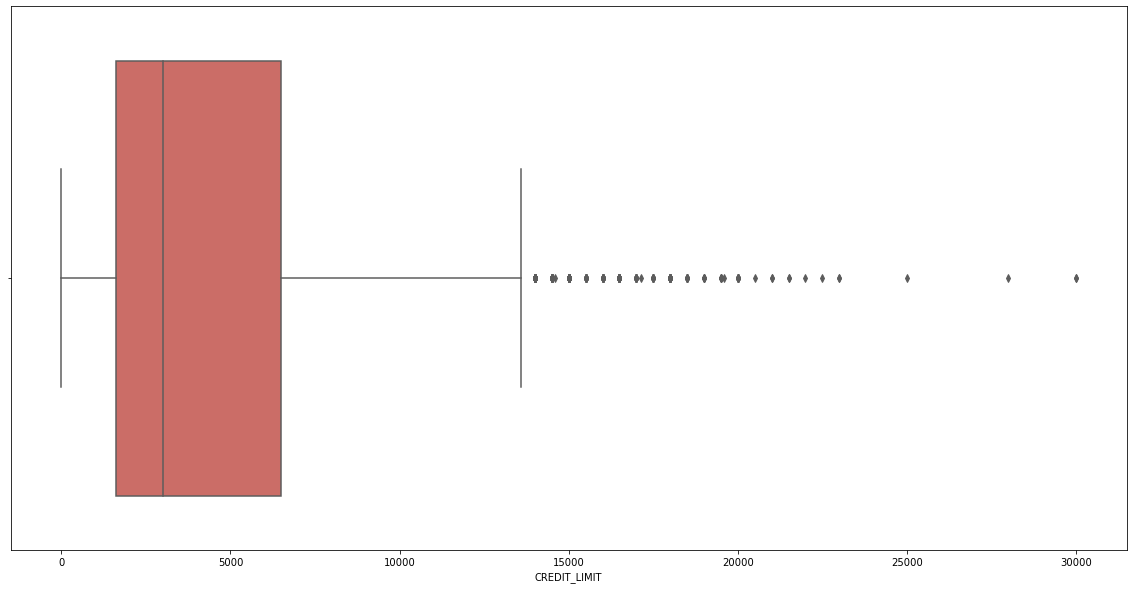

Boxplot for: PAYMENTS


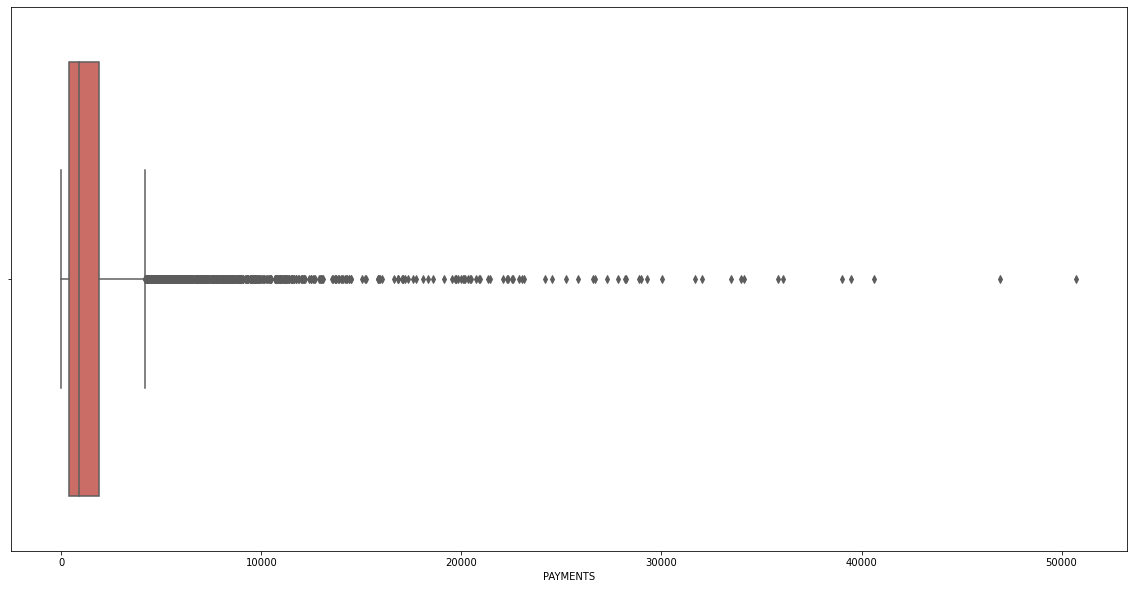

Boxplot for: MINIMUM_PAYMENTS


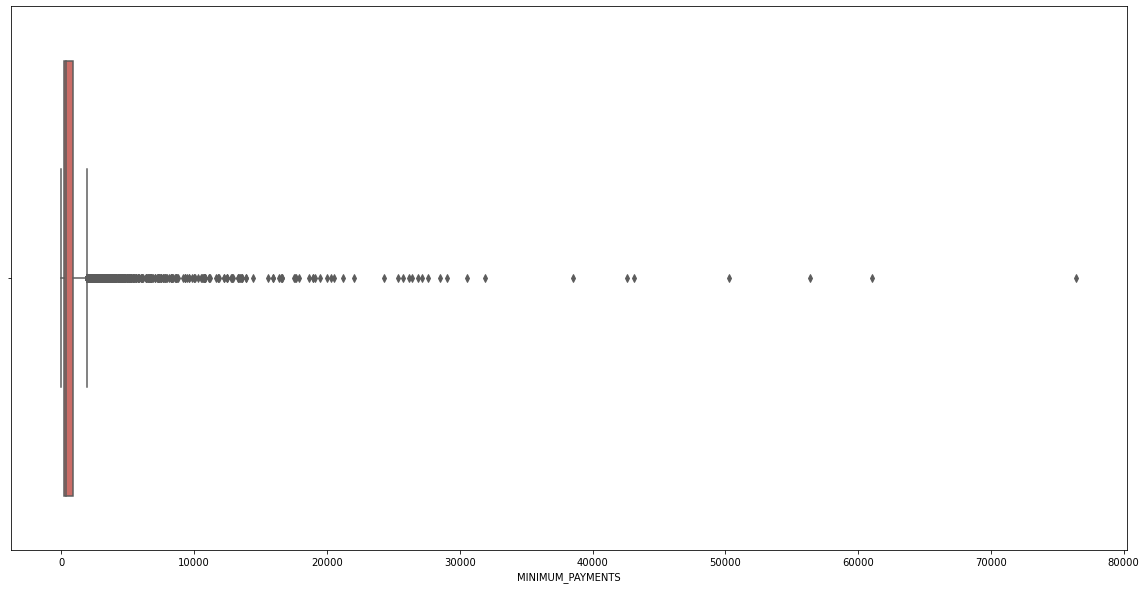

Boxplot for: PRC_FULL_PAYMENT


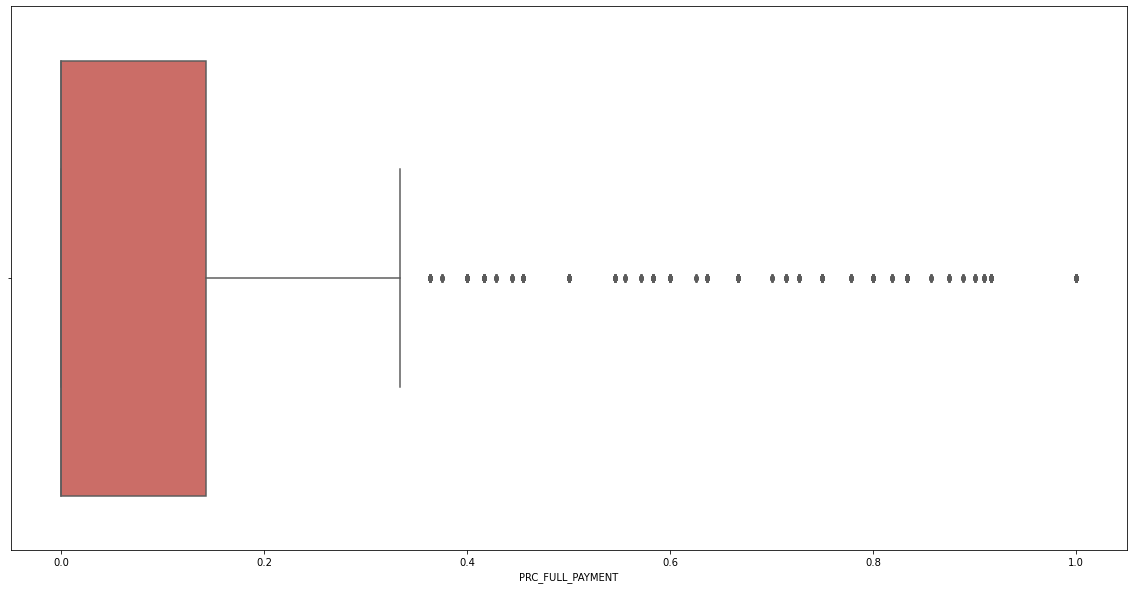

Boxplot for: TENURE


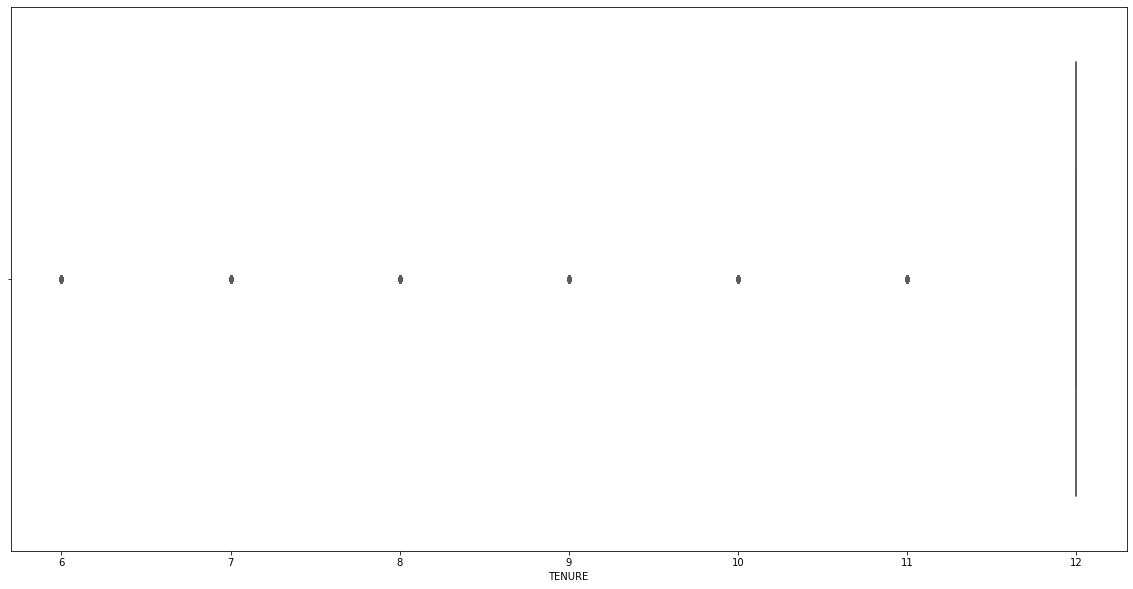

In [39]:
for i in df.columns:
    plt.figure(figsize=(20, 10))
    print('Boxplot for:', i)
    sns.boxplot(df[i], palette = 'hls')
    plt.show()

Violinplot for: BALANCE


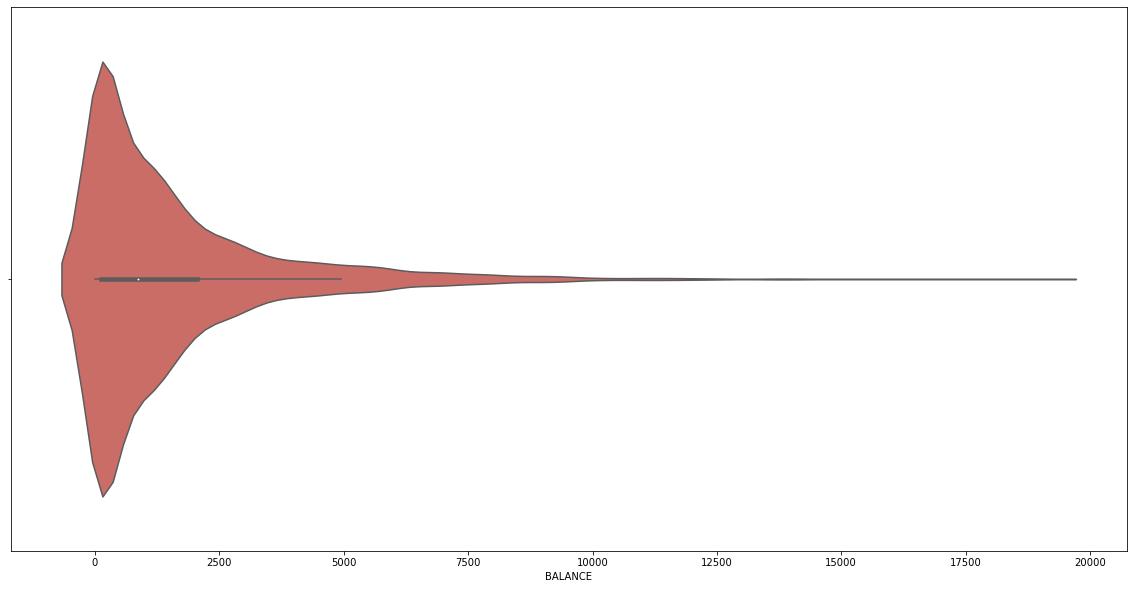

Violinplot for: BALANCE_FREQUENCY


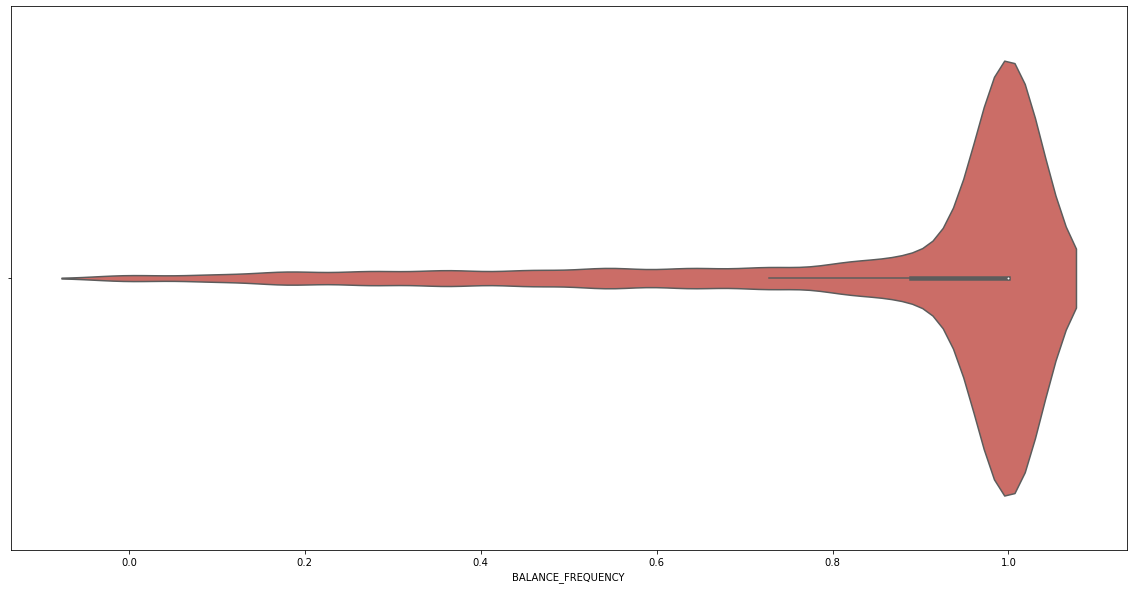

Violinplot for: PURCHASES


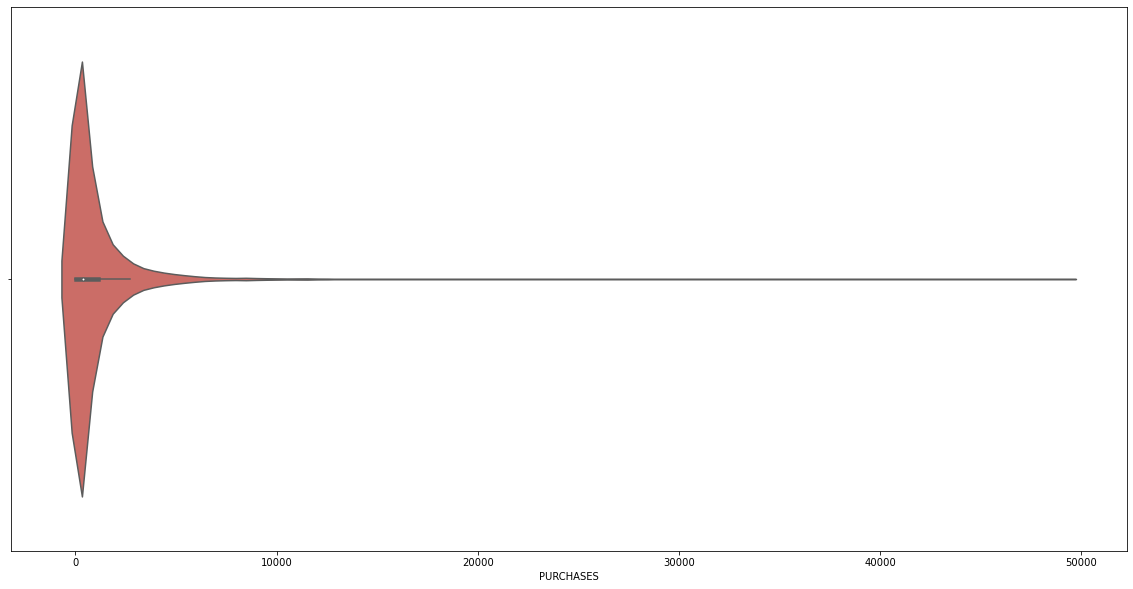

Violinplot for: ONEOFF_PURCHASES


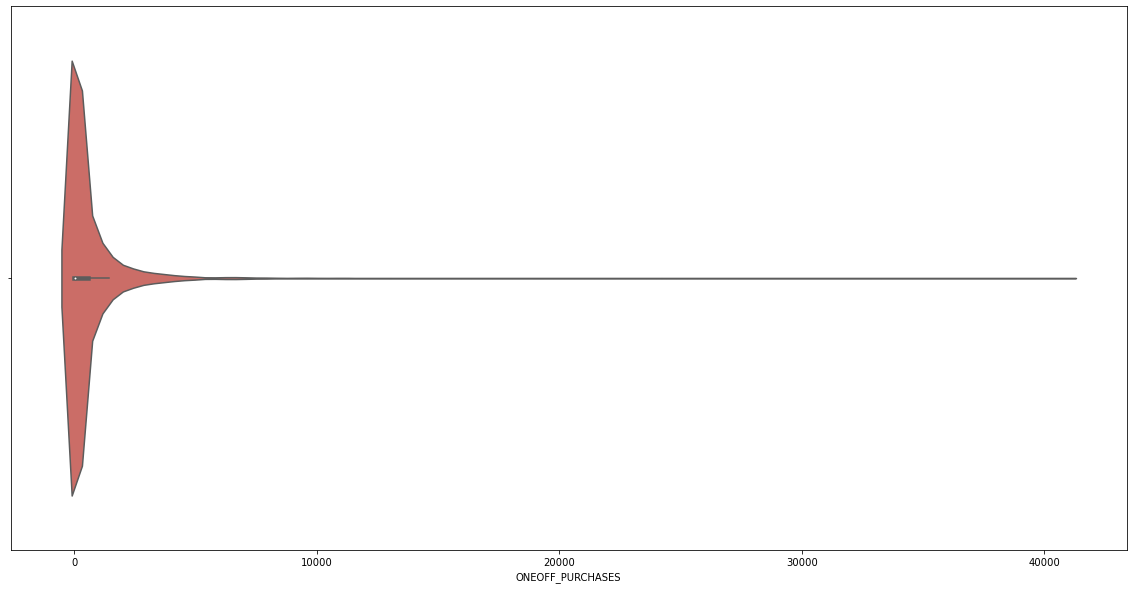

Violinplot for: INSTALLMENTS_PURCHASES


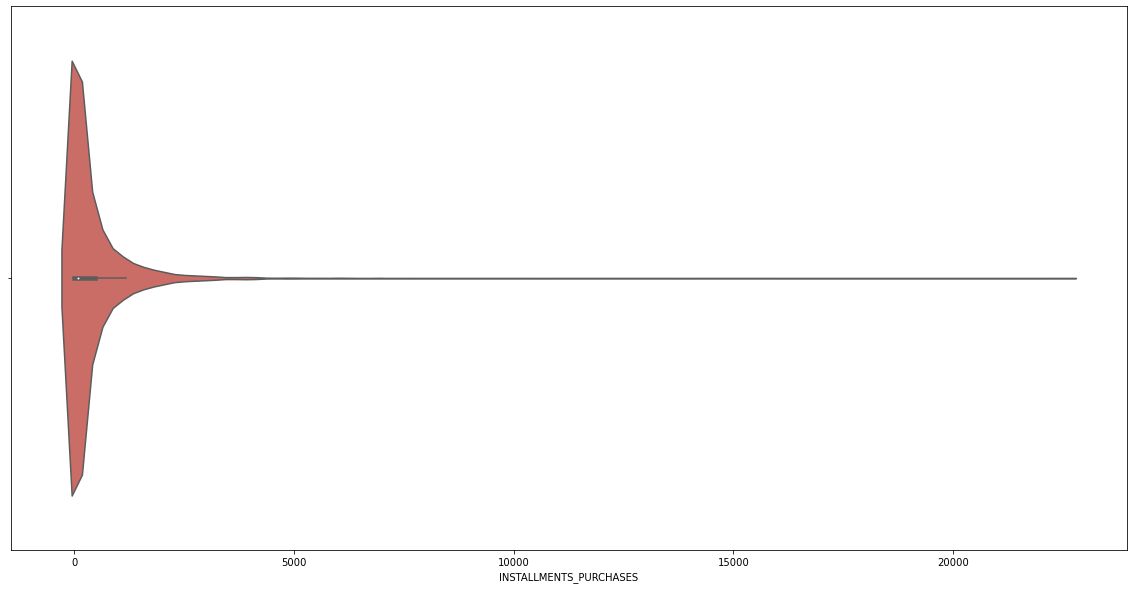

Violinplot for: CASH_ADVANCE


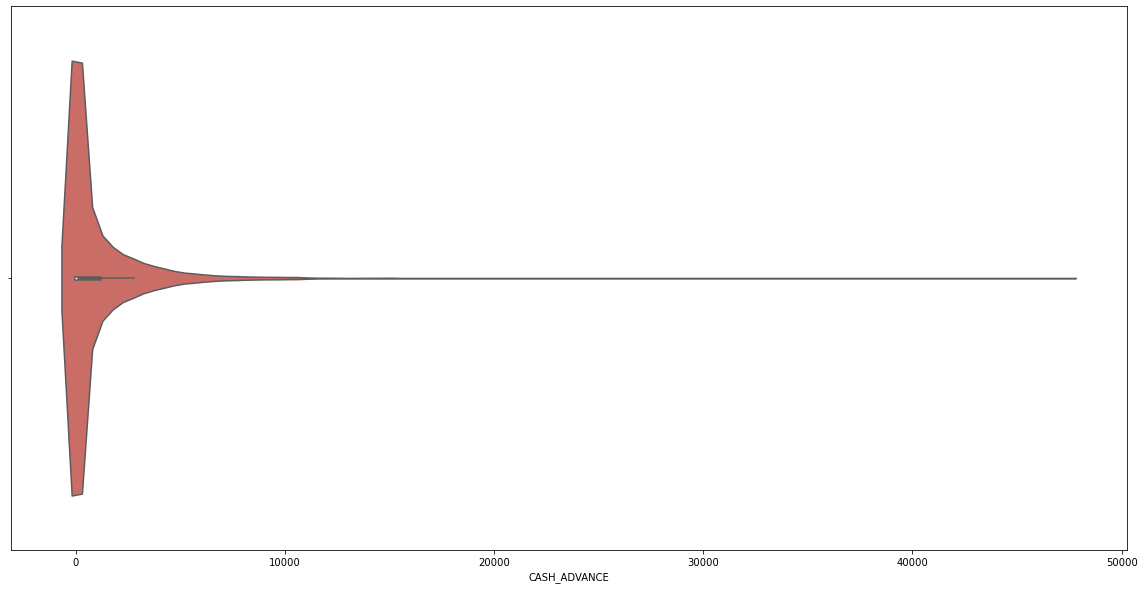

Violinplot for: PURCHASES_FREQUENCY


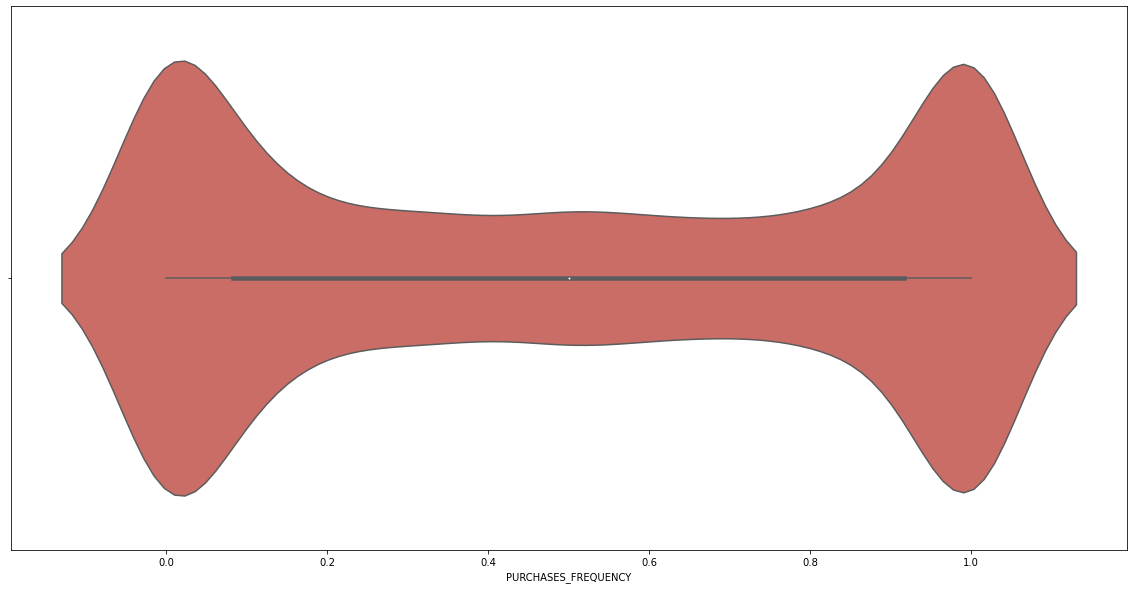

Violinplot for: ONEOFF_PURCHASES_FREQUENCY


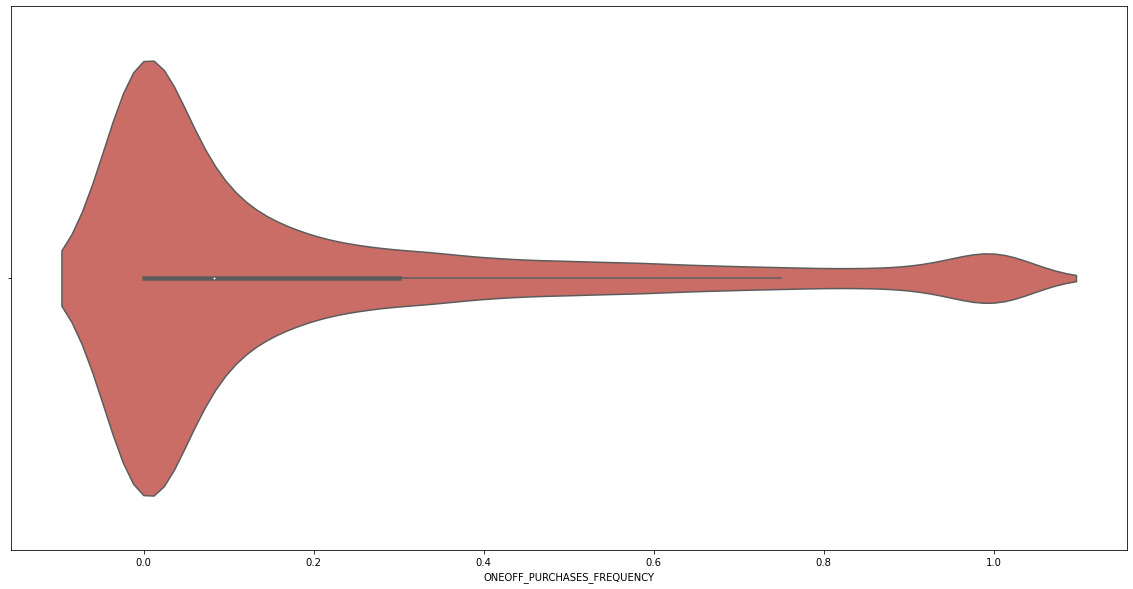

Violinplot for: PURCHASES_INSTALLMENTS_FREQUENCY


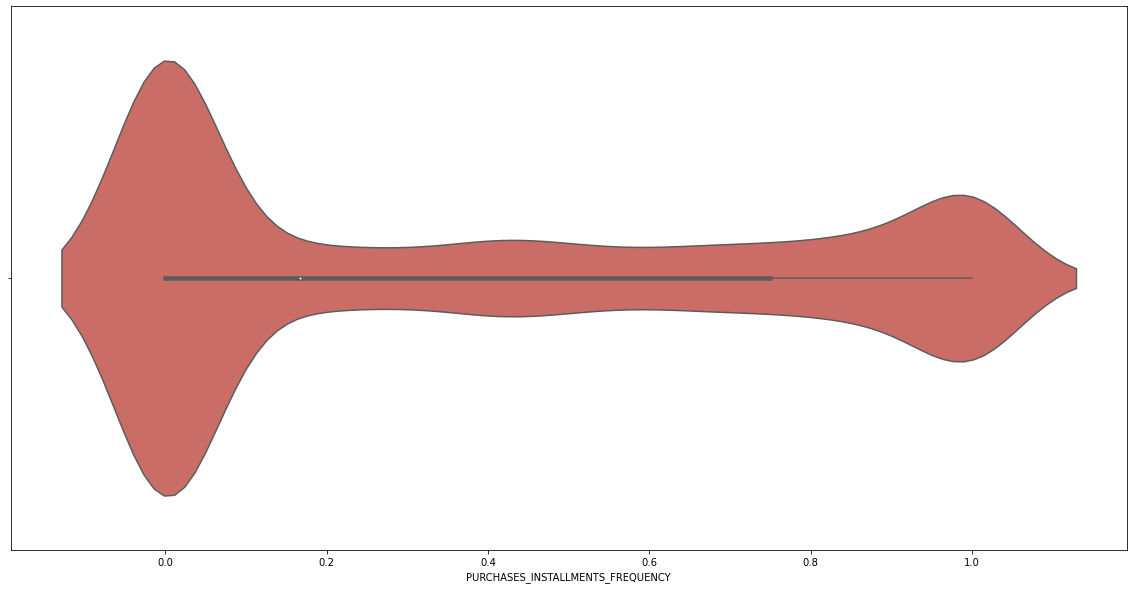

Violinplot for: CASH_ADVANCE_FREQUENCY


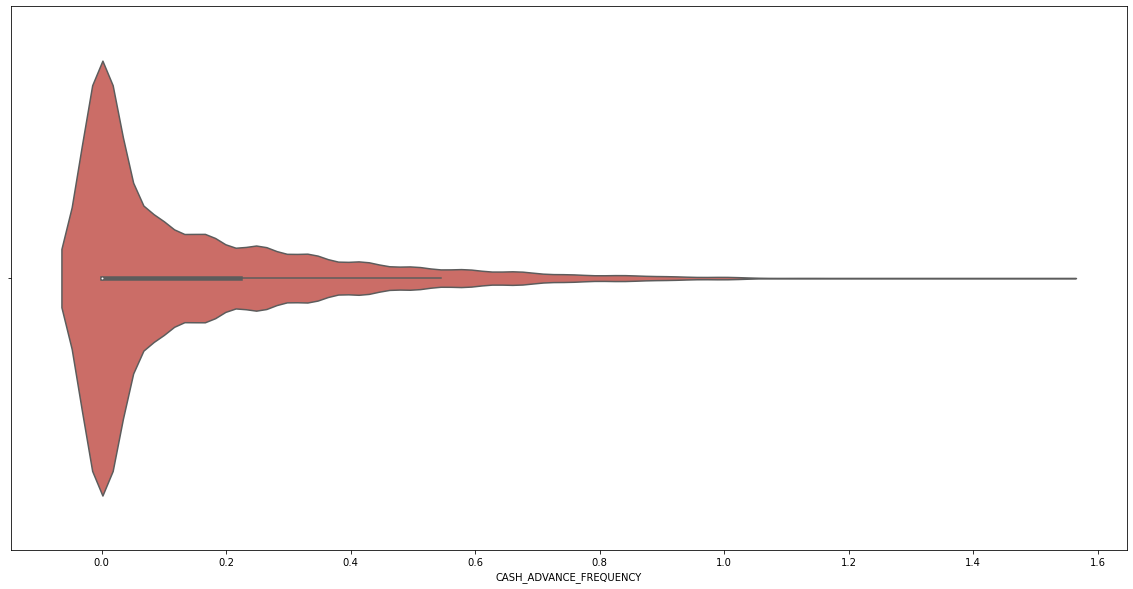

Violinplot for: CASH_ADVANCE_TRX


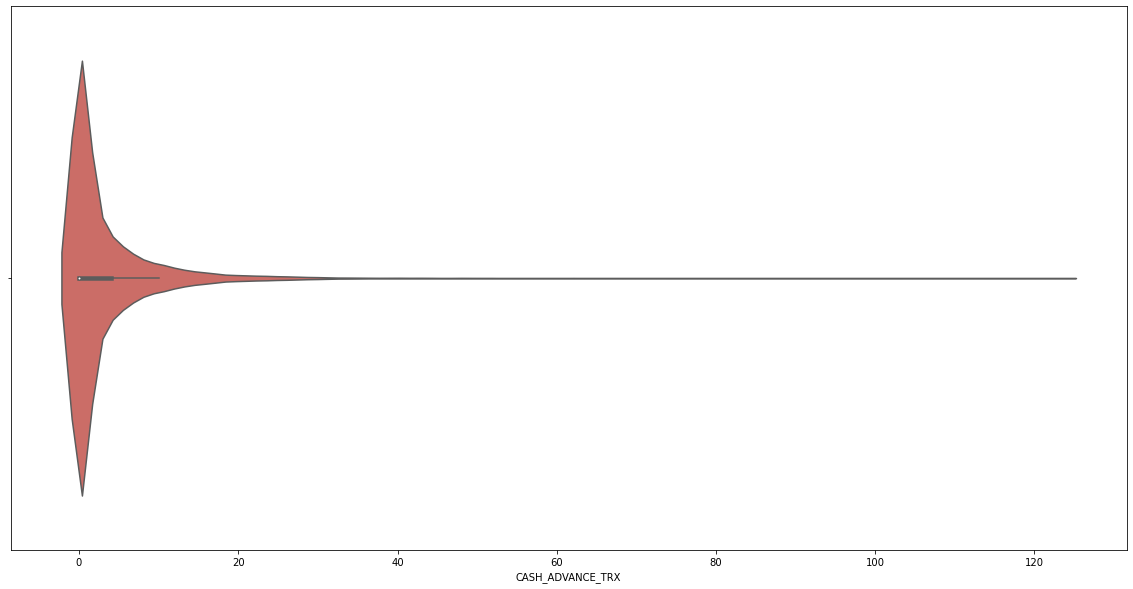

Violinplot for: PURCHASES_TRX


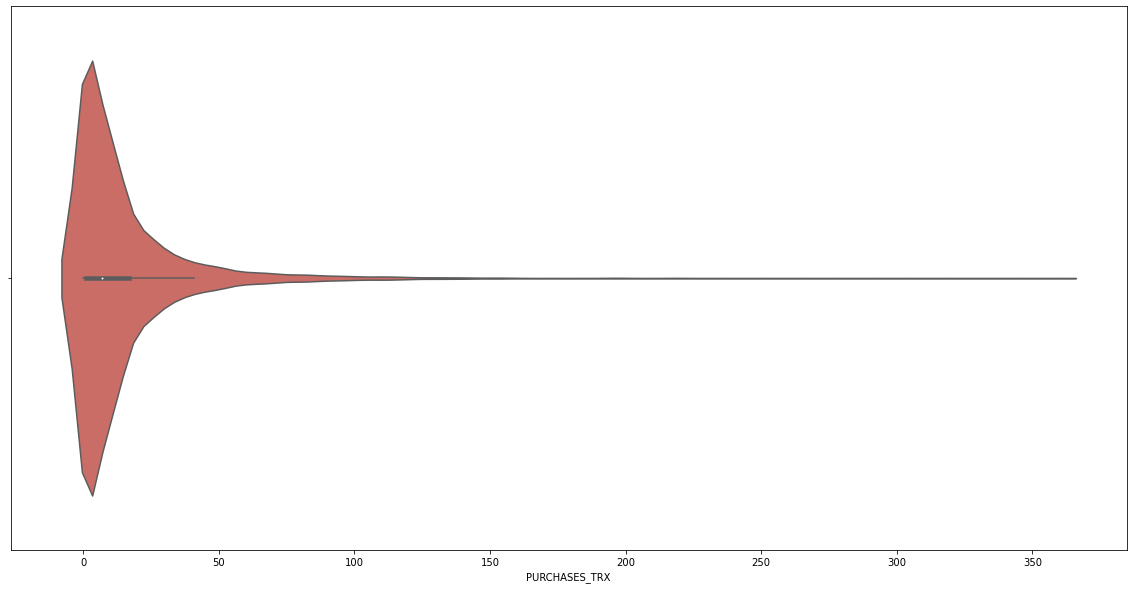

Violinplot for: CREDIT_LIMIT


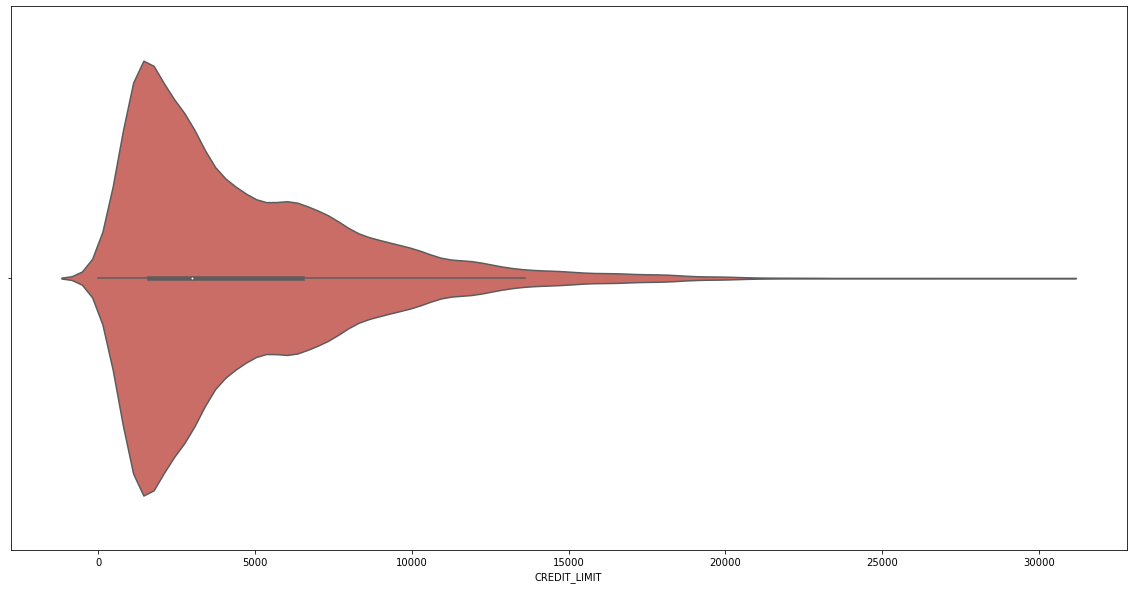

Violinplot for: PAYMENTS


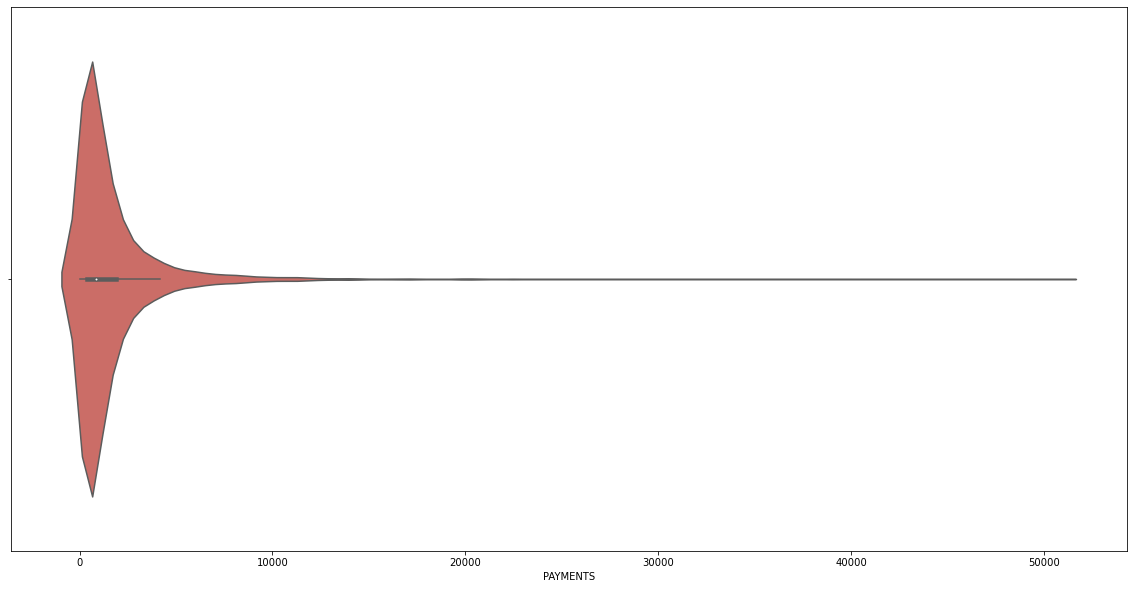

Violinplot for: MINIMUM_PAYMENTS


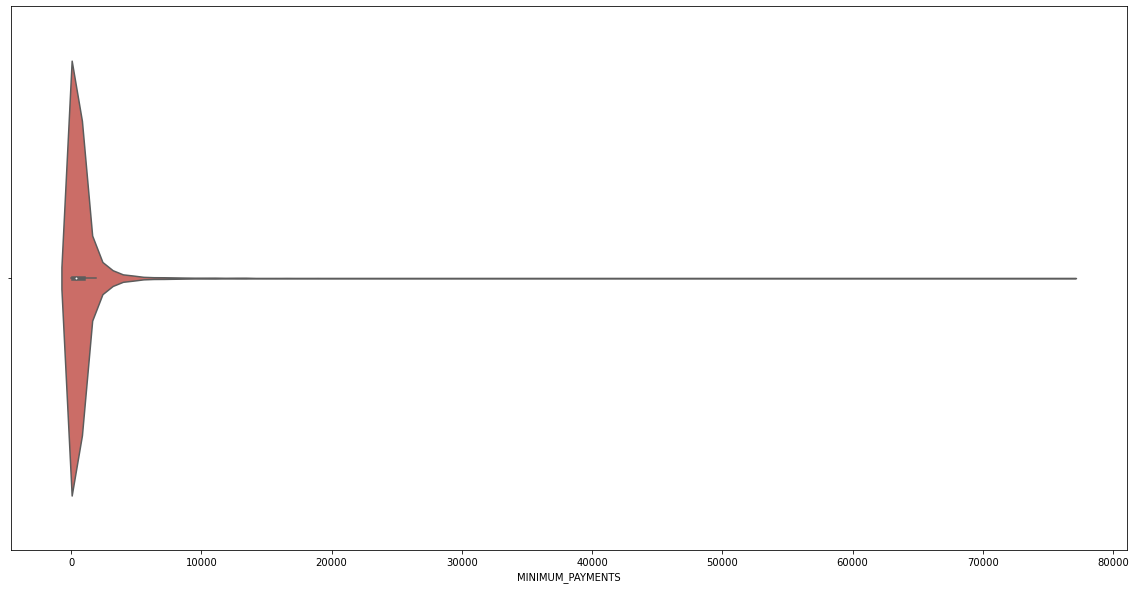

Violinplot for: PRC_FULL_PAYMENT


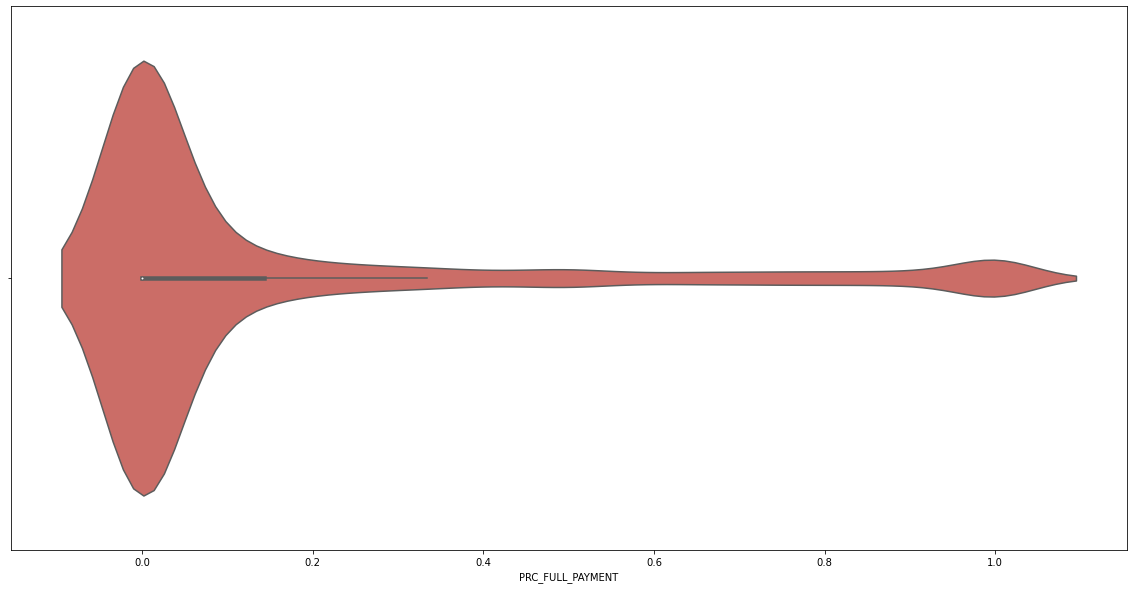

Violinplot for: TENURE


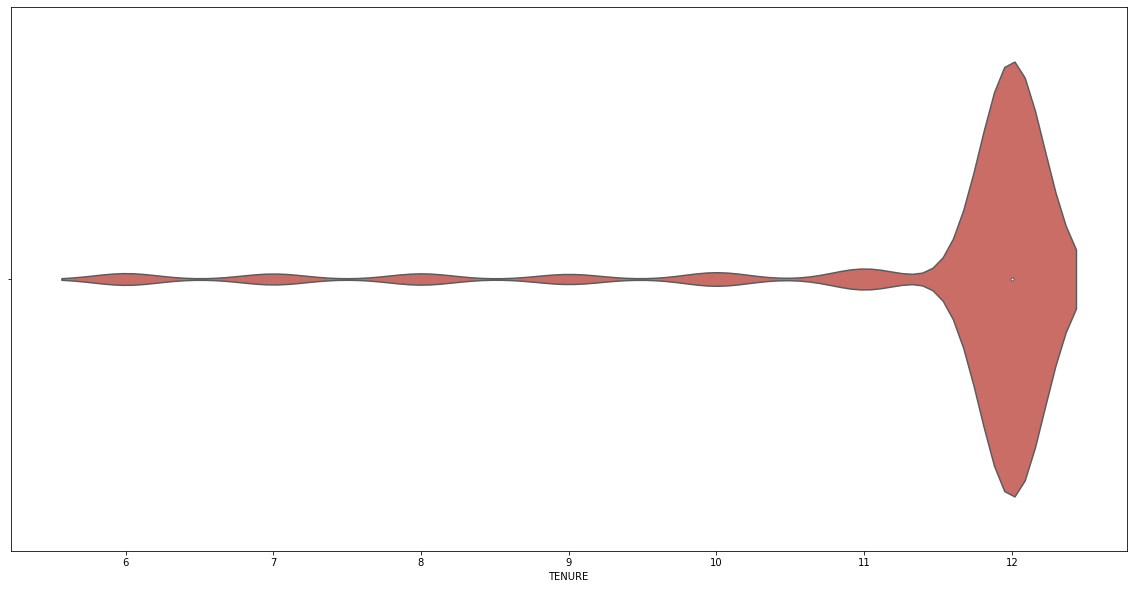

In [40]:
for i in df.columns:
    plt.figure(figsize=(20, 10))
    print('Violinplot for:', i)
    sns.violinplot(df[i], palette = 'hls')
    plt.show()

Boxenplot for: BALANCE


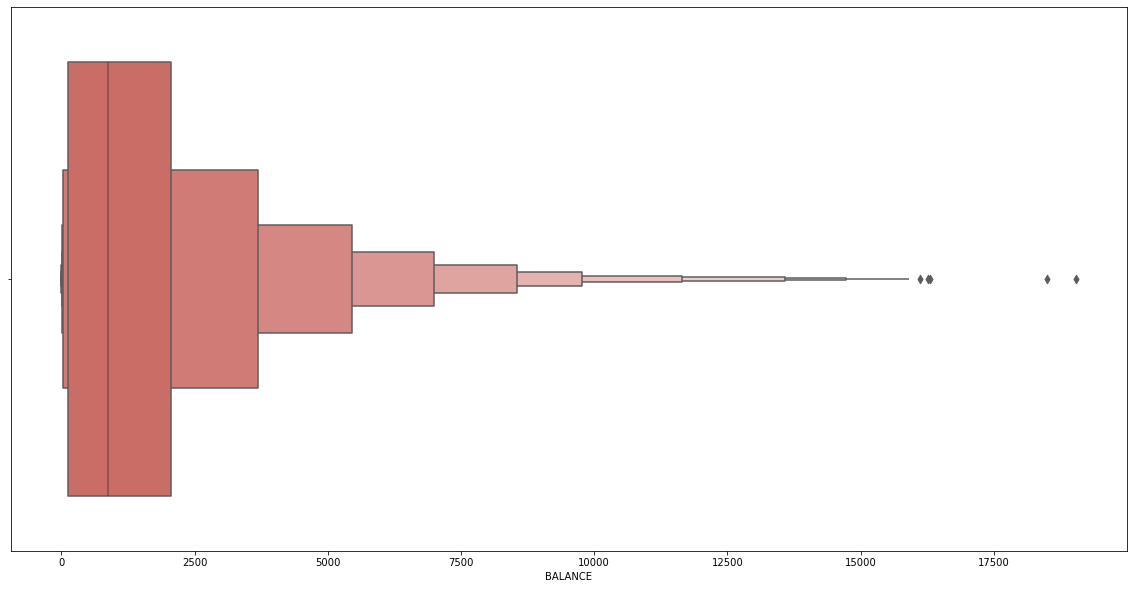

Boxenplot for: BALANCE_FREQUENCY


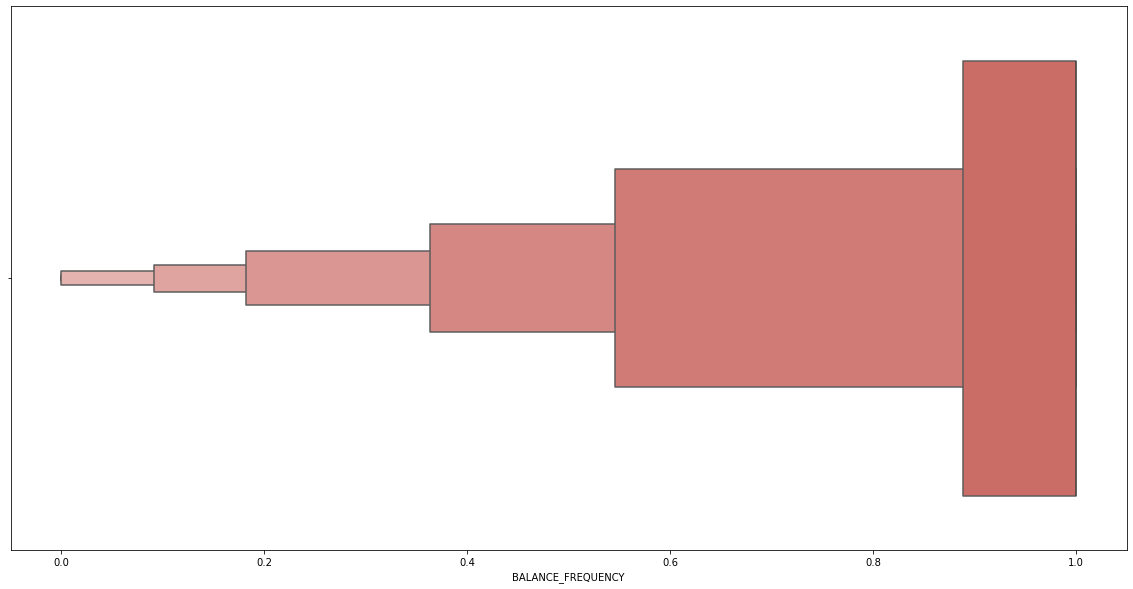

Boxenplot for: PURCHASES


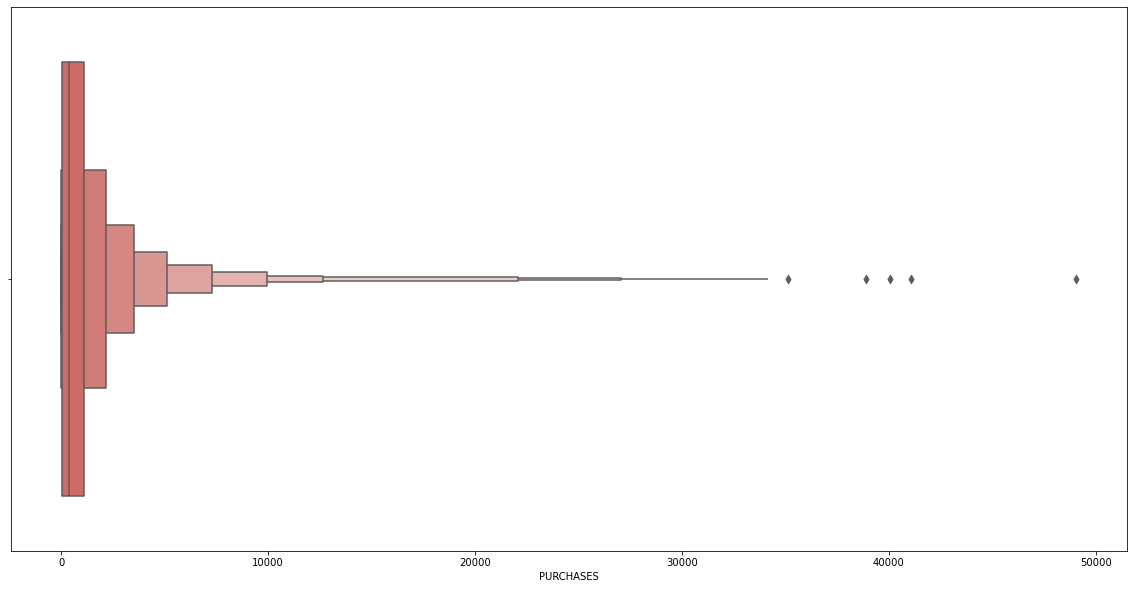

Boxenplot for: ONEOFF_PURCHASES


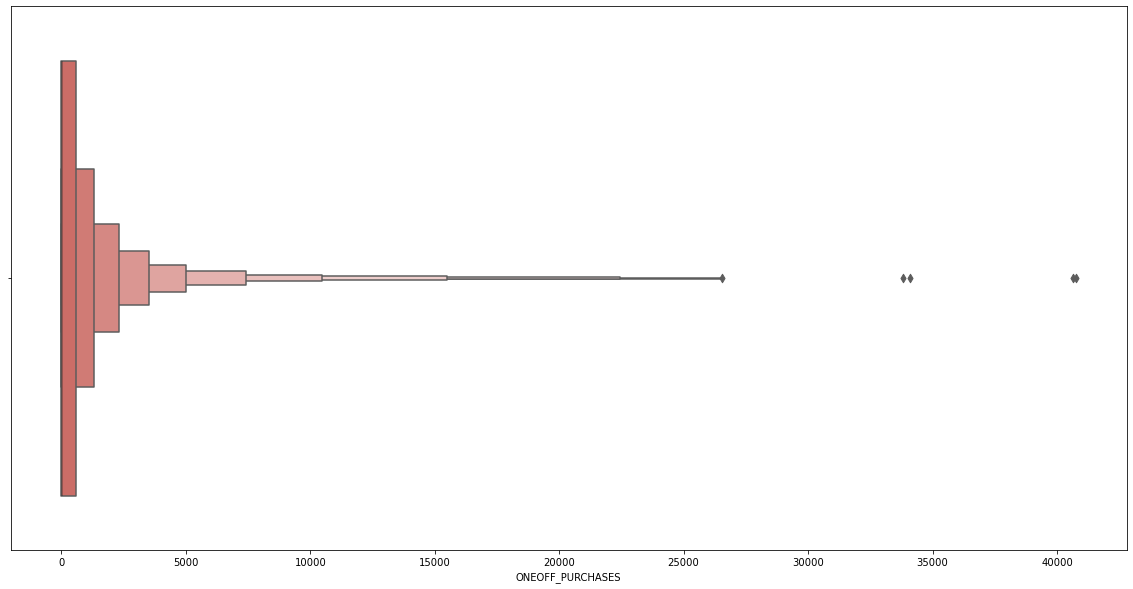

Boxenplot for: INSTALLMENTS_PURCHASES


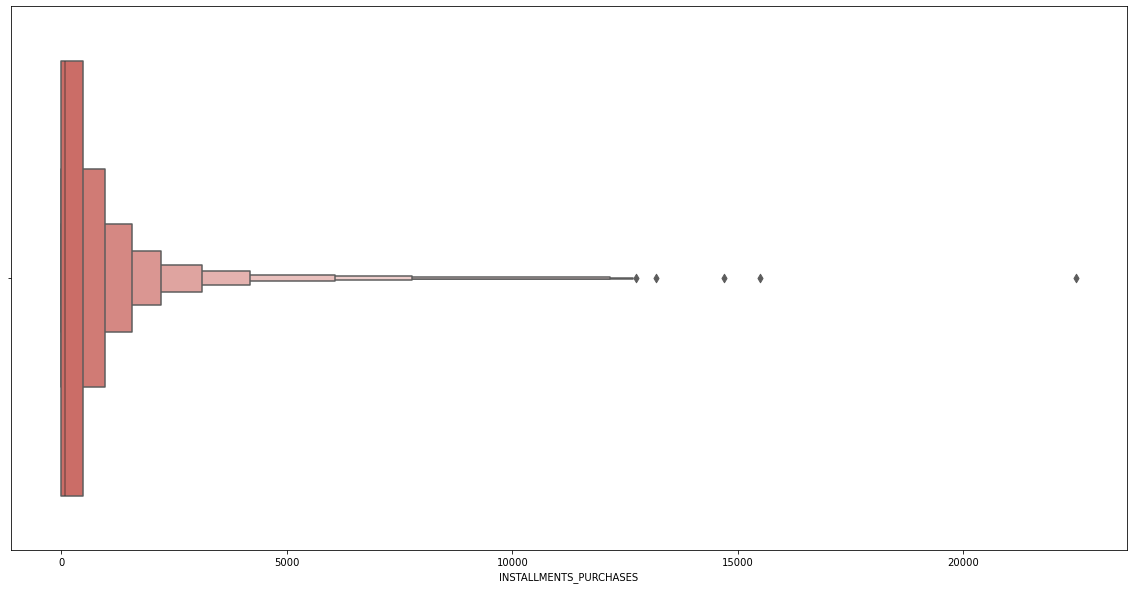

Boxenplot for: CASH_ADVANCE


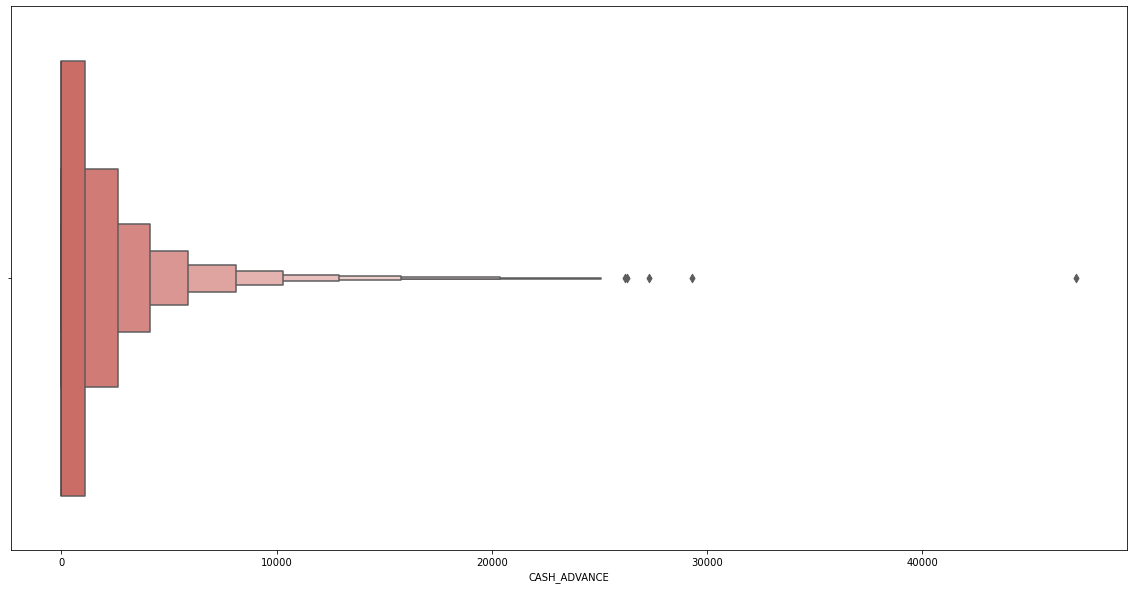

Boxenplot for: PURCHASES_FREQUENCY


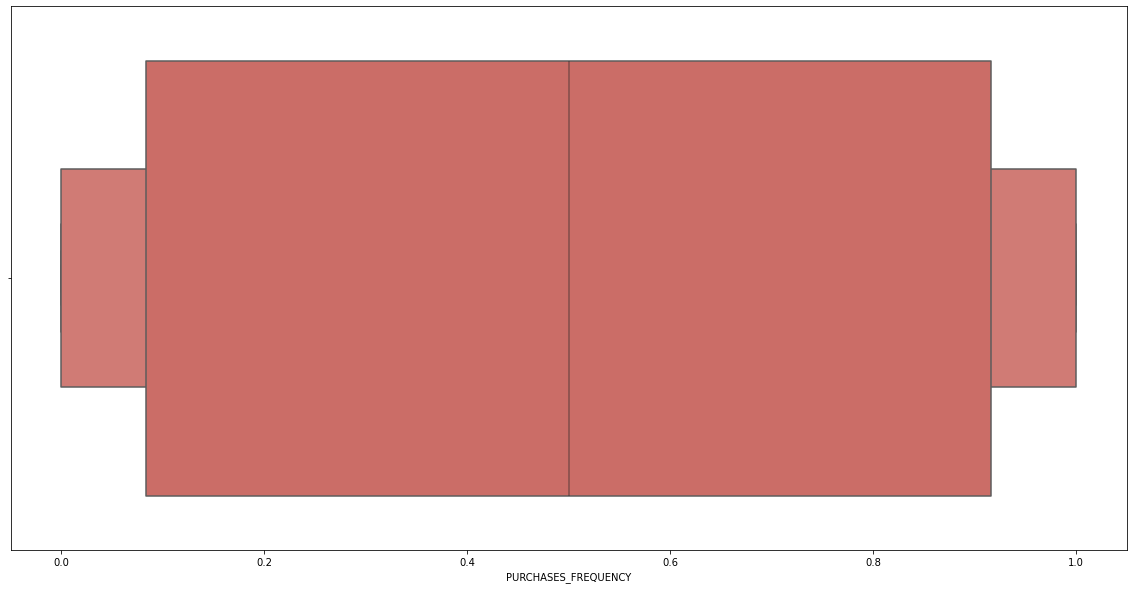

Boxenplot for: ONEOFF_PURCHASES_FREQUENCY


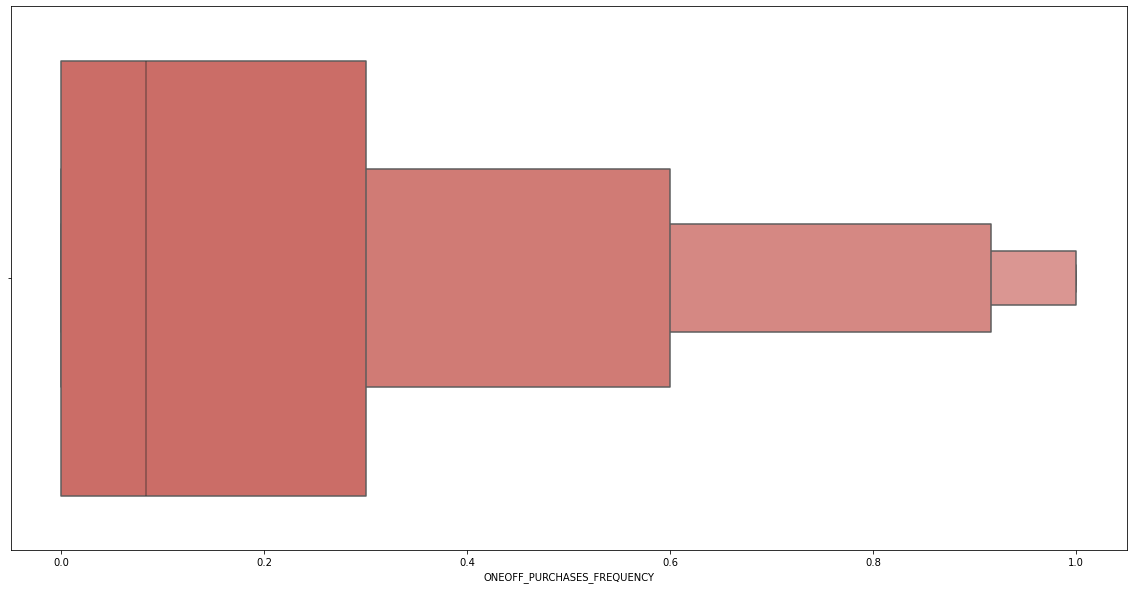

Boxenplot for: PURCHASES_INSTALLMENTS_FREQUENCY


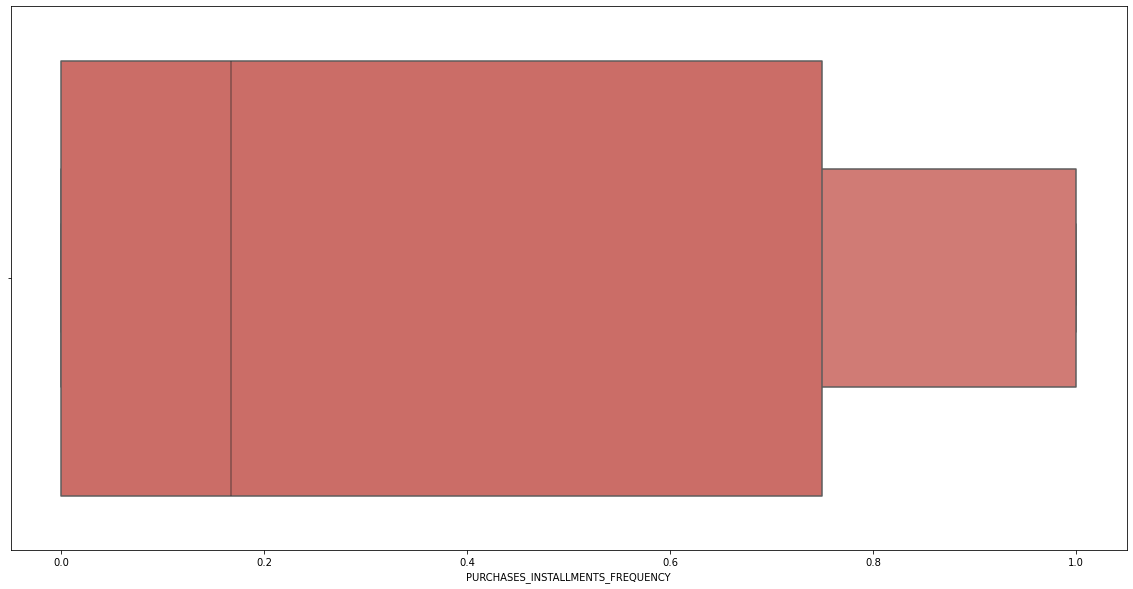

Boxenplot for: CASH_ADVANCE_FREQUENCY


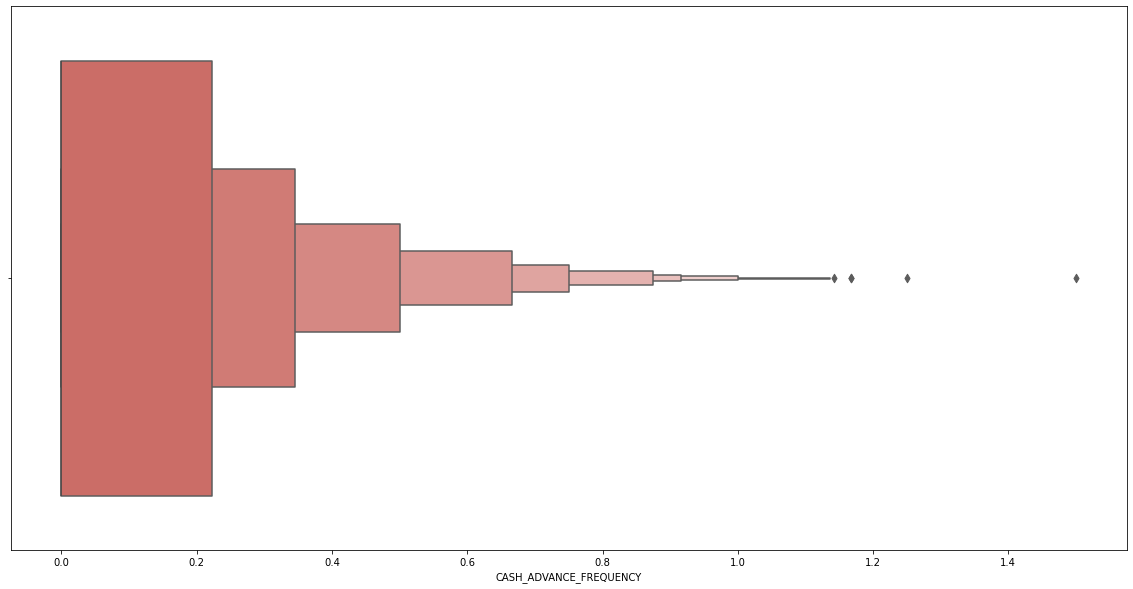

Boxenplot for: CASH_ADVANCE_TRX


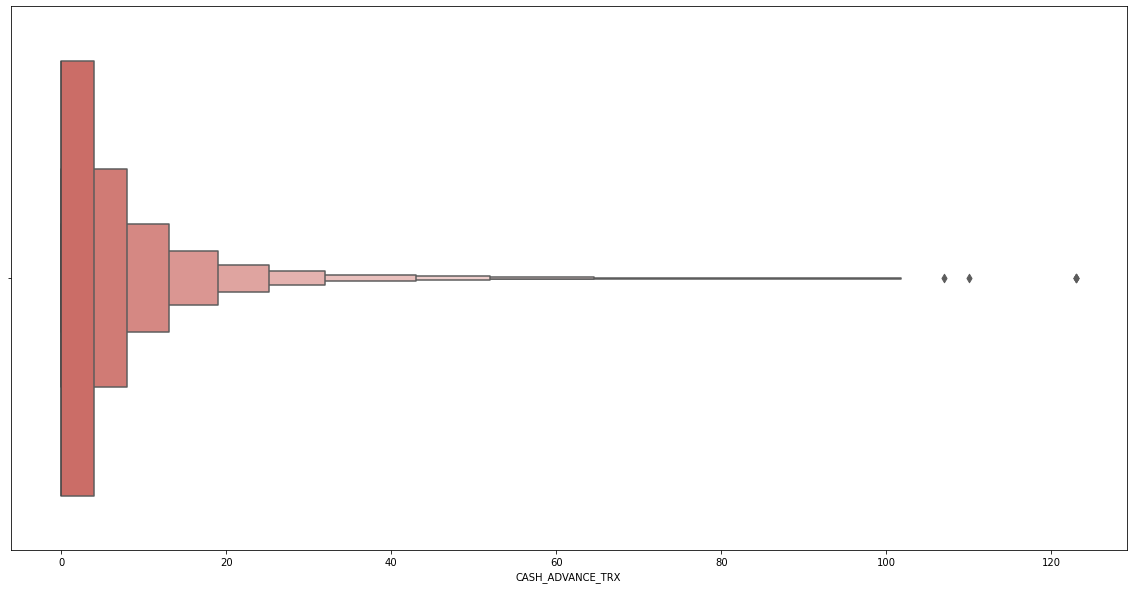

Boxenplot for: PURCHASES_TRX


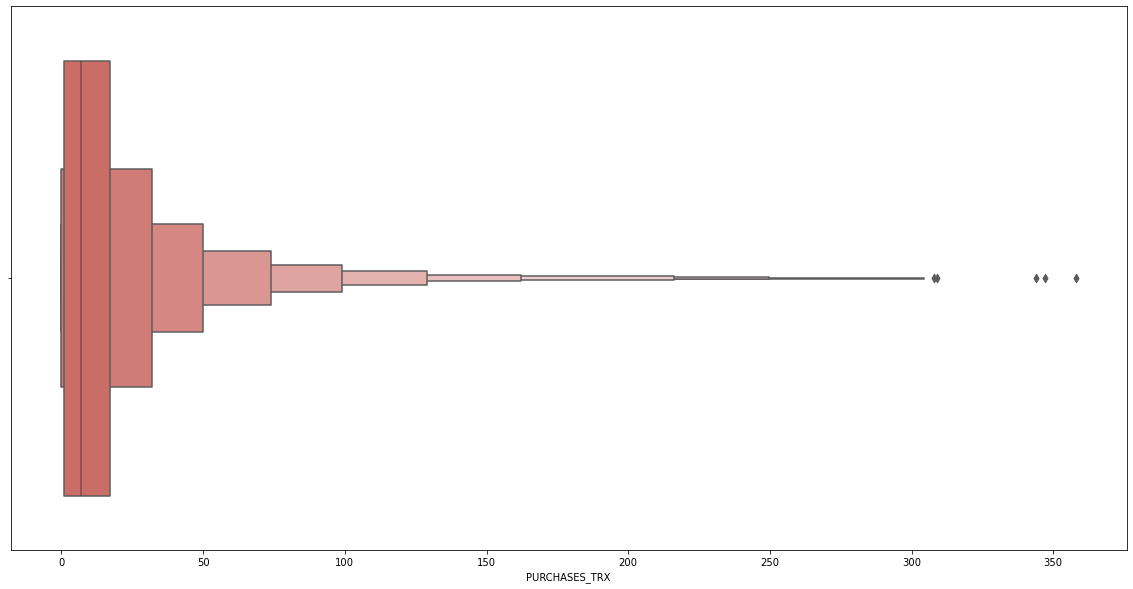

Boxenplot for: CREDIT_LIMIT


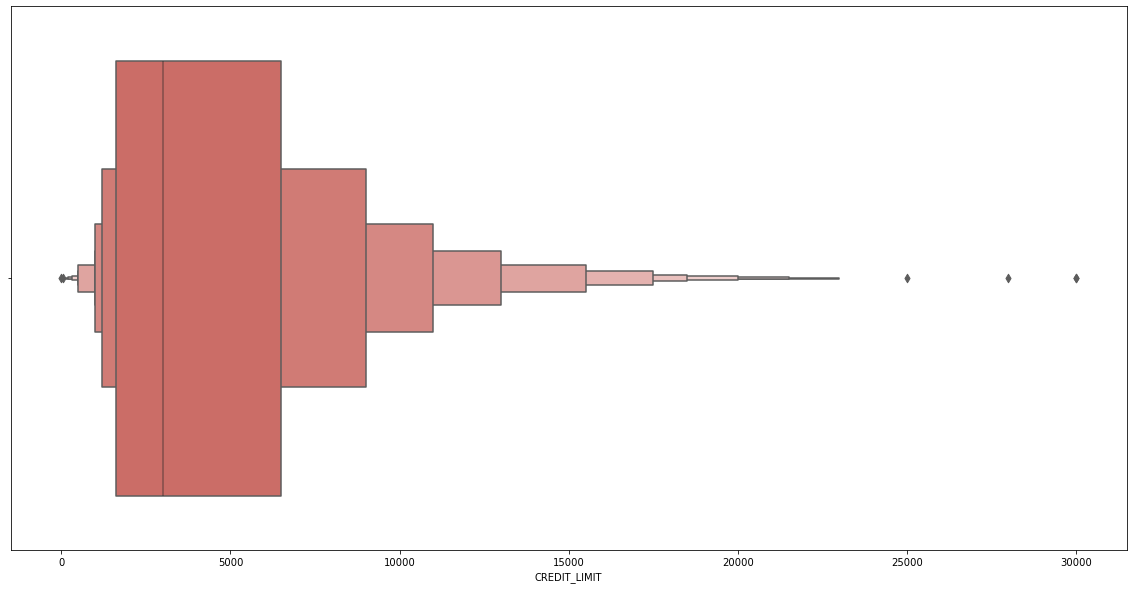

Boxenplot for: PAYMENTS


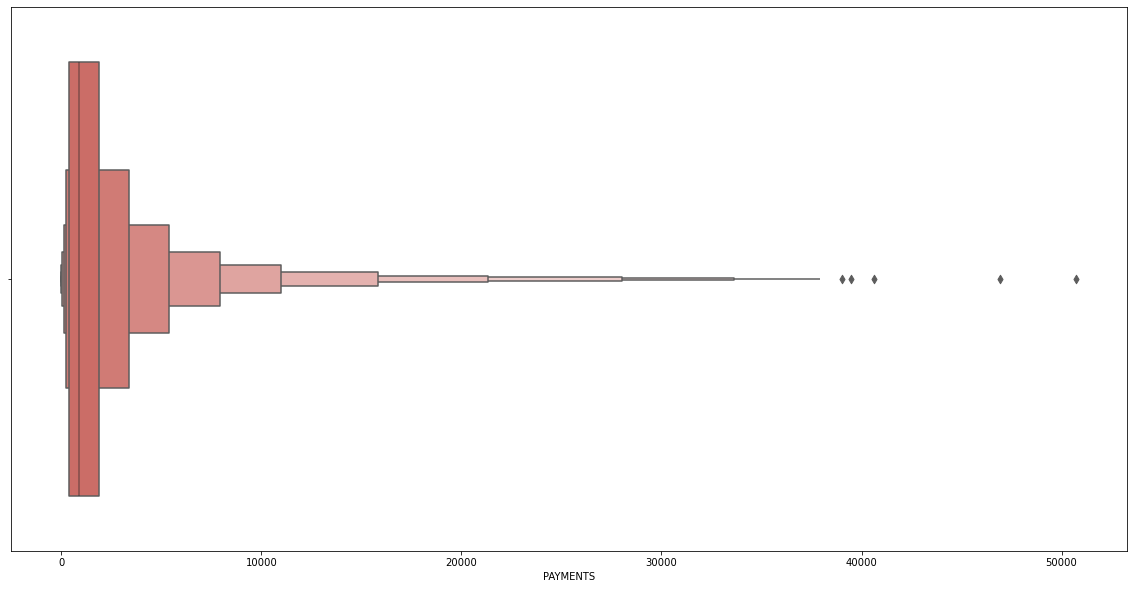

Boxenplot for: MINIMUM_PAYMENTS


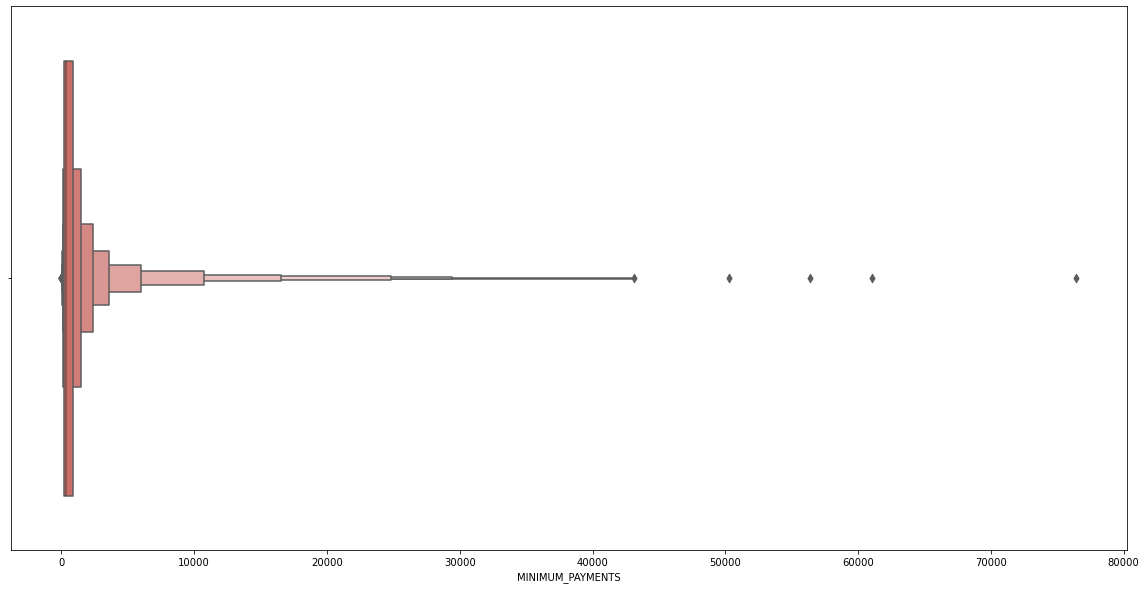

Boxenplot for: PRC_FULL_PAYMENT


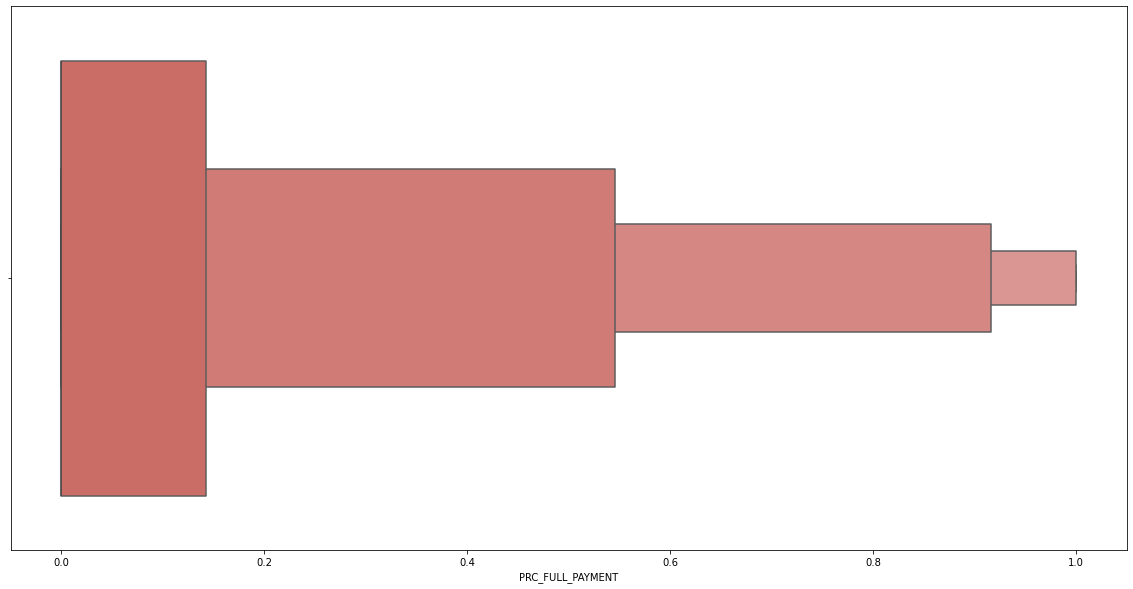

Boxenplot for: TENURE


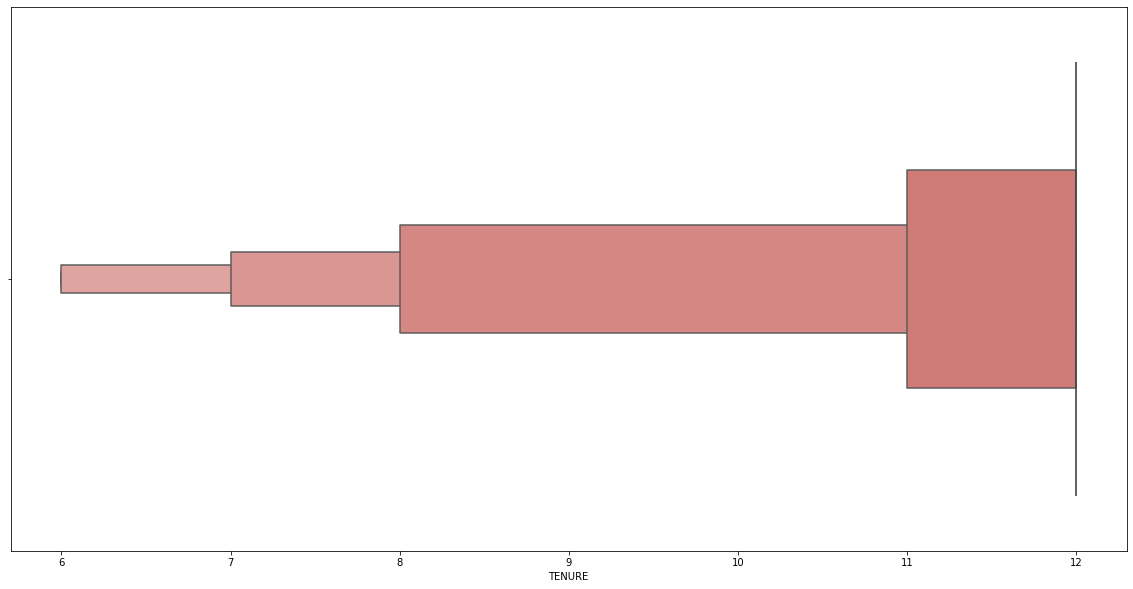

In [41]:
for i in df.columns:
    plt.figure(figsize=(20, 10))
    print('Boxenplot for:', i)
    sns.boxenplot(df[i], palette = 'hls')
    plt.show()

In [42]:
df_new = df.copy()

# 4.Trying to remove the outliers

In [43]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BALANCE                             1925.858120
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.495000
ONEOFF_PURCHASES                     577.405000
INSTALLMENTS_PURCHASES               468.637500
CASH_ADVANCE                        1113.821139
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.858151
MINIMUM_PAYMENTS                     693.348888
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


In [44]:
df_new = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
df_new.shape

(3008, 17)

# Checking Correlation

In [46]:
df_corr = df.corr()

<AxesSubplot:>

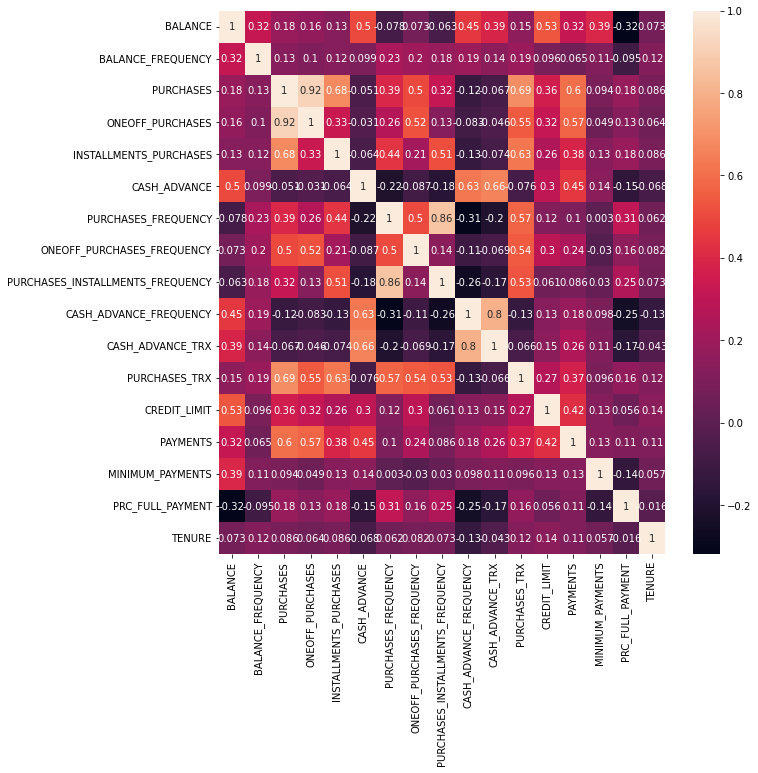

In [47]:
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_corr, annot = True)

# 5.Data Preprocessing

In [48]:
#to view some basic statistical details of train data
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4493.947389   
std                  0.200121          6.824647      24.857649   3638.922405   
min                  0.000000          0.000000       0.000000      1.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [49]:
# checking the number of rows and columns in train dataset
rows,col=df.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 8950 
Columns: 17


In [50]:
#getting some information about the datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [51]:
## printing total numbers of Unique value in the dataframe. 
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [52]:
# Find the total number of missing values in the dataframe
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [53]:
missing_count=df.isnull().sum() #the count of missing values
value_count= df.isnull().count()#the count of all values
missing_percentage= round(missing_count/value_count*100,2)#the percentage of missing values
missing_df= pd.DataFrame({'count': missing_count,'percentage':missing_percentage })#create a dataframe
print(missing_df)

                                  count  percentage
BALANCE                               0         0.0
BALANCE_FREQUENCY                     0         0.0
PURCHASES                             0         0.0
ONEOFF_PURCHASES                      0         0.0
INSTALLMENTS_PURCHASES                0         0.0
CASH_ADVANCE                          0         0.0
PURCHASES_FREQUENCY                   0         0.0
ONEOFF_PURCHASES_FREQUENCY            0         0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0         0.0
CASH_ADVANCE_FREQUENCY                0         0.0
CASH_ADVANCE_TRX                      0         0.0
PURCHASES_TRX                         0         0.0
CREDIT_LIMIT                          0         0.0
PAYMENTS                              0         0.0
MINIMUM_PAYMENTS                      0         0.0
PRC_FULL_PAYMENT                      0         0.0
TENURE                                0         0.0


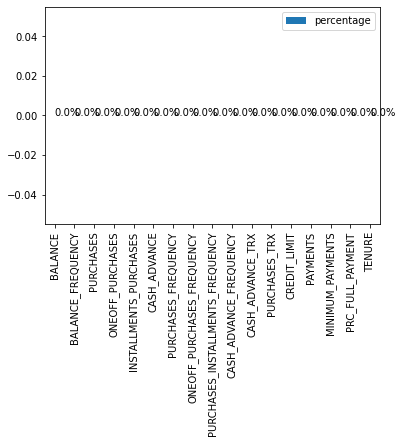

In [54]:
barchart=missing_df.plot.bar(y= 'percentage')
for index, percentage in enumerate(missing_percentage):
    barchart.text(index,percentage, str(percentage)+"%")

In [55]:
# checking the value which is Null for Credit Limit
df[df['CREDIT_LIMIT'].isnull()]

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [56]:
# dropping off the missing value for Credit Limit

df = df.drop(5203)
# resetting the index after dropping the record:
df = df.reset_index(drop=True)

In [57]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

Empty DataFrame
Columns: [PAYMENTS, MINIMUM_PAYMENTS]
Index: []

In [58]:
# Looking at PAYMENTS that's above MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] > df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] > df['MINIMUM_PAYMENTS'])].head()

Shape: (6285, 2)


PAYMENTS  MINIMUM_PAYMENTS
0   201.802084        139.509787
1  4103.032597       1072.340217
4   678.334763        244.791237
6  6354.314328        198.065894
7   679.065082        532.033990

In [59]:
# Looking at PAYMENTS that's below MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].head()

Shape: (2664, 2)


PAYMENTS  MINIMUM_PAYMENTS
2    622.066742        627.284787
3      0.000000        864.206542
5   1400.057770       2407.246035
10  1083.301007       2172.697765
14   805.647974        989.962866

Logically, payments should be done if PAYMENTS above MINIMUM_PAYMENTS. Which is true for 6272 customers.
But on the other hand, we got 2364 customers who did the PAYMENTS below MINIMUM_PAYMENTS which lead to invalid values. But we would like to leave it that way.
Hence, we fill the missing values by the mean of PAYMENTS
if PAYMENTS is less than MINIMUM_PAYMENTS, the missing values will be filled by the correspond PAYMENTS

In [60]:
minpay = df['MINIMUM_PAYMENTS'].copy() # make a copy of MINIMUM_PAYMENTS
payments_mean = np.mean(df['PAYMENTS']) # take the mean value of PAYMENTS

i = 0
for payments, minpayments in zip(df['PAYMENTS'], df['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):
        minpay[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True): 
        minpay[i] = payments
    elif minpayments == True: 

        minpay[i] = payments_mean
    i += 1
    
df['MINIMUM_PAYMENTS'] = minpay.copy()


In [61]:
# Now again check the missing values.

df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [62]:
#lets see if we have any duplicated entries and the result shows that all entries are unique
df.duplicated().sum()

0

***Monthly_avg_purchase***

In [63]:
df['Monthly_avg_purchase']=df['PURCHASES']/df['TENURE']

In [64]:
print(df['Monthly_avg_purchase'].head(),'\n ',
df['TENURE'].head(),'\n', df['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


**Monthly_cash_advance Amount**

In [65]:
df['Monthly_cash_advance']=df['CASH_ADVANCE']/df['TENURE']

In [66]:
df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4301

# 6.Data Modeling

### 1.Standardrizing data

In [67]:
from sklearn.preprocessing import  StandardScaler

In [68]:
scaler= StandardScaler()
scaled_features=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.732054          -0.249881  -0.424934         -0.356957   
1     0.786858           0.134049  -0.469584         -0.356957   
2     0.447041           0.517980  -0.107716          0.108843   
3     0.049015          -1.017743   0.231995          0.546123   
4    -0.358849           0.517980  -0.462095         -0.347317   
...        ...                ...        ...               ...   
8944 -0.738015           0.517980  -0.333331         -0.356957   
8945 -0.742488           0.517980  -0.329174         -0.356957   
8946 -0.740463          -0.185895  -0.402000         -0.356957   
8947 -0.745239          -0.185895  -0.469584         -0.356957   
8948 -0.572644          -0.889766   0.042092          0.301677   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349114     -0.466805            -0.806649   
1                  -0.454607      2.605438            -1.221928   
2                  -0.454607     -0.466805             1.269742   
3                  -0.454607     -0.368678            -1.014290   
4                  -0.454607     -0.466805            -1.014290   
...                      ...           ...                  ...   
8944               -0.132688     -0.466805             1.269742   
8945               -0.122869     -0.466805             1.269742   
8946               -0.294930     -0.466805             0.854463   
8947               -0.454607     -0.449373            -1.221928   
8948               -0.454607     -0.406228             0.439186   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678716                         -0.707409   
1                      -0.678716                         -0.917090   
2                       2.673295                         -0.917090   
3                      -0.399383                         -0.917090   
4                      -0.399383                         -0.917090   
...                          ...                               ...   
8944                   -0.678716                          1.179720   
8945                   -0.678716                          1.179720   
8946                   -0.678716                          0.760359   
8947                   -0.678716                         -0.917090   
8948                    1.555959                         -0.917090   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675294         -0.476083      -0.511381     -0.960380   
1                   0.573949          0.110032      -0.591841      0.688601   
2                  -0.675294         -0.476083      -0.109082      0.826016   
3                  -0.258882         -0.329554      -0.551611      0.826016   
4                  -0.675294         -0.476083      -0.551611     -0.905414   
...                      ...               ...            ...           ...   
8944               -0.675294         -0.476083      -0.350461     -0.960380   
8945               -0.675294         -0.476083      -0.350461     -0.960380   
8946               -0.675294         -0.476083      -0.390691     -0.960380   
8947                0.157536         -0.183026      -0.591841     -1.097795   
8948                0.990362         -0.183026       0.333446     -0.905414   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
0    -0.529026         -0.310993         -0.525588  0.360541   
1     0.818546          0.089265          0.234159  0.360541   
2    -0.383857         -0.101699         -0.525588  0.360541   
3    -0.598733         -0.000041         -0.525588  0.360541   
4    -0.364421         -0.265819         -0.525588  0.360541   
...        ...               ...               ...       ...   
8944 -0.486266         -0.349878          1.183844 -4.126919   
8945 -0.503445         -0.000041         -0.525588 -4.126919   
8946 -0.570660         -0.335490          0

## 2. Determining The Optimal Number Of Clusters
Selecting optimal number of clusters is key to applying clustering algorithm to the dataset, such as k-means clustering, which requires the user to specify the number of clusters k to be generated. This is a somewhat arbitrary procedure, one of the weakest aspects of performing cluster analysis.

The major difference between elbow and silhouette method is that elbow only calculates the euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc.

Both the Elbow method / SSE Plot and the Silhouette method can be used interchangeably based on the details presented by the plots.

## 2.1 Elbow Method
Elbow method is a very popular method to calculate optimal number of clusters for a given problem. Within clusters the sum of square distance is calculated and plotted against the number of clusters. The elbow point in plot is selected as optimal number of clusters for given problem.

In [69]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [70]:
cluster_range = range( 1, 21 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **kmeans_set) #** open dictionry
    kmeans.fit(scaled_features)
    cluster_errors.append( kmeans.inertia_) 

In [71]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

#clusters_df[0:21]
clusters_df.head(10)

num_clusters  cluster_errors
0             1   170031.000000
1             2   143659.484366
2             3   122574.621952
3             4   108020.776101
4             5    99366.569964
5             6    92541.665068
6             7    86407.660892
7             8    81346.531036
8             9    76705.343948
9            10    72155.450694

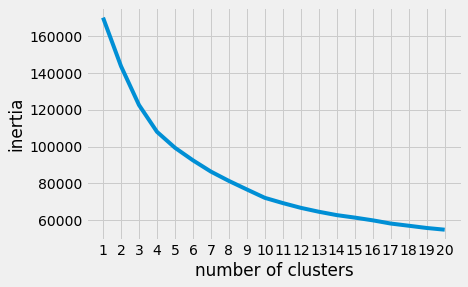

In [72]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,21),cluster_errors)
plt.xticks(range(1,21))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

# 2.2 Silhouette Coefficient Method:
Average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.

The silhouette score falls within the range [-1, 1].

The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

elbow method: k=5 , k=10
 ,
 silhouette coefficiennt: k=3

In [73]:
#let's try silhouette_score for k=5,10,3

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.190


In [74]:
# Instantiate the KMeans for 10 clusters
km = KMeans(n_clusters=10, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.219


In [75]:
# Instantiate the KMeans for 3 clusters
km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.290


In [76]:
# Instantiate the KMeans for 2 clusters
km = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.205


**the best silhouette_score k=3**

In [77]:
silhouette_coefficients =[]
for k in range(2,21):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score= silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [78]:
silhouette_coefficients

[0.2045405804718122,
 0.2902145909321705,
 0.20418675096698016,
 0.19025795270177104,
 0.20060423479726042,
 0.20692448633536176,
 0.21778736142150595,
 0.22238421205356243,
 0.2197672493066578,
 0.21441009730664576,
 0.21649369368743246,
 0.21338745827263048,
 0.20171129930504528,
 0.21177877033055767,
 0.19980740452099235,
 0.21419401587225387,
 0.169884385839403,
 0.2087148923482132,
 0.19771047934416824]

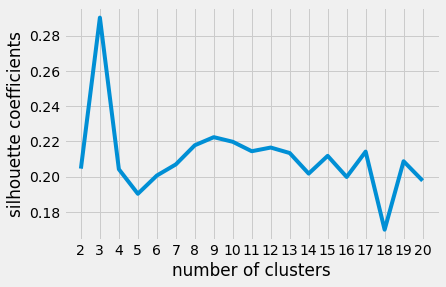

In [79]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,21),silhouette_coefficients)
plt.xticks(range(2,21))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()

In [80]:
def evaluate_metrics(df1, min_clust=2, max_clust=10, rand_state=42):
    inertias = []
    silhouette = []
    ch_score = []
    db_score = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(scaled_features)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(scaled_features, y_label))
        ch_score.append(calinski_harabasz_score(scaled_features, y_label))
        db_score.append(davies_bouldin_score(scaled_features, y_label))        

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
    ax[0][0].set_xlabel('No. of clusters')
    ax[0][0].set_ylabel('Inertia')
    
    ax[0][1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
    ax[0][1].set_xlabel('No. of clusters')
    ax[0][1].set_ylabel('Silhouette Score')
    
    ax[1][0].plot(range(min_clust, max_clust), ch_score, '-x', linewidth=2)
    ax[1][0].set_xlabel('No. of clusters')
    ax[1][0].set_ylabel('Calinski Harabasz Score')
    
    ax[1][1].plot(range(min_clust, max_clust), db_score, '-x', linewidth=2)
    ax[1][1].set_xlabel('No. of clusters')
    ax[1][1].set_ylabel('Davies Bouldin Score')
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

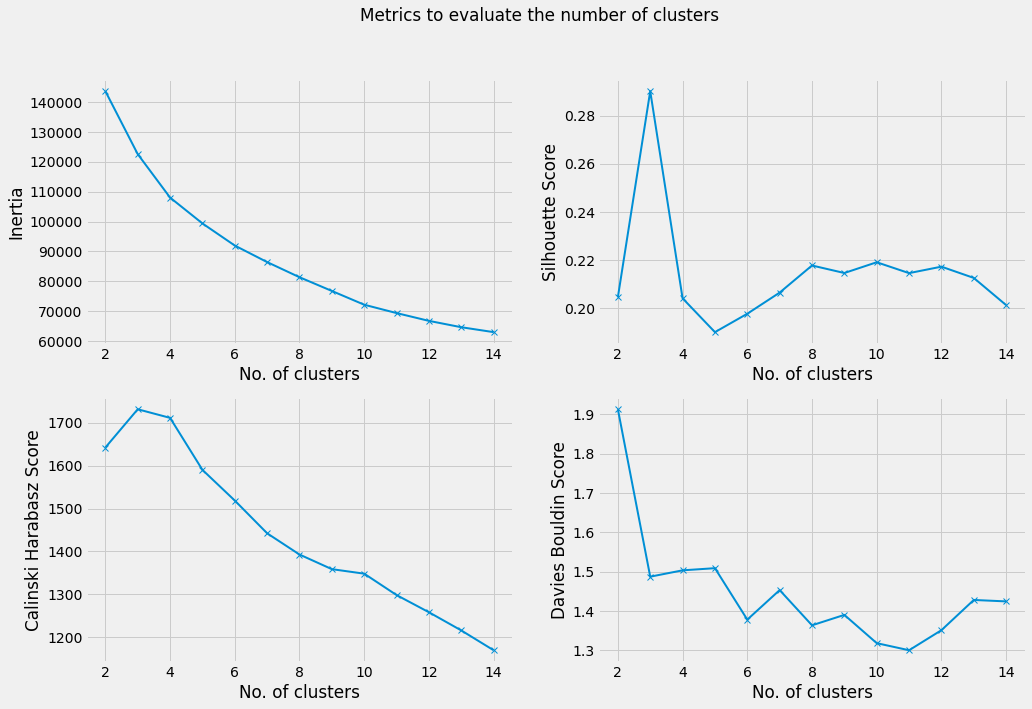

In [81]:
evaluate_metrics(scaled_features, min_clust=2, max_clust=15, rand_state=42)

So based on the plots above we conclude that 3 clusters are the best for k-mean modeling

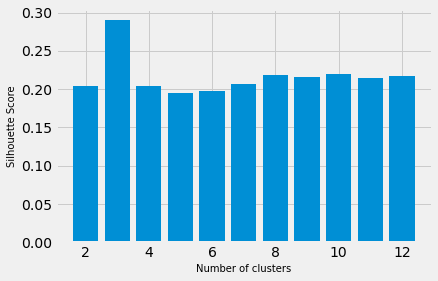

In [82]:
silhouette_scores = []

for n_cluster in range(2, 13):
    silhouette_scores.append( 
        silhouette_score(scaled_features, KMeans(n_clusters = n_cluster).fit_predict(scaled_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()
#confirming number of clusters

Note : Highest silhouette score is k = 3.

## 2.3 Dendograms
This technique is specific to the agglomerative hierarchical method of clustering. The method starts by considering each point as a separate cluster and starts joining points to clusters in a hierarchical fashion based on their distances. To get the optimal number of clusters for hierarchical clustering, we make use a dendrogram which is tree-like chart that shows the sequences of merges or splits of clusters.

In [83]:
from scipy.cluster.hierarchy import ward,dendrogram,linkage

In [84]:
distance = linkage(scaled_features,'ward')

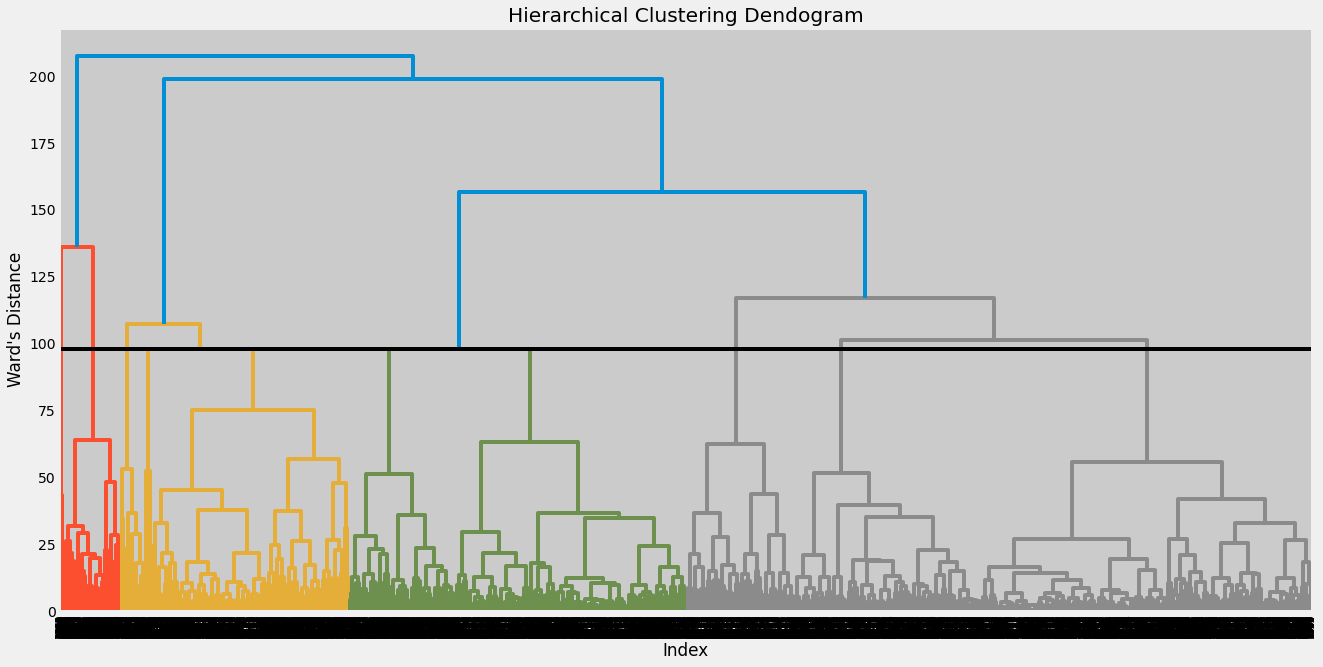

In [85]:
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Index")
plt.ylabel("Ward's Distance")
dendrogram(distance, leaf_rotation=90, leaf_font_size=9);
plt.axhline(98, c='k')

## 3 K-Means Clustering

### 3-1 determining the number of clusters

### 3-1-1- determining the number of clusters by Hierarchical Clustering

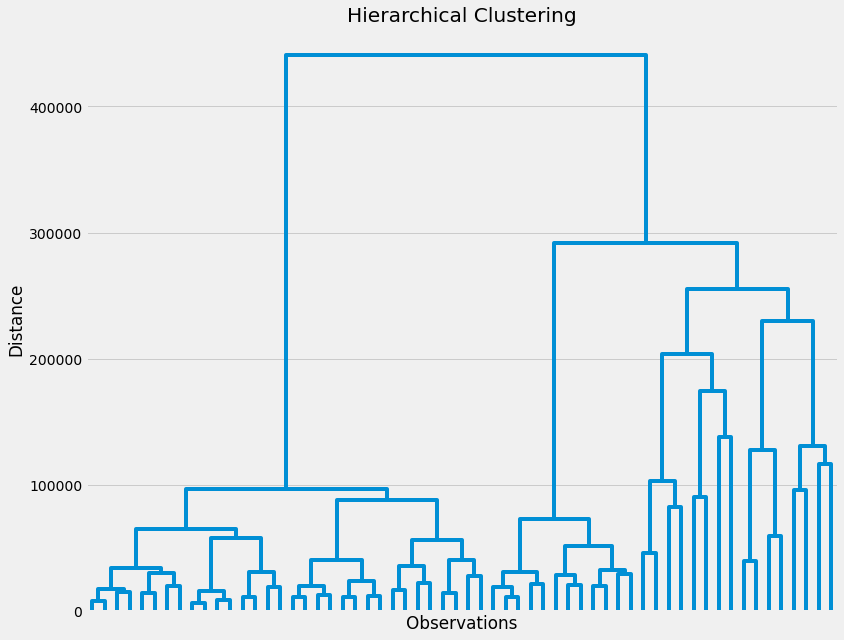

In [86]:
HClustering= linkage(df,method='ward')
plt.figure (figsize=(12,10))
plt.title ('Hierarchical Clustering')
plt.xlabel ('Observations')
plt.ylabel ('Distance')
dendrogram (HClustering, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True, color_threshold=0)
plt.show()

By looking at the dendrogram diagram in general, we can have a general view about the number of suitable clusters. According to the obtained result, the number of 5 clusters can be considered reasonable.

### 3-1-2- determining the number of clusters by Elbow method

We run the algorithm for 10 different times with 10 different number of clusters. We calculate the Within Cluster Sum of Squares (WCSS) for each of the clustering solutions.

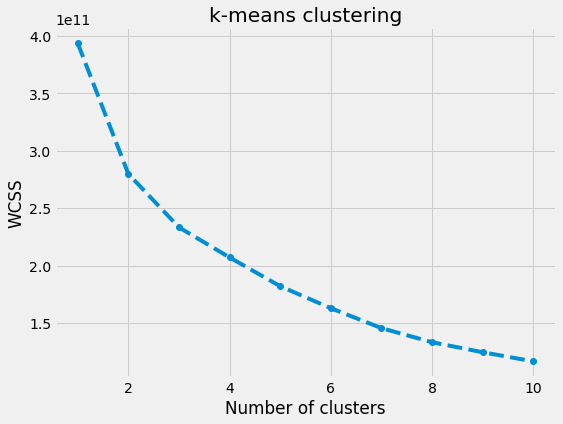

In [87]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans (n_clusters=i, init='k-means++',random_state=123)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot (range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel ('Number of clusters')
plt.ylabel ('WCSS')
plt.title('k-means clustering')
plt.show()

Here, the use of 5 clusters can be reasonable, and since we want to map the number of five clusters introduced in the McKinsey study, we set the number of clusters to 5.

## 3-2- Running the model and the results

In [88]:
kmeans=KMeans (n_clusters=5, init='k-means++', random_state=123)
kmeans.fit (df)

KMeans(n_clusters=5, random_state=123)

In [89]:
#Results
df_kmeans=df.copy()
df_kmeans['K-means segment']=kmeans.labels_

In [90]:
df_results=df_kmeans.groupby(['K-means segment']).mean()
df_results

BALANCE  BALANCE_FREQUENCY     PURCHASES  \
K-means segment                                                 
0                 805.691433           0.851264    530.638584   
1                2081.666222           0.912801   1364.096961   
2                4058.147688           0.988636   1027.378750   
3                5781.109597           0.952144   2724.983575   
4                5405.330935           0.957955  27276.363750   

                 ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
K-means segment                                                           
0                      263.407333              267.519215    490.382043   
1                      849.494643              514.980261   1088.289201   
2                      118.389464              908.989286    922.757849   
3                     1699.975562             1025.145069   4789.598835   
4                    21877.102917             5399.260833   1550.378389   

                 PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
K-means segment                                                    
0                           0.454939                    0.135559   
1                           0.556190                    0.316607   
2                           0.471320                    0.039232   
3                           0.525921                    0.325517   
4                           0.909028                    0.842361   

                 PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
K-means segment                                                             
0                                        0.348353                0.109230   
1                                        0.384731                0.143361   
2                                        0.441153                0.105655   
3                                        0.405257                0.333886   
4                                        0.720833                0.059028   

                 CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
K-means segment                                                                
0                        2.289199       9.769489   2293.713492    930.021925   
1                        3.452985      19.685135   7514.547937   1944.690986   
2                        3.017857      18.625000   4267.857143   1624.939144   
3                       10.858243      33.620955  11341.301303   6941.509382   
4                        2.500000     127.958333  16083.333333  27925.634496   

                 MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  \
K-means segment                                                  
0                      531.413385          0.149027  11.389606   
1                      775.858503          0.173933  11.735076   
2                    22760.031552          0.001488  11.910714   
3                     2137.043761          0.114880  11.730354   
4                     3266.671038          0.511206  11.916667   

                 Monthly_avg_purchase  Monthly_cash_advance  
K-means segment                                              
0                           46.805122             46.331564  
1                          115.830091             98.525783  
2                           86.302568             79.237883  
3                          230.801215            422.441439  
4                         2291.490271            129.198199

I have named the clusters based on the McKinsey study as follows:
Cluster 0: Customers with relatively moderate balance and high purchases and purchase transactions: **"SelfAwareAvoiders"**

Cluster 1: Customers with low balance and the lowest purchases: **"RecoveringCreditUsers"**

Cluster 2: Customers with the lowest Balance, Oneoff purchases and Cash_advance, and with relatively high purchase frequency: **"FinanciallyStressed"**

Cluster 3: Customers with highest balance and Cash_advance and low amount of purchases : **"DealChasers"**

Cluster 4: Customers with high balance, the highest purchases (mostly one-off purchases) and purchase transactions and credit limit: **"ProsperousAndConsent"**

In [91]:
#Number of Observations in each cluster
df_results ['NObservations']= df_kmeans[['K-means segment','PURCHASES']].groupby (['K-means segment']).count()

#proportion of observations
df_results ['PropObservations']=df_results ['NObservations']/df_results ['NObservations'].sum()
df_results=df_results.rename ({0: 'SelfAwareAvoiders', 1: 'RecoveringCreditUsers', 2: 'FinanciallyStressed'\
                                           , 3: 'DealChasers', 4:'ProsperousAndConsent'})
df_results

BALANCE  BALANCE_FREQUENCY     PURCHASES  \
K-means segment                                                       
SelfAwareAvoiders       805.691433           0.851264    530.638584   
RecoveringCreditUsers  2081.666222           0.912801   1364.096961   
FinanciallyStressed    4058.147688           0.988636   1027.378750   
DealChasers            5781.109597           0.952144   2724.983575   
ProsperousAndConsent   5405.330935           0.957955  27276.363750   

                       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
K-means segment                                                                 
SelfAwareAvoiders            263.407333              267.519215    490.382043   
RecoveringCreditUsers        849.494643              514.980261   1088.289201   
FinanciallyStressed          118.389464              908.989286    922.757849   
DealChasers                 1699.975562             1025.145069   4789.598835   
ProsperousAndConsent       21877.102917             5399.260833   1550.378389   

                       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
K-means segment                                                          
SelfAwareAvoiders                 0.454939                    0.135559   
RecoveringCreditUsers             0.556190                    0.316607   
FinanciallyStressed               0.471320                    0.039232   
DealChasers                       0.525921                    0.325517   
ProsperousAndConsent              0.909028                    0.842361   

                       PURCHASES_INSTALLMENTS_FREQUENCY  \
K-means segment                                           
SelfAwareAvoiders                              0.348353   
RecoveringCreditUsers                          0.384731   
FinanciallyStressed                            0.441153   
DealChasers                                    0.405257   
ProsperousAndConsent                           0.720833   

                       CASH_ADVANCE_FREQUENCY  ...  PURCHASES_TRX  \
K-means segment                                ...                  
SelfAwareAvoiders                    0.109230  ...       9.769489   
RecoveringCreditUsers                0.143361  ...      19.685135   
FinanciallyStressed                  0.105655  ...      18.625000   
DealChasers                          0.333886  ...      33.620955   
ProsperousAndConsent                 0.059028  ...     127.958333   

                       CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  \
K-means segment                                                       
SelfAwareAvoiders       2293.713492    930.021925        531.413385   
RecoveringCreditUsers   7514.547937   1944.690986        775.858503   
FinanciallyStressed     4267.857143   1624.939144      22760.031552   
DealChasers            11341.301303   6941.509382       2137.043761   
ProsperousAndConsent   16083.333333  27925.634496       3266.671038   

                       PRC_FULL_PAYMENT     TENURE  Monthly_avg_purchase  \
K-means segment                                                            
SelfAwareAvoiders              0.149027  11.389606             46.805122   
RecoveringCreditUsers          0.173933  11.735076            115.830091   
FinanciallyStressed            0.001488  11.910714             86.302568   
DealChasers                    0.114880  11.730354            230.801215   
ProsperousAndConsent           0.511206  11.916667           2291.490271   

                       Monthly_cash_advance  NObservations  PropObservations  
K-means segment                                                               
SelfAwareAvoiders                 46.331564           5657          0.632138  
RecoveringCreditUsers             98.525783           2563          0.286401  
FinanciallyStressed               79.237883             56          0.006258  
DealChasers                      422.441439            649          0.072522  
ProsperousAndConsent             129.19

It can be seen that the two clusters **RecoveringCreditUsers and FinanciallyStressed** make up more than **70 percent** of all customers.

Now we want to use **PCA** to reduce the dimensions of the independent variables and calculate the K-means model based on PCA's components.

## 3- K-means Clustering based on PCA

In [92]:
pca=PCA()
pca.fit(df)

PCA()

PCA essentially creates as many as compnents as there are features in our data set. To select a subset of components, we use a line chart which shows **the cumulative explained variance** against the number of components chosen (Compnents in PCA are arranged in order of importance).

In [93]:
pca.explained_variance_ratio_

array([4.74987643e-01, 1.77885954e-01, 1.39738488e-01, 1.13790573e-01,
       4.81507599e-02, 2.73437338e-02, 1.80509133e-02, 3.85120014e-05,
       6.70618109e-06, 5.37934725e-06, 7.18607650e-07, 5.85293134e-07,
       2.47163002e-08, 4.15698584e-09, 1.47381782e-09, 1.42108575e-09,
       9.39081203e-10, 2.57784961e-10, 1.51394136e-10])

In [94]:
pca=PCA(n_components=6)
pca.fit(df)

PCA(n_components=6)

In [95]:
data_PCAComp=pd.DataFrame (data=pca.components_, columns =df.columns.values, \
                           index=['comonent1','comonent2', 'comonent3','comonent4','comonent5','comonent6'])
data_PCAComp

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
comonent1  0.291316           0.000008   0.292771          0.210907   
comonent2 -0.301313          -0.000004   0.501494          0.380719   
comonent3  0.272587           0.000010  -0.096896         -0.077223   
comonent4  0.059939           0.000009   0.291459          0.183756   
comonent5 -0.721284          -0.000045  -0.287178         -0.276965   
comonent6  0.475373           0.000015  -0.269832         -0.303112   

           INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
comonent1                0.081859      0.216314             0.000013   
comonent2                0.120815     -0.207888             0.000037   
comonent3               -0.019701      0.406901            -0.000031   
comonent4                0.107718     -0.554253             0.000044   
comonent5               -0.010141     -0.135416             0.000005   
comonent6                0.033365     -0.629342            -0.000014   

           ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
comonent1                    0.000023                          0.000008   
comonent2                    0.000029                          0.000030   
comonent3                   -0.000028                         -0.000018   
comonent4                    0.000024                          0.000037   
comonent5                   -0.000021                          0.000010   
comonent6                   -0.000031                          0.000007   

           CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
comonent1                0.000010          0.000405       0.002341   
comonent2               -0.000020         -0.000511       0.003526   
comonent3                0.000029          0.001009      -0.000992   
comonent4               -0.000032         -0.001142       0.003045   
comonent5               -0.000034         -0.000706      -0.002252   
comonent6               -0.000021         -0.001089      -0.000965   

           CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
comonent1      0.689497  0.487385          0.132428      2.309374e-06   
comonent2     -0.445431  0.466753         -0.191140      2.576390e-05   
comonent3     -0.509827  0.301528          0.626240     -2.758603e-05   
comonent4      0.084182 -0.357269          0.648918      3.925362e-08   
comonent5      0.230938  0.369776          0.333515      5.617807e-05   
comonent6     -0.073400  0.427938         -0.138639     -2.647311e-05   

             TENURE  Monthly_avg_purchase  Monthly_cash_advance  
comonent1  0.000039              0.024547              0.018708  
comonent2  0.000003              0.042117             -0.019099  
comonent3 -0.000028             -0.008134              0.036045  
comonent4  0.000051              0.024424             -0.049642  
comonent5  0.000065             -0.024766             -0.014525  
comonent6  0.000178             -0.024242             -0.061818

To get a better idea of the relationship between components and original features, I use **heatmap** to see the correlations between them:

([<matplotlib.axis.YTick at 0x1fde615f9d0>,
 [Text(0, 0, 'comonent1'),
  Text(0, 1, 'comonent2'),
  Text(0, 2, 'comonent3'),
  Text(0, 3, 'comonent4'),
  Text(0, 4, 'comonent5'),
  Text(0, 5, 'comonent6')])

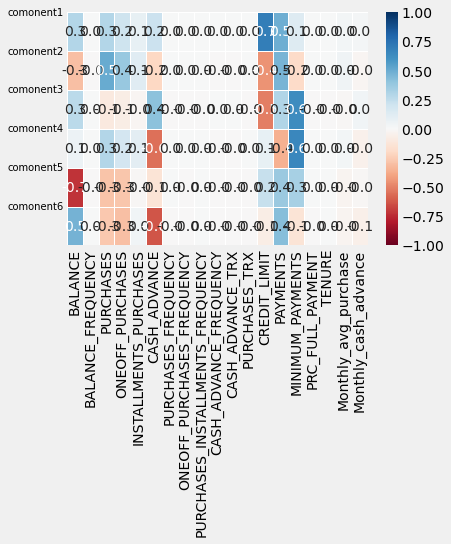

In [96]:
sns.heatmap (data_PCAComp,vmin=-1,vmax=1,cmap='RdBu',annot=True,fmt=".1f",linewidth=1)
plt.yticks ([0,1,2,3,4,5], ['comonent1','comonent2', 'comonent3','comonent4','comonent5','comonent6']\
           , fontsize=10)

Component 1: High correlation with PURCHASES and PURCHASES_TRX

Component 2: High correlation with BALANCE and CASH_ADVANCE

Component 3: High correlation with Balance frequency and PURCHASES frequency

Component 4: High correlation with minimum payment, percentage of full payment and TENURE.

Component 5: High correlation with BALANCE_Freq, installment purchases, oneoff purchases freq

Component 6: High correlation with percentage of full payment and TENURE


Now I transform the original data into six dimentionals. The result is a new array where each observation is described by the six components.

In [97]:
scores_PCA= pca.transform (df)

Here, I'll segment the data using K-means clustering using Principal components as features (re-use the code for k-means)

In [98]:
wcss=[]
for i in range (1,11):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans_pca.fit (scores_PCA)
    wcss.append(kmeans_pca.inertia_)

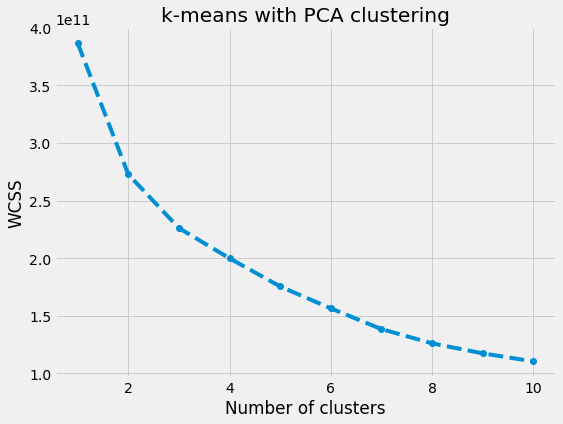

In [99]:
#visualise the WCSS by number of clusters
plt.figure(figsize=(8,6))
plt.plot (range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel ('Number of clusters')
plt.ylabel ('WCSS')
plt.title('k-means with PCA clustering')
plt.show()

Again we choose clusters=5

In [100]:
kmeans_pca=KMeans(n_clusters=5, init='k-means++', random_state=123)
kmeans_pca.fit (scores_PCA)

KMeans(n_clusters=5, random_state=123)

In [101]:
#Adding the values of the seperate components to our segmentation dataset
DF_pca_kmeans=pd.concat ([df.reset_index (drop=True), pd.DataFrame(scores_PCA)], axis=1)
DF_pca_kmeans.columns.values[-6:]=['comonent1','comonent2', 'comonent3','comonent4','comonent5','comonent6']
DF_pca_kmeans['Segment-PCAKmeans']=kmeans_pca.labels_
DF_pca_kmeans

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8944    28.493517           1.000000     291.12              0.00   
8945    19.183215           1.000000     300.00              0.00   
8946    23.398673           0.833333     144.40              0.00   
8947    13.457564           0.833333       0.00              0.00   
8948   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                  291.12      0.000000             1.000000   
8945                  300.00      0.000000             1.000000   
8946                  144.40      0.000000             0.833333   
8947                    0.00     36.558778             0.000000   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.833333   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.666667   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  ...  TENURE  Monthly_avg_purchase  \
0                   0.000000  ...      12              7.950000   
1                   0.250000  ...      12              0.000000   
2                   0.000000  ...      12             64.430833   
3                   0.083333  ...      12            124.916667   
4                   0.000000  ...      12              1.333333   
...                      ...  ...     ...                   ...   
8944                0.000000  ...       6             48.520000   
8945                0.000000  ...       6             50.000000   
8946                0.000000  ...       6             24.066667   
8947                0.166667  ...       6              0.000000   
8948                0.333333  ...       6            182.208333   

      Monthly_cash_advance    comonent1    comonent2    comonent3  \
0                 0.000000 -4327.731561   922.190963   189.564601   
1               536.912124  4123.004962 -2469.787157  2405.099337   
2                 0.000000  1493.484453 -1984.536864 -2147.100383   
3                17.149001  1392.203690 -1470.805360 -2454.641381   
4                 0.000000 -3745.182048   755.804870   517.360273   
...                    ...          ...          ...          ...   
8944              0.000000 -4208.684843  1124.552707   143.603065   
8945              0.000000 -4124.302143   953.892900   635.608165   
8946              0.000000 -4380.376591   913.301195   106.849974   
8947              6.093130 -4792.226026 

In [102]:
DF_Freq_pca_kmeans=DF_pca_kmeans.groupby (['Segment-PCAKmeans']).mean()
DF_Freq_pca_kmeans

BALANCE  BALANCE_FREQUENCY     PURCHASES  \
Segment-PCAKmeans                                                 
0                  5466.971694           0.957522   1531.605767   
1                   790.604313           0.848959    487.279364   
2                  4058.147688           0.988636   1027.378750   
3                  4775.623010           0.907657  11730.387946   
4                  1646.438407           0.906533   1453.783207   

                   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Segment-PCAKmeans                                                           
0                        945.579854              586.100885   3835.747439   
1                        233.811854              253.768676    485.794603   
2                        118.389464              908.989286    922.757849   
3                       8394.386339             3336.198036   5156.438056   
4                        906.180823              547.993134    838.454470   

                   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Segment-PCAKmeans                                                    
0                             0.472792                    0.267799   
1                             0.446862                    0.126648   
2                             0.471320                    0.039232   
3                             0.766153                    0.622973   
4                             0.579732                    0.329102   

                   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Segment-PCAKmeans                                                             
0                                          0.349606                0.328590   
1                                          0.344055                0.110309   
2                                          0.441153                0.105655   
3                                          0.610440                0.205019   
4                                          0.401553                0.117145   

                   ...  PRC_FULL_PAYMENT     TENURE  Monthly_avg_purchase  \
Segment-PCAKmeans  ...                                                      
0                  ...          0.069996  11.669653            130.934141   
1                  ...          0.145532  11.372527             43.217454   
2                  ...          0.001488  11.910714             86.302568   
3                  ...          0.356370  11.857143            985.304727   
4                  ...          0.196071  11.756353            123.192146   

                   Monthly_cash_advance     comonent1     comonent2  \
Segment-PCAKmeans                                                     
0                            343.389227   7694.833153  -3373.036179   
1                             46.017513  -2621.586546    609.249345   
2                             79.237883   3352.414889  -4982.540794   
3                            449.166490  21157.561096  11022.928542   
4                             75.039344   1916.617000   -499.739456   

                      comonent3     comonent4    comonent5    comonent6  
Segment-PCAKmeans                                                        
0                    188.810105   -714.913196  -786.164147   145.292822  
1                    374.586885   -108.882838   -83.030700    37.413043  
2                  14475.768793  14382.812008  5538.706678 -1690.225758  
3                   2912.673874  -1706.137849   621.514518   267.629116  
4                  -1343.933202    247.283067   311.165970  -107.880380  

[5 rows x 25 columns]

Since we still have five clusters and the components are based on our original features, it is expected that we have similar clusters to those we got with k-means without PCA.

Cluster 0: **FinanciallyStressed**

Cluster 1: **ProsperousAndConsent**

Cluster 2: **DealChasers**

Cluster 3: **SelfAwareAvoiders**

Cluster 4: **RecoveringCreditUsers**

In [103]:
DF_Freq_pca_kmeans['NObservations']= DF_pca_kmeans[['Segment-PCAKmeans','PURCHASES']].groupby (['Segment-PCAKmeans']).count()
DF_Freq_pca_kmeans['PropObservations']=DF_Freq_pca_kmeans['NObservations']/DF_Freq_pca_kmeans['NObservations'].sum()
DF_Freq_pca_kmeans =DF_Freq_pca_kmeans.rename ({0: 'FinanciallyStressed', 1: 'ProsperousAndConsent', 2: 'DealChasers',\
                                                3: 'SelfAwareAvoiders', 4:'RecoveringCreditUsers'})
DF_Freq_pca_kmeans

BALANCE  BALANCE_FREQUENCY     PURCHASES  \
Segment-PCAKmeans                                                     
FinanciallyStressed    5466.971694           0.957522   1531.605767   
ProsperousAndConsent    790.604313           0.848959    487.279364   
DealChasers            4058.147688           0.988636   1027.378750   
SelfAwareAvoiders      4775.623010           0.907657  11730.387946   
RecoveringCreditUsers  1646.438407           0.906533   1453.783207   

                       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Segment-PCAKmeans                                                               
FinanciallyStressed          945.579854              586.100885   3835.747439   
ProsperousAndConsent         233.811854              253.768676    485.794603   
DealChasers                  118.389464              908.989286    922.757849   
SelfAwareAvoiders           8394.386339             3336.198036   5156.438056   
RecoveringCreditUsers        906.180823              547.993134    838.454470   

                       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Segment-PCAKmeans                                                        
FinanciallyStressed               0.472792                    0.267799   
ProsperousAndConsent              0.446862                    0.126648   
DealChasers                       0.471320                    0.039232   
SelfAwareAvoiders                 0.766153                    0.622973   
RecoveringCreditUsers             0.579732                    0.329102   

                       PURCHASES_INSTALLMENTS_FREQUENCY  \
Segment-PCAKmeans                                         
FinanciallyStressed                            0.349606   
ProsperousAndConsent                           0.344055   
DealChasers                                    0.441153   
SelfAwareAvoiders                              0.610440   
RecoveringCreditUsers                          0.401553   

                       CASH_ADVANCE_FREQUENCY  ...  Monthly_avg_purchase  \
Segment-PCAKmeans                              ...                         
FinanciallyStressed                  0.328590  ...            130.934141   
ProsperousAndConsent                 0.110309  ...             43.217454   
DealChasers                          0.105655  ...             86.302568   
SelfAwareAvoiders                    0.205019  ...            985.304727   
RecoveringCreditUsers                0.117145  ...            123.192146   

                       Monthly_cash_advance     comonent1     comonent2  \
Segment-PCAKmeans                                                         
FinanciallyStressed              343.389227   7694.833153  -3373.036179   
ProsperousAndConsent              46.017513  -2621.586546    609.249345   
DealChasers                       79.237883   3352.414889  -4982.540794   
SelfAwareAvoiders                449.166490  21157.561096  11022.928542   
RecoveringCreditUsers             75.039344   1916.617000   -499.739456   

                          comonent3     comonent4    comonent5    comonent6  \
Segment-PCAKmeans                                                             
FinanciallyStressed      188.810105   -714.913196  -786.164147   145.292822   
ProsperousAndConsent     374.586885   -108.882838   -83.030700    37.413043   
DealChasers            14475.768793  14382.812008  5538.706678 -1690.225758   
SelfAwareAvoiders       2912.673874  -1706.137849   621.514518   267.629116   
RecoveringCreditUsers  -1343.933202    247.283067   311.165970  -107.880380   

                       NObservations  PropObservations  
Segment-PCAKmeans                                       
FinanciallyStressed              893          0.099788  
ProsperousAndConsent            5409          0.604425  
DealChasers                       56          0.006258  
SelfAwareAvoiders                112          0.012515  
RecoveringCreditUsers           2479          0.277014  

[5 rows x 27 co

**Pie chart for PropObservations**

([<matplotlib.patches.Wedge at 0x1fde500f1f0>,
 [Text(1.0463886663038842, 0.33922081161211043, 'FinanciallyStressed'),
  Text(-0.8979740485356176, 0.6353287402255249, 'ProsperousAndConsent'),
  Text(-0.29131621631492394, -1.060723744483905, 'DealChasers'),
  Text(-0.2282873886396348, -1.0760505881175366, 'SelfAwareAvoiders'),
  Text(0.709085726284634, -0.8409503152858635, 'RecoveringCreditUsers')],
 [Text(0.5707574543475731, 0.18502953360660565, '10.0%'),
  Text(-0.48980402647397314, 0.3465429492139226, '60.4%'),
  Text(-0.15889975435359485, -0.5785765879003117, '0.6%'),
  Text(-0.12452039380343714, -0.5869366844277472, '1.3%'),
  Text(0.38677403251889125, -0.4587001719741073, '27.7%')])

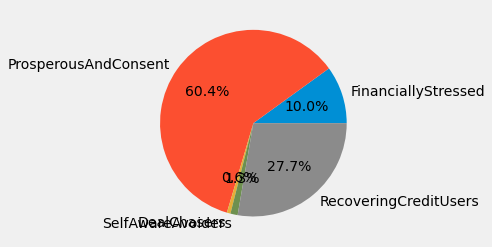

In [104]:
fig, ax = plt.subplots()
y= DF_Freq_pca_kmeans['PropObservations']
mylabels= ['FinanciallyStressed', 'ProsperousAndConsent', 'DealChasers', 'SelfAwareAvoiders','RecoveringCreditUsers']
ax.pie(y , labels= mylabels , autopct='%1.1f%%')

**Vsualising clusters on a 2D plane**

I use two of the components and use them as axis for visualisation. The point of PCA is to determine the most important components, so we can be sure that the first two components explain more variance than the other ones.

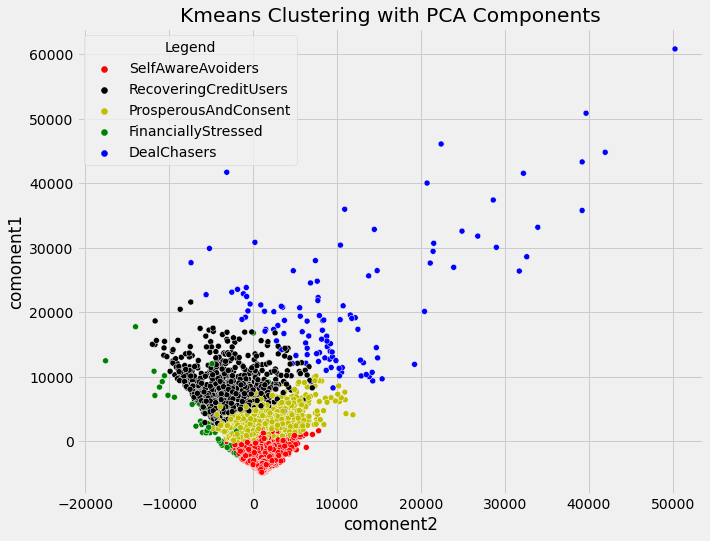

In [105]:
DF_pca_kmeans['Legend']=DF_pca_kmeans['Segment-PCAKmeans']\
.map({0: 'RecoveringCreditUsers', 1: 'SelfAwareAvoiders', 2: 'FinanciallyStressed', 3: 'DealChasers', 4:'ProsperousAndConsent'})
x_ax= DF_pca_kmeans['comonent2']
y_ax= DF_pca_kmeans['comonent1']
plt.figure(figsize=(10,8))
sns.scatterplot (x=x_ax, y=y_ax, hue= DF_pca_kmeans['Legend'], palette=['r','k','y','g','b'])
plt.title ('Kmeans Clustering with PCA Components')
plt.show()

It can be seen that the clusters are distinguishable from each other and the overlaps that exist are due to the absence of other components in this diagram.

## 5. Conclusion
In this project, I have tried to find the five clusters introduced in the McKinsey study of credit card customers in the data under review. As it was obtained from the results, more than 71% of the customers were from the "RecoveringCreditUsers" and "FinanciallyStressed" clusters, that is, customers who do not have a good financial situation. According to this result, the following suggestions can be made regarding providing better services to this type of customers based on the McKinsey study:

A product that helps them budget their spending—for instance, by allowing them to define spending “buckets” for various merchant types with monthly limits


Enable them to carry a credit card designed specifically for larger purchases that take time to pay off.